### Gradient Descent

#### Let's plot weights vs loss curve and observe the nature

#### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

#### Loading the data

In [2]:
df = pd.read_csv("pizza.txt" ,sep = "\s+")

In [3]:
df.head(n=3)

,Reservations,Pizzas
0,13,33
1,2,16
2,14,32


In [4]:
X = df["Reservations"]
y = df["Pizzas"]

#### Generating the functions from previous chapter

In [5]:
def func_predict(X,w,b=0):
    return (X*w + b)

In [6]:
def func_loss(X,y,w,b=0):
    sq_err = (func_predict(X,w,b) - y)**2
    return np.average(sq_err)
    

#### Generating some random weights and loss values to display the nature of weights vs loss curve

In [7]:
weights = np.linspace(-1,5,200) # 200 equally spaced points btwn -1 and 5
loss = [func_loss(X,y,w) for w in weights] # using list comprehension to generate the loss list 

#### Plotting the graph

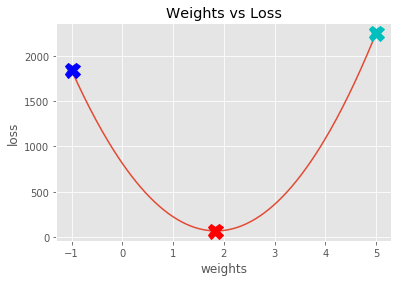

In [8]:
# Some random variables to display few points on the curve depecting someone who intends to descend down
min_wt_idx = np.argmin(loss)
strt_wt = weights[0]
strt_loss = loss[0]
end_wt = weights[-1]
end_loss = loss[-1]
antr_loss = loss[0]

# Plot starts
plt.plot(weights,loss)
plt.xlabel("weights")
plt.ylabel("loss")
plt.title ("Weights vs Loss")
plt.plot(weights[min_wt_idx], loss[min_wt_idx], "rX", markersize=15)
plt.plot(strt_wt, strt_loss, "bX", markersize=15)
plt.plot(end_wt, end_loss, "cX", markersize=15)
plt.show()

#### Observations about of the loss curve: (and these are some prereqs for gradient descent)
- The graph is a convex function
- The graph is continious
- The graph has a global minima
- Both the blue and green points (these are 2 hypothetical people) needs to descend to the red points.

From our previous lesson: (for the training phase)

$loss = (predicted - actual) ** 2/m$ (`m`: # of observations in training phase)

- As can be observed from the curve, **the minimum value of loss is our point of descent**.
- For finding a global minima:
>- we need to take the derivative of the loss function 
 - it should be partial derivatives wrt weights (w) and bias(b) to arrive at the final approximate function of the loss curve.
 
Therefore, the loss function can be expressed as:

*loss(L)* =$1/m$ $\sum_{i=1}^{m}$ $(( X_iw + b)- y_i)^2$

**Logic for algorithm**:
- As we have 2 variables (w and b), we need to find the partial derv. of loss function wrt each one
- Determine the next set of w and b (using the above values) 
- Continue till the train function converges

On differentiating $L$, wrt to $w$ and $b$, we get:
>- $\partial$L/$\partial$w = $2/m$$\sum_{i=1}^{m}$$X_i( X_iw + b)- y_i)$
- $\partial$L/$\partial$b = $2/m$$\sum_{i=1}^{m}$$( X_iw + b)- y_i)$

#### Let's code up the Gradient Descent function real quick

In [9]:
def func_gradient(X,y,w,b):
    w_grad = 2 * np.average(X * (func_predict(X, w, b) - y))
    b_grad = 2 * np.average(func_predict(X, w, b) - y)
    return (w_grad,b_grad)

#### Let's code up the final train function

In [10]:
def func_train_gd(X,y,iterations,lr):
    w = 0
    b = 0
    for seq,i in enumerate(range(iterations)):
        print(f"Iteration:{seq},loss:{func_loss(X,y,w,b)}")
        w_gd, b_gd = func_gradient(X,y,w,b)
        w -=w_gd*lr
        b -=b_gd*lr
        
    return w,b    
        

In [23]:
weight,bias  = func_train_gd(X,y,80000,0.0001)

Iteration:0,loss:812.8666666666667
Iteration:1,loss:748.9205535615644
Iteration:2,loss:690.4660923251315
Iteration:3,loss:637.0316277385642
Iteration:4,loss:588.186013098811
Iteration:5,loss:543.5351311097158
Iteration:6,loss:502.7187135794312
Iteration:7,loss:465.4074342608649
Iteration:8,loss:431.3002513760352
Iteration:9,loss:400.1219783800161
Iteration:10,loss:371.6210633619216
Iteration:11,loss:345.56755916394917
Iteration:12,loss:321.7512678385071
Iteration:13,loss:299.98004447023976
Iteration:14,loss:280.078246675766
Iteration:15,loss:261.88531726946917
Iteration:16,loss:245.25448865826087
Iteration:17,loss:230.05159851051903
Iteration:18,loss:216.15400714232138
Iteration:19,loss:203.4496078848983
Iteration:20,loss:191.83592244753024
Iteration:21,loss:181.21927397598452
Iteration:22,loss:171.51403113354277
Iteration:23,loss:162.64191710478127
Iteration:24,loss:154.53137794615864
Iteration:25,loss:147.11700518635922
Iteration:26,loss:140.33900801710385
Iteration:27,loss:134.14273

Iteration:278,loss:67.04921576813776
Iteration:279,loss:67.04451558792768
Iteration:280,loss:67.03981590753526
Iteration:281,loss:67.03511672690063
Iteration:282,loss:67.0304180459644
Iteration:283,loss:67.02571986466779
Iteration:284,loss:67.02102218295248
Iteration:285,loss:67.01632500076066
Iteration:286,loss:67.01162831803487
Iteration:287,loss:67.00693213471801
Iteration:288,loss:67.00223645075341
Iteration:289,loss:66.99754126608465
Iteration:290,loss:66.9928465806557
Iteration:291,loss:66.9881523944106
Iteration:292,loss:66.9834587072938
Iteration:293,loss:66.97876551924996
Iteration:294,loss:66.97407283022385
Iteration:295,loss:66.96938064016052
Iteration:296,loss:66.96468894900512
Iteration:297,loss:66.95999775670305
Iteration:298,loss:66.95530706319975
Iteration:299,loss:66.95061686844085
Iteration:300,loss:66.9459271723721
Iteration:301,loss:66.94123797493931
Iteration:302,loss:66.93654927608848
Iteration:303,loss:66.93186107576572
Iteration:304,loss:66.92717337391703
Iterat

Iteration:542,loss:65.82555736806314
Iteration:543,loss:65.82098729218684
Iteration:544,loss:65.81641770221611
Iteration:545,loss:65.81184859809932
Iteration:546,loss:65.80727997978485
Iteration:547,loss:65.80271184722099
Iteration:548,loss:65.79814420035612
Iteration:549,loss:65.7935770391386
Iteration:550,loss:65.78901036351678
Iteration:551,loss:65.78444417343906
Iteration:552,loss:65.77987846885378
Iteration:553,loss:65.77531324970933
Iteration:554,loss:65.77074851595414
Iteration:555,loss:65.7661842675365
Iteration:556,loss:65.7616205044049
Iteration:557,loss:65.75705722650775
Iteration:558,loss:65.75249443379337
Iteration:559,loss:65.74793212621026
Iteration:560,loss:65.74337030370681
Iteration:561,loss:65.7388089662314
Iteration:562,loss:65.73424811373255
Iteration:563,loss:65.72968774615859
Iteration:564,loss:65.72512786345807
Iteration:565,loss:65.72056846557935
Iteration:566,loss:65.71600955247094
Iteration:567,loss:65.71145112408126
Iteration:568,loss:65.70689318035878
Itera

Iteration:815,loss:64.59579532099765
Iteration:816,loss:64.59135599749592
Iteration:817,loss:64.58691714599777
Iteration:818,loss:64.58247876645304
Iteration:819,loss:64.57804085881152
Iteration:820,loss:64.57360342302303
Iteration:821,loss:64.56916645903742
Iteration:822,loss:64.5647299668045
Iteration:823,loss:64.56029394627417
Iteration:824,loss:64.55585839739621
Iteration:825,loss:64.55142332012049
Iteration:826,loss:64.54698871439689
Iteration:827,loss:64.54255458017526
Iteration:828,loss:64.53812091740548
Iteration:829,loss:64.53368772603739
Iteration:830,loss:64.52925500602092
Iteration:831,loss:64.52482275730588
Iteration:832,loss:64.52039097984226
Iteration:833,loss:64.51595967357989
Iteration:834,loss:64.51152883846866
Iteration:835,loss:64.50709847445854
Iteration:836,loss:64.50266858149935
Iteration:837,loss:64.49823915954106
Iteration:838,loss:64.4938102085336
Iteration:839,loss:64.48938172842688
Iteration:840,loss:64.48495371917083
Iteration:841,loss:64.48052618071539
Ite

Iteration:1099,loss:63.353807216995094
Iteration:1100,loss:63.34949994578285
Iteration:1101,loss:63.34519313253396
Iteration:1102,loss:63.34088677719972
Iteration:1103,loss:63.33658087973144
Iteration:1104,loss:63.33227544008043
Iteration:1105,loss:63.32797045819802
Iteration:1106,loss:63.32366593403557
Iteration:1107,loss:63.319361867544394
Iteration:1108,loss:63.31505825867579
Iteration:1109,loss:63.310755107381176
Iteration:1110,loss:63.30645241361184
Iteration:1111,loss:63.30215017731917
Iteration:1112,loss:63.2978483984545
Iteration:1113,loss:63.293547076969226
Iteration:1114,loss:63.28924621281465
Iteration:1115,loss:63.28494580594226
Iteration:1116,loss:63.28064585630336
Iteration:1117,loss:63.276346363849356
Iteration:1118,loss:63.2720473285316
Iteration:1119,loss:63.267748750301536
Iteration:1120,loss:63.26345062911058
Iteration:1121,loss:63.259152964910065
Iteration:1122,loss:63.25485575765145
Iteration:1123,loss:63.25055900728617
Iteration:1124,loss:63.24626271376563
Iterati

Iteration:1368,loss:62.211503896781714
Iteration:1369,loss:62.20731807904251
Iteration:1370,loss:62.203132706353315
Iteration:1371,loss:62.198947778666856
Iteration:1372,loss:62.19476329593571
Iteration:1373,loss:62.19057925811265
Iteration:1374,loss:62.18639566515035
Iteration:1375,loss:62.18221251700151
Iteration:1376,loss:62.17802981361885
Iteration:1377,loss:62.173847554955046
Iteration:1378,loss:62.169665740962856
Iteration:1379,loss:62.165484371595
Iteration:1380,loss:62.16130344680417
Iteration:1381,loss:62.15712296654308
Iteration:1382,loss:62.152942930764546
Iteration:1383,loss:62.14876333942126
Iteration:1384,loss:62.14458419246594
Iteration:1385,loss:62.14040548985142
Iteration:1386,loss:62.13622723153035
Iteration:1387,loss:62.132049417455576
Iteration:1388,loss:62.127872047579814
Iteration:1389,loss:62.12369512185588
Iteration:1390,loss:62.1195186402365
Iteration:1391,loss:62.115342602674474
Iteration:1392,loss:62.111167009122646
Iteration:1393,loss:62.10699185953373
Itera

Iteration:1625,loss:61.150257679370526
Iteration:1626,loss:61.146184696844706
Iteration:1627,loss:61.14211214737186
Iteration:1628,loss:61.13804003090597
Iteration:1629,loss:61.13396834740101
Iteration:1630,loss:61.12989709681092
Iteration:1631,loss:61.12582627908965
Iteration:1632,loss:61.121755894191224
Iteration:1633,loss:61.117685942069606
Iteration:1634,loss:61.11361642267878
Iteration:1635,loss:61.109547335972735
Iteration:1636,loss:61.105478681905495
Iteration:1637,loss:61.10141046043099
Iteration:1638,loss:61.09734267150329
Iteration:1639,loss:61.09327531507636
Iteration:1640,loss:61.089208391104286
Iteration:1641,loss:61.085141899541
Iteration:1642,loss:61.08107584034058
Iteration:1643,loss:61.07701021345705
Iteration:1644,loss:61.07294501884443
Iteration:1645,loss:61.068880256456765
Iteration:1646,loss:61.064815926248116
Iteration:1647,loss:61.060752028172516
Iteration:1648,loss:61.056688562184014
Iteration:1649,loss:61.05262552823669
Iteration:1650,loss:61.04856292628459
Ite

Iteration:1887,loss:60.09780726929846
Iteration:1888,loss:60.093846186786614
Iteration:1889,loss:60.08988552543019
Iteration:1890,loss:60.085925285184416
Iteration:1891,loss:60.081965466004455
Iteration:1892,loss:60.078006067845614
Iteration:1893,loss:60.074047090663086
Iteration:1894,loss:60.07008853441218
Iteration:1895,loss:60.06613039904804
Iteration:1896,loss:60.06217268452596
Iteration:1897,loss:60.058215390801216
Iteration:1898,loss:60.05425851782905
Iteration:1899,loss:60.050302065564715
Iteration:1900,loss:60.04634603396351
Iteration:1901,loss:60.042390422980674
Iteration:1902,loss:60.0384352325715
Iteration:1903,loss:60.03448046269128
Iteration:1904,loss:60.0305261132953
Iteration:1905,loss:60.026572184338825
Iteration:1906,loss:60.022618675777196
Iteration:1907,loss:60.018665587565685
Iteration:1908,loss:60.01471291965962
Iteration:1909,loss:60.01076067201429
Iteration:1910,loss:60.006808844585
Iteration:1911,loss:60.002857437327116
Iteration:1912,loss:59.998906450195946
Ite

Iteration:2161,loss:59.02807153681825
Iteration:2162,loss:59.02422419215315
Iteration:2163,loss:59.02037725655044
Iteration:2164,loss:59.01653072996671
Iteration:2165,loss:59.0126846123584
Iteration:2166,loss:59.00883890368207
Iteration:2167,loss:59.004993603894235
Iteration:2168,loss:59.00114871295136
Iteration:2169,loss:58.99730423081006
Iteration:2170,loss:58.99346015742685
Iteration:2171,loss:58.98961649275825
Iteration:2172,loss:58.98577323676078
Iteration:2173,loss:58.98193038939105
Iteration:2174,loss:58.97808795060557
Iteration:2175,loss:58.97424592036092
Iteration:2176,loss:58.97040429861366
Iteration:2177,loss:58.966563085320345
Iteration:2178,loss:58.96272228043754
Iteration:2179,loss:58.95888188392182
Iteration:2180,loss:58.955041895729806
Iteration:2181,loss:58.951202315818065
Iteration:2182,loss:58.94736314414317
Iteration:2183,loss:58.94352438066169
Iteration:2184,loss:58.93968602533028
Iteration:2185,loss:58.93584807810554
Iteration:2186,loss:58.93201053894405
Iteration

Iteration:2443,loss:57.95916815462086
Iteration:2444,loss:57.95543445930425
Iteration:2445,loss:57.951701160966486
Iteration:2446,loss:57.947968259565336
Iteration:2447,loss:57.94423575505865
Iteration:2448,loss:57.94050364740421
Iteration:2449,loss:57.93677193655983
Iteration:2450,loss:57.933040622483276
Iteration:2451,loss:57.92930970513241
Iteration:2452,loss:57.92557918446505
Iteration:2453,loss:57.92184906043899
Iteration:2454,loss:57.9181193330121
Iteration:2455,loss:57.91439000214214
Iteration:2456,loss:57.910661067787025
Iteration:2457,loss:57.90693252990456
Iteration:2458,loss:57.90320438845257
Iteration:2459,loss:57.899476643388965
Iteration:2460,loss:57.89574929467154
Iteration:2461,loss:57.89202234225817
Iteration:2462,loss:57.88829578610675
Iteration:2463,loss:57.88456962617512
Iteration:2464,loss:57.88084386242114
Iteration:2465,loss:57.87711849480271
Iteration:2466,loss:57.873393523277734
Iteration:2467,loss:57.86966894780405
Iteration:2468,loss:57.86594476833957
Iterati

Iteration:2725,loss:56.92183984134954
Iteration:2726,loss:56.91821643821547
Iteration:2727,loss:56.91459342033363
Iteration:2728,loss:56.910970787663054
Iteration:2729,loss:56.90734854016277
Iteration:2730,loss:56.903726677791845
Iteration:2731,loss:56.900105200509344
Iteration:2732,loss:56.89648410827428
Iteration:2733,loss:56.89286340104575
Iteration:2734,loss:56.8892430787828
Iteration:2735,loss:56.88562314144452
Iteration:2736,loss:56.88200358898998
Iteration:2737,loss:56.878384421378215
Iteration:2738,loss:56.87476563856834
Iteration:2739,loss:56.871147240519456
Iteration:2740,loss:56.86752922719062
Iteration:2741,loss:56.86391159854096
Iteration:2742,loss:56.860294354529586
Iteration:2743,loss:56.85667749511556
Iteration:2744,loss:56.85306102025802
Iteration:2745,loss:56.84944492991603
Iteration:2746,loss:56.84582922404877
Iteration:2747,loss:56.84221390261533
Iteration:2748,loss:56.83859896557484
Iteration:2749,loss:56.834984412886435
Iteration:2750,loss:56.83137024450923
Iterat

Iteration:3009,loss:55.90812151539896
Iteration:3010,loss:55.9046058941554
Iteration:3011,loss:55.90109064670433
Iteration:3012,loss:55.897575773006025
Iteration:3013,loss:55.89406127302071
Iteration:3014,loss:55.89054714670869
Iteration:3015,loss:55.887033394030226
Iteration:3016,loss:55.88352001494558
Iteration:3017,loss:55.880007009415
Iteration:3018,loss:55.87649437739886
Iteration:3019,loss:55.8729821188574
Iteration:3020,loss:55.86947023375085
Iteration:3021,loss:55.8659587220396
Iteration:3022,loss:55.86244758368388
Iteration:3023,loss:55.85893681864404
Iteration:3024,loss:55.85542642688038
Iteration:3025,loss:55.85191640835317
Iteration:3026,loss:55.84840676302276
Iteration:3027,loss:55.844897490849476
Iteration:3028,loss:55.84138859179363
Iteration:3029,loss:55.83788006581556
Iteration:3030,loss:55.83437191287564
Iteration:3031,loss:55.83086413293408
Iteration:3032,loss:55.82735672595137
Iteration:3033,loss:55.82384969188774
Iteration:3034,loss:55.820343030703626
Iteration:303

Iteration:3285,loss:54.95185871856332
Iteration:3286,loss:54.948444770348054
Iteration:3287,loss:54.9450311851151
Iteration:3288,loss:54.94161796282582
Iteration:3289,loss:54.93820510344165
Iteration:3290,loss:54.93479260692398
Iteration:3291,loss:54.93138047323428
Iteration:3292,loss:54.927968702333864
Iteration:3293,loss:54.9245572941843
Iteration:3294,loss:54.92114624874693
Iteration:3295,loss:54.9177355659832
Iteration:3296,loss:54.914325245854556
Iteration:3297,loss:54.910915288322464
Iteration:3298,loss:54.907505693348334
Iteration:3299,loss:54.90409646089366
Iteration:3300,loss:54.90068759091985
Iteration:3301,loss:54.89727908338842
Iteration:3302,loss:54.893870938260775
Iteration:3303,loss:54.89046315549841
Iteration:3304,loss:54.887055735062795
Iteration:3305,loss:54.883648676915435
Iteration:3306,loss:54.88024198101776
Iteration:3307,loss:54.87683564733128
Iteration:3308,loss:54.873429675817505
Iteration:3309,loss:54.87002406643786
Iteration:3310,loss:54.86661881915391
Iterat

Iteration:3571,loss:53.99011508630886
Iteration:3572,loss:53.9868033938625
Iteration:3573,loss:53.98349205352624
Iteration:3574,loss:53.98018106526267
Iteration:3575,loss:53.97687042903437
Iteration:3576,loss:53.973560144803805
Iteration:3577,loss:53.970250212533685
Iteration:3578,loss:53.96694063218651
Iteration:3579,loss:53.96363140372488
Iteration:3580,loss:53.96032252711138
Iteration:3581,loss:53.957014002308604
Iteration:3582,loss:53.95370582927913
Iteration:3583,loss:53.95039800798559
Iteration:3584,loss:53.94709053839058
Iteration:3585,loss:53.943783420456676
Iteration:3586,loss:53.94047665414652
Iteration:3587,loss:53.937170239422684
Iteration:3588,loss:53.93386417624783
Iteration:3589,loss:53.93055846458458
Iteration:3590,loss:53.92725310439553
Iteration:3591,loss:53.923948095643325
Iteration:3592,loss:53.920643438290604
Iteration:3593,loss:53.91733913229998
Iteration:3594,loss:53.91403517763414
Iteration:3595,loss:53.910731574255706
Iteration:3596,loss:53.907428322127295
Iter

Iteration:3871,loss:53.012234011491486
Iteration:3872,loss:53.00902629060035
Iteration:3873,loss:53.005818910764745
Iteration:3874,loss:53.00261187194838
Iteration:3875,loss:52.99940517411501
Iteration:3876,loss:52.996198817228404
Iteration:3877,loss:52.99299280125226
Iteration:3878,loss:52.989787126150354
Iteration:3879,loss:52.98658179188644
Iteration:3880,loss:52.983376798424274
Iteration:3881,loss:52.98017214572766
Iteration:3882,loss:52.97696783376032
Iteration:3883,loss:52.973763862486024
Iteration:3884,loss:52.97056023186858
Iteration:3885,loss:52.96735694187178
Iteration:3886,loss:52.96415399245938
Iteration:3887,loss:52.96095138359515
Iteration:3888,loss:52.9577491152429
Iteration:3889,loss:52.95454718736645
Iteration:3890,loss:52.95134559992957
Iteration:3891,loss:52.948144352896065
Iteration:3892,loss:52.94494344622975
Iteration:3893,loss:52.941742879894456
Iteration:3894,loss:52.93854265385396
Iteration:3895,loss:52.9353427680721
Iteration:3896,loss:52.93214322251268
Iterat

Iteration:4135,loss:52.17712659598476
Iteration:4136,loss:52.174007666480456
Iteration:4137,loss:52.17088906859108
Iteration:4138,loss:52.16777080228139
Iteration:4139,loss:52.16465286751608
Iteration:4140,loss:52.161535264259896
Iteration:4141,loss:52.15841799247766
Iteration:4142,loss:52.155301052134064
Iteration:4143,loss:52.15218444319389
Iteration:4144,loss:52.14906816562193
Iteration:4145,loss:52.145952219382906
Iteration:4146,loss:52.1428366044416
Iteration:4147,loss:52.13972132076279
Iteration:4148,loss:52.13660636831129
Iteration:4149,loss:52.13349174705183
Iteration:4150,loss:52.130377456949226
Iteration:4151,loss:52.12726349796826
Iteration:4152,loss:52.124149870073715
Iteration:4153,loss:52.121036573230434
Iteration:4154,loss:52.117923607403185
Iteration:4155,loss:52.11481097255673
Iteration:4156,loss:52.11169866865596
Iteration:4157,loss:52.10858669566564
Iteration:4158,loss:52.10547505355059
Iteration:4159,loss:52.102363742275664
Iteration:4160,loss:52.09925276180565
Iter

Iteration:4411,loss:51.328765511478686
Iteration:4412,loss:51.32573678253521
Iteration:4413,loss:51.322708375616244
Iteration:4414,loss:51.319680290687515
Iteration:4415,loss:51.31665252771481
Iteration:4416,loss:51.31362508666391
Iteration:4417,loss:51.310597967500556
Iteration:4418,loss:51.30757117019054
Iteration:4419,loss:51.30454469469964
Iteration:4420,loss:51.301518540993676
Iteration:4421,loss:51.29849270903836
Iteration:4422,loss:51.29546719879952
Iteration:4423,loss:51.29244201024297
Iteration:4424,loss:51.289417143334475
Iteration:4425,loss:51.28639259803986
Iteration:4426,loss:51.283368374324915
Iteration:4427,loss:51.28034447215543
Iteration:4428,loss:51.27732089149728
Iteration:4429,loss:51.27429763231623
Iteration:4430,loss:51.271274694578096
Iteration:4431,loss:51.268252078248715
Iteration:4432,loss:51.26522978329394
Iteration:4433,loss:51.26220780967956
Iteration:4434,loss:51.25918615737142
Iteration:4435,loss:51.25616482633538
Iteration:4436,loss:51.253143816537246
It

Iteration:4690,loss:50.496116861115496
Iteration:4691,loss:50.49317666213479
Iteration:4692,loss:50.490236775765794
Iteration:4693,loss:50.48729720197525
Iteration:4694,loss:50.48435794072991
Iteration:4695,loss:50.4814189919966
Iteration:4696,loss:50.47848035574205
Iteration:4697,loss:50.47554203193299
Iteration:4698,loss:50.47260402053631
Iteration:4699,loss:50.4696663215187
Iteration:4700,loss:50.466728934847
Iteration:4701,loss:50.46379186048796
Iteration:4702,loss:50.460855098408416
Iteration:4703,loss:50.45791864857514
Iteration:4704,loss:50.454982510954956
Iteration:4705,loss:50.45204668551461
Iteration:4706,loss:50.449111172221
Iteration:4707,loss:50.44617597104084
Iteration:4708,loss:50.443241081941004
Iteration:4709,loss:50.44030650488832
Iteration:4710,loss:50.43737223984957
Iteration:4711,loss:50.43443828679162
Iteration:4712,loss:50.43150464568126
Iteration:4713,loss:50.428571316485325
Iteration:4714,loss:50.4256382991707
Iteration:4715,loss:50.42270559370418
Iteration:471

Iteration:4973,loss:49.676391383811975
Iteration:4974,loss:49.673538340759485
Iteration:4975,loss:49.670685601051986
Iteration:4976,loss:49.6678331646572
Iteration:4977,loss:49.66498103154293
Iteration:4978,loss:49.662129201676876
Iteration:4979,loss:49.659277675026836
Iteration:4980,loss:49.656426451560534
Iteration:4981,loss:49.653575531245785
Iteration:4982,loss:49.650724914050315
Iteration:4983,loss:49.64787459994189
Iteration:4984,loss:49.64502458888835
Iteration:4985,loss:49.64217488085738
Iteration:4986,loss:49.63932547581683
Iteration:4987,loss:49.636476373734475
Iteration:4988,loss:49.63362757457807
Iteration:4989,loss:49.63077907831542
Iteration:4990,loss:49.62793088491434
Iteration:4991,loss:49.62508299434262
Iteration:4992,loss:49.62223540656808
Iteration:4993,loss:49.61938812155849
Iteration:4994,loss:49.616541139281665
Iteration:4995,loss:49.61369445970544
Iteration:4996,loss:49.61084808279758
Iteration:4997,loss:49.608002008526
Iteration:4998,loss:49.60515623685842
Itera

Iteration:5237,loss:48.93362183160561
Iteration:5238,loss:48.93084776227245
Iteration:5239,loss:48.928073987887515
Iteration:5240,loss:48.92530050841948
Iteration:5241,loss:48.92252732383692
Iteration:5242,loss:48.919754434108576
Iteration:5243,loss:48.916981839203046
Iteration:5244,loss:48.914209539088986
Iteration:5245,loss:48.911437533735075
Iteration:5246,loss:48.90866582310991
Iteration:5247,loss:48.90589440718224
Iteration:5248,loss:48.903123285920664
Iteration:5249,loss:48.90035245929389
Iteration:5250,loss:48.897581927270615
Iteration:5251,loss:48.894811689819434
Iteration:5252,loss:48.89204174690912
Iteration:5253,loss:48.88927209850829
Iteration:5254,loss:48.886502744585634
Iteration:5255,loss:48.88373368510989
Iteration:5256,loss:48.88096492004969
Iteration:5257,loss:48.87819644937382
Iteration:5258,loss:48.87542827305086
Iteration:5259,loss:48.87266039104961
Iteration:5260,loss:48.86989280333874
Iteration:5261,loss:48.867125509886975
Iteration:5262,loss:48.864358510663
Iter

Iteration:5503,loss:48.20601825138606
Iteration:5504,loss:48.203321543275834
Iteration:5505,loss:48.20062512188853
Iteration:5506,loss:48.197928987193684
Iteration:5507,loss:48.19523313916082
Iteration:5508,loss:48.192537577759445
Iteration:5509,loss:48.18984230295907
Iteration:5510,loss:48.187147314729266
Iteration:5511,loss:48.18445261303951
Iteration:5512,loss:48.181758197859395
Iteration:5513,loss:48.17906406915841
Iteration:5514,loss:48.17637022690611
Iteration:5515,loss:48.17367667107206
Iteration:5516,loss:48.17098340162578
Iteration:5517,loss:48.16829041853681
Iteration:5518,loss:48.165597721774745
Iteration:5519,loss:48.162905311309146
Iteration:5520,loss:48.160213187109505
Iteration:5521,loss:48.15752134914541
Iteration:5522,loss:48.154829797386476
Iteration:5523,loss:48.15213853180225
Iteration:5524,loss:48.14944755236229
Iteration:5525,loss:48.14675685903615
Iteration:5526,loss:48.144066451793464
Iteration:5527,loss:48.14137633060379
Iteration:5528,loss:48.138686495436716
I

Iteration:5772,loss:47.49084187261175
Iteration:5773,loss:47.488221204423226
Iteration:5774,loss:47.485600814872825
Iteration:5775,loss:47.48298070393094
Iteration:5776,loss:47.480360871567896
Iteration:5777,loss:47.47774131775411
Iteration:5778,loss:47.47512204246
Iteration:5779,loss:47.472503045655884
Iteration:5780,loss:47.46988432731219
Iteration:5781,loss:47.467265887399314
Iteration:5782,loss:47.46464772588764
Iteration:5783,loss:47.46202984274756
Iteration:5784,loss:47.4594122379495
Iteration:5785,loss:47.45679491146383
Iteration:5786,loss:47.454177863261
Iteration:5787,loss:47.45156109331142
Iteration:5788,loss:47.44894460158547
Iteration:5789,loss:47.446328388053594
Iteration:5790,loss:47.44371245268622
Iteration:5791,loss:47.441096795453724
Iteration:5792,loss:47.43848141632659
Iteration:5793,loss:47.43586631527523
Iteration:5794,loss:47.433251492270095
Iteration:5795,loss:47.43063694728158
Iteration:5796,loss:47.428022680280144
Iteration:5797,loss:47.42540869123625
Iteration

Iteration:6033,loss:46.81621547647843
Iteration:6034,loss:46.81366653680313
Iteration:6035,loss:46.811117868139554
Iteration:6036,loss:46.808569470458885
Iteration:6037,loss:46.80602134373227
Iteration:6038,loss:46.80347348793093
Iteration:6039,loss:46.80092590302607
Iteration:6040,loss:46.79837858898889
Iteration:6041,loss:46.79583154579054
Iteration:6042,loss:46.79328477340232
Iteration:6043,loss:46.79073827179534
Iteration:6044,loss:46.78819204094082
Iteration:6045,loss:46.78564608081004
Iteration:6046,loss:46.78310039137416
Iteration:6047,loss:46.780554972604406
Iteration:6048,loss:46.778009824472036
Iteration:6049,loss:46.77546494694821
Iteration:6050,loss:46.77292034000422
Iteration:6051,loss:46.770376003611275
Iteration:6052,loss:46.76783193774056
Iteration:6053,loss:46.7652881423634
Iteration:6054,loss:46.76274461745097
Iteration:6055,loss:46.76020136297454
Iteration:6056,loss:46.75765837890535
Iteration:6057,loss:46.75511566521465
Iteration:6058,loss:46.7525732218737
Iteration

Iteration:6290,loss:46.16997315123765
Iteration:6291,loss:46.16749292218713
Iteration:6292,loss:46.165012956842794
Iteration:6293,loss:46.16253325517659
Iteration:6294,loss:46.16005381716049
Iteration:6295,loss:46.15757464276645
Iteration:6296,loss:46.155095731966426
Iteration:6297,loss:46.15261708473243
Iteration:6298,loss:46.15013870103641
Iteration:6299,loss:46.147660580850356
Iteration:6300,loss:46.14518272414623
Iteration:6301,loss:46.14270513089607
Iteration:6302,loss:46.140227801071816
Iteration:6303,loss:46.137750734645486
Iteration:6304,loss:46.135273931589055
Iteration:6305,loss:46.13279739187452
Iteration:6306,loss:46.13032111547393
Iteration:6307,loss:46.12784510235918
Iteration:6308,loss:46.1253693525024
Iteration:6309,loss:46.12289386587555
Iteration:6310,loss:46.12041864245063
Iteration:6311,loss:46.11794368219966
Iteration:6312,loss:46.11546898509466
Iteration:6313,loss:46.11299455110763
Iteration:6314,loss:46.110520380210666
Iteration:6315,loss:46.108046472375705
Itera

Iteration:6549,loss:45.53632480615603
Iteration:6550,loss:45.53391194869662
Iteration:6551,loss:45.53149934778022
Iteration:6552,loss:45.52908700337953
Iteration:6553,loss:45.526674915467304
Iteration:6554,loss:45.524263084016255
Iteration:6555,loss:45.521851508999085
Iteration:6556,loss:45.519440190388586
Iteration:6557,loss:45.51702912815745
Iteration:6558,loss:45.51461832227847
Iteration:6559,loss:45.512207772724324
Iteration:6560,loss:45.509797479467814
Iteration:6561,loss:45.50738744248166
Iteration:6562,loss:45.504977661738614
Iteration:6563,loss:45.50256813721145
Iteration:6564,loss:45.500158868872894
Iteration:6565,loss:45.497749856695755
Iteration:6566,loss:45.495341100652745
Iteration:6567,loss:45.492932600716706
Iteration:6568,loss:45.49052435686032
Iteration:6569,loss:45.48811636905638
Iteration:6570,loss:45.485708637277725
Iteration:6571,loss:45.483301161497046
Iteration:6572,loss:45.4808939416872
Iteration:6573,loss:45.47848697782093
Iteration:6574,loss:45.47608026987104


Iteration:6806,loss:44.92458392026705
Iteration:6807,loss:44.922236105125094
Iteration:6808,loss:44.91988853961065
Iteration:6809,loss:44.91754122369714
Iteration:6810,loss:44.91519415735804
Iteration:6811,loss:44.91284734056679
Iteration:6812,loss:44.91050077329689
Iteration:6813,loss:44.90815445552177
Iteration:6814,loss:44.90580838721495
Iteration:6815,loss:44.90346256834987
Iteration:6816,loss:44.90111699890005
Iteration:6817,loss:44.89877167883891
Iteration:6818,loss:44.896426608140004
Iteration:6819,loss:44.89408178677676
Iteration:6820,loss:44.89173721472271
Iteration:6821,loss:44.889392891951296
Iteration:6822,loss:44.88704881843605
Iteration:6823,loss:44.88470499415049
Iteration:6824,loss:44.882361419068076
Iteration:6825,loss:44.880018093162334
Iteration:6826,loss:44.87767501640675
Iteration:6827,loss:44.87533218877487
Iteration:6828,loss:44.87298961024018
Iteration:6829,loss:44.8706472807762
Iteration:6830,loss:44.86830520035644
Iteration:6831,loss:44.86596336895443
Iteratio

Iteration:7078,loss:44.29509105981917
Iteration:7079,loss:44.29281017444346
Iteration:7080,loss:44.290529531579004
Iteration:7081,loss:44.28824913120006
Iteration:7082,loss:44.285968973280845
Iteration:7083,loss:44.28368905779557
Iteration:7084,loss:44.28140938471847
Iteration:7085,loss:44.27912995402376
Iteration:7086,loss:44.27685076568567
Iteration:7087,loss:44.274571819678435
Iteration:7088,loss:44.272293115976275
Iteration:7089,loss:44.27001465455344
Iteration:7090,loss:44.2677364353842
Iteration:7091,loss:44.265458458442744
Iteration:7092,loss:44.26318072370336
Iteration:7093,loss:44.260903231140254
Iteration:7094,loss:44.25862598072773
Iteration:7095,loss:44.256348972439994
Iteration:7096,loss:44.254072206251365
Iteration:7097,loss:44.251795682136006
Iteration:7098,loss:44.249519400068245
Iteration:7099,loss:44.247243360022345
Iteration:7100,loss:44.244967561972544
Iteration:7101,loss:44.242692005893154
Iteration:7102,loss:44.240416691758405
Iteration:7103,loss:44.2381416195426


Iteration:7341,loss:43.70349669158706
Iteration:7342,loss:43.7012787064843
Iteration:7343,loss:43.69906095720508
Iteration:7344,loss:43.69684344372426
Iteration:7345,loss:43.69462616601686
Iteration:7346,loss:43.69240912405774
Iteration:7347,loss:43.6901923178219
Iteration:7348,loss:43.68797574728422
Iteration:7349,loss:43.68575941241968
Iteration:7350,loss:43.6835433132032
Iteration:7351,loss:43.681327449609704
Iteration:7352,loss:43.67911182161422
Iteration:7353,loss:43.6768964291916
Iteration:7354,loss:43.67468127231685
Iteration:7355,loss:43.672466350964925
Iteration:7356,loss:43.67025166511075
Iteration:7357,loss:43.66803721472934
Iteration:7358,loss:43.66582299979562
Iteration:7359,loss:43.66360902028456
Iteration:7360,loss:43.66139527617117
Iteration:7361,loss:43.65918176743035
Iteration:7362,loss:43.65696849403712
Iteration:7363,loss:43.65475545596642
Iteration:7364,loss:43.65254265319331
Iteration:7365,loss:43.65033008569271
Iteration:7366,loss:43.64811775343959
Iteration:7367

Iteration:7598,loss:43.141162531993764
Iteration:7599,loss:43.13900433612168
Iteration:7600,loss:43.13684636971608
Iteration:7601,loss:43.13468863275265
Iteration:7602,loss:43.13253112520697
Iteration:7603,loss:43.13037384705462
Iteration:7604,loss:43.12821679827122
Iteration:7605,loss:43.12605997883242
Iteration:7606,loss:43.12390338871379
Iteration:7607,loss:43.121747027890976
Iteration:7608,loss:43.119590896339595
Iteration:7609,loss:43.11743499403526
Iteration:7610,loss:43.115279320953576
Iteration:7611,loss:43.11312387707021
Iteration:7612,loss:43.110968662360804
Iteration:7613,loss:43.108813676800914
Iteration:7614,loss:43.106658920366286
Iteration:7615,loss:43.10450439303245
Iteration:7616,loss:43.102350094775105
Iteration:7617,loss:43.1001960255699
Iteration:7618,loss:43.09804218539249
Iteration:7619,loss:43.095888574218456
Iteration:7620,loss:43.09373519202352
Iteration:7621,loss:43.09158203878333
Iteration:7622,loss:43.0894291144735
Iteration:7623,loss:43.08727641906971
Itera

Iteration:7846,loss:42.612897179125596
Iteration:7847,loss:42.610795150175754
Iteration:7848,loss:42.60869334472059
Iteration:7849,loss:42.60659176273637
Iteration:7850,loss:42.60449040419926
Iteration:7851,loss:42.60238926908561
Iteration:7852,loss:42.60028835737159
Iteration:7853,loss:42.59818766903344
Iteration:7854,loss:42.59608720404743
Iteration:7855,loss:42.59398696238985
Iteration:7856,loss:42.591886944036915
Iteration:7857,loss:42.58978714896486
Iteration:7858,loss:42.58768757714997
Iteration:7859,loss:42.58558822856854
Iteration:7860,loss:42.58348910319679
Iteration:7861,loss:42.58139020101103
Iteration:7862,loss:42.57929152198746
Iteration:7863,loss:42.57719306610243
Iteration:7864,loss:42.575094833332166
Iteration:7865,loss:42.57299682365296
Iteration:7866,loss:42.57089903704109
Iteration:7867,loss:42.56880147347286
Iteration:7868,loss:42.566704132924514
Iteration:7869,loss:42.56460701537237
Iteration:7870,loss:42.56251012079273
Iteration:7871,loss:42.56041344916185
Iterati

Iteration:8097,loss:42.092238583101825
Iteration:8098,loss:42.09019191229866
Iteration:8099,loss:42.08814545910435
Iteration:8100,loss:42.086099223495694
Iteration:8101,loss:42.08405320544958
Iteration:8102,loss:42.0820074049429
Iteration:8103,loss:42.079961821952516
Iteration:8104,loss:42.07791645645528
Iteration:8105,loss:42.07587130842807
Iteration:8106,loss:42.07382637784778
Iteration:8107,loss:42.071781664691294
Iteration:8108,loss:42.06973716893546
Iteration:8109,loss:42.06769289055721
Iteration:8110,loss:42.06564882953341
Iteration:8111,loss:42.063604985840946
Iteration:8112,loss:42.06156135945671
Iteration:8113,loss:42.059517950357574
Iteration:8114,loss:42.0574747585205
Iteration:8115,loss:42.05543178392236
Iteration:8116,loss:42.05338902654001
Iteration:8117,loss:42.051346486350404
Iteration:8118,loss:42.04930416333044
Iteration:8119,loss:42.04726205745703
Iteration:8120,loss:42.045220168707075
Iteration:8121,loss:42.04317849705749
Iteration:8122,loss:42.041137042485204
Itera

Iteration:8336,loss:41.60922161320342
Iteration:8337,loss:41.60722629836456
Iteration:8338,loss:41.605231195674186
Iteration:8339,loss:41.60323630510977
Iteration:8340,loss:41.601241626648694
Iteration:8341,loss:41.59924716026845
Iteration:8342,loss:41.59725290594647
Iteration:8343,loss:41.595258863660234
Iteration:8344,loss:41.59326503338716
Iteration:8345,loss:41.59127141510475
Iteration:8346,loss:41.58927800879043
Iteration:8347,loss:41.58728481442165
Iteration:8348,loss:41.585291831975915
Iteration:8349,loss:41.58329906143067
Iteration:8350,loss:41.58130650276341
Iteration:8351,loss:41.57931415595157
Iteration:8352,loss:41.57732202097266
Iteration:8353,loss:41.57533009780413
Iteration:8354,loss:41.573338386423465
Iteration:8355,loss:41.57134688680814
Iteration:8356,loss:41.56935559893569
Iteration:8357,loss:41.567364522783514
Iteration:8358,loss:41.565373658329186
Iteration:8359,loss:41.563383005550165
Iteration:8360,loss:41.56139256442393
Iteration:8361,loss:41.559402334927974
Ite

Iteration:8555,loss:41.17727313522443
Iteration:8556,loss:41.175323746578634
Iteration:8557,loss:41.17337456519831
Iteration:8558,loss:41.17142559106142
Iteration:8559,loss:41.1694768241459
Iteration:8560,loss:41.16752826442974
Iteration:8561,loss:41.1655799118909
Iteration:8562,loss:41.16363176650737
Iteration:8563,loss:41.1616838282571
Iteration:8564,loss:41.15973609711808
Iteration:8565,loss:41.15778857306829
Iteration:8566,loss:41.15584125608569
Iteration:8567,loss:41.1538941461483
Iteration:8568,loss:41.151947243234105
Iteration:8569,loss:41.15000054732104
Iteration:8570,loss:41.148054058387146
Iteration:8571,loss:41.14610777641042
Iteration:8572,loss:41.144161701368816
Iteration:8573,loss:41.142215833240385
Iteration:8574,loss:41.14027017200308
Iteration:8575,loss:41.13832471763492
Iteration:8576,loss:41.136379470113916
Iteration:8577,loss:41.134434429418086
Iteration:8578,loss:41.132489595525406
Iteration:8579,loss:41.130544968413915
Iteration:8580,loss:41.128600548061634
Iterat

Iteration:8794,loss:40.717214880917055
Iteration:8795,loss:40.715314407188906
Iteration:8796,loss:40.71341413552539
Iteration:8797,loss:40.71151406590506
Iteration:8798,loss:40.709614198306426
Iteration:8799,loss:40.707714532708
Iteration:8800,loss:40.70581506908833
Iteration:8801,loss:40.7039158074259
Iteration:8802,loss:40.70201674769927
Iteration:8803,loss:40.70011788988696
Iteration:8804,loss:40.69821923396753
Iteration:8805,loss:40.69632077991946
Iteration:8806,loss:40.6944225277213
Iteration:8807,loss:40.69252447735163
Iteration:8808,loss:40.69062662878896
Iteration:8809,loss:40.68872898201182
Iteration:8810,loss:40.68683153699879
Iteration:8811,loss:40.68493429372838
Iteration:8812,loss:40.68303725217917
Iteration:8813,loss:40.6811404123297
Iteration:8814,loss:40.67924377415853
Iteration:8815,loss:40.67734733764419
Iteration:8816,loss:40.6754511027653
Iteration:8817,loss:40.67355506950036
Iteration:8818,loss:40.671659237827974
Iteration:8819,loss:40.66976360772667
Iteration:8820

Iteration:9054,loss:40.22983344141062
Iteration:9055,loss:40.227984787691625
Iteration:9056,loss:40.2261363305276
Iteration:9057,loss:40.22428806989769
Iteration:9058,loss:40.22244000578093
Iteration:9059,loss:40.2205921381565
Iteration:9060,loss:40.218744467003454
Iteration:9061,loss:40.21689699230093
Iteration:9062,loss:40.21504971402807
Iteration:9063,loss:40.21320263216391
Iteration:9064,loss:40.211355746687644
Iteration:9065,loss:40.20950905757835
Iteration:9066,loss:40.207662564815145
Iteration:9067,loss:40.205816268377205
Iteration:9068,loss:40.2039701682436
Iteration:9069,loss:40.20212426439346
Iteration:9070,loss:40.20027855680595
Iteration:9071,loss:40.19843304546019
Iteration:9072,loss:40.19658773033529
Iteration:9073,loss:40.19474261141041
Iteration:9074,loss:40.1928976886647
Iteration:9075,loss:40.19105296207727
Iteration:9076,loss:40.18920843162729
Iteration:9077,loss:40.187364097293916
Iteration:9078,loss:40.18551995905626
Iteration:9079,loss:40.18367601689351
Iteration:

Iteration:9318,loss:39.748549538649186
Iteration:9319,loss:39.746752056629035
Iteration:9320,loss:39.74495476572314
Iteration:9321,loss:39.74315766591117
Iteration:9322,loss:39.74136075717278
Iteration:9323,loss:39.73956403948771
Iteration:9324,loss:39.73776751283561
Iteration:9325,loss:39.73597117719615
Iteration:9326,loss:39.73417503254907
Iteration:9327,loss:39.73237907887405
Iteration:9328,loss:39.73058331615074
Iteration:9329,loss:39.728787744358875
Iteration:9330,loss:39.72699236347818
Iteration:9331,loss:39.7251971734883
Iteration:9332,loss:39.72340217436899
Iteration:9333,loss:39.7216073660999
Iteration:9334,loss:39.71981274866079
Iteration:9335,loss:39.71801832203137
Iteration:9336,loss:39.716224086191325
Iteration:9337,loss:39.714430041120366
Iteration:9338,loss:39.712636186798214
Iteration:9339,loss:39.71084252320461
Iteration:9340,loss:39.70904905031924
Iteration:9341,loss:39.707255768121875
Iteration:9342,loss:39.70546267659219
Iteration:9343,loss:39.70366977570996
Iterati

Iteration:9570,loss:39.301575048107466
Iteration:9571,loss:39.299825089895805
Iteration:9572,loss:39.29807531774553
Iteration:9573,loss:39.29632573163681
Iteration:9574,loss:39.29457633154987
Iteration:9575,loss:39.29282711746495
Iteration:9576,loss:39.29107808936229
Iteration:9577,loss:39.28932924722207
Iteration:9578,loss:39.28758059102456
Iteration:9579,loss:39.28583212074991
Iteration:9580,loss:39.28408383637847
Iteration:9581,loss:39.28233573789041
Iteration:9582,loss:39.280587825265954
Iteration:9583,loss:39.278840098485375
Iteration:9584,loss:39.27709255752886
Iteration:9585,loss:39.27534520237673
Iteration:9586,loss:39.27359803300917
Iteration:9587,loss:39.27185104940646
Iteration:9588,loss:39.270104251548794
Iteration:9589,loss:39.2683576394165
Iteration:9590,loss:39.2666112129898
Iteration:9591,loss:39.26486497224892
Iteration:9592,loss:39.26311891717416
Iteration:9593,loss:39.261373047745764
Iteration:9594,loss:39.25962736394396
Iteration:9595,loss:39.257881865749056
Iterati

Iteration:9825,loss:38.86130763195901
Iteration:9826,loss:38.859604484437476
Iteration:9827,loss:38.85790151800026
Iteration:9828,loss:38.85619873262808
Iteration:9829,loss:38.854496128301655
Iteration:9830,loss:38.852793705001766
Iteration:9831,loss:38.85109146270919
Iteration:9832,loss:38.84938940140464
Iteration:9833,loss:38.84768752106888
Iteration:9834,loss:38.845985821682675
Iteration:9835,loss:38.844284303226786
Iteration:9836,loss:38.84258296568196
Iteration:9837,loss:38.840881809029014
Iteration:9838,loss:38.839180833248655
Iteration:9839,loss:38.837480038321665
Iteration:9840,loss:38.83577942422885
Iteration:9841,loss:38.83407899095096
Iteration:9842,loss:38.83237873846876
Iteration:9843,loss:38.83067866676302
Iteration:9844,loss:38.82897877581456
Iteration:9845,loss:38.82727906560413
Iteration:9846,loss:38.82557953611253
Iteration:9847,loss:38.823880187320505
Iteration:9848,loss:38.822181019208884
Iteration:9849,loss:38.82048203175846
Iteration:9850,loss:38.81878322495002
It

Iteration:10078,loss:38.43613290188045
Iteration:10079,loss:38.434474960344694
Iteration:10080,loss:38.432817195086756
Iteration:10081,loss:38.431159606087924
Iteration:10082,loss:38.42950219332946
Iteration:10083,loss:38.42784495679258
Iteration:10084,loss:38.42618789645862
Iteration:10085,loss:38.42453101230876
Iteration:10086,loss:38.422874304324345
Iteration:10087,loss:38.4212177724866
Iteration:10088,loss:38.41956141677682
Iteration:10089,loss:38.41790523717624
Iteration:10090,loss:38.41624923366619
Iteration:10091,loss:38.414593406227894
Iteration:10092,loss:38.41293775484267
Iteration:10093,loss:38.41128227949177
Iteration:10094,loss:38.40962698015653
Iteration:10095,loss:38.40797185681817
Iteration:10096,loss:38.406316909458
Iteration:10097,loss:38.404662138057326
Iteration:10098,loss:38.40300754259743
Iteration:10099,loss:38.401353123059614
Iteration:10100,loss:38.39969887942514
Iteration:10101,loss:38.39804481167535
Iteration:10102,loss:38.39639091979152
Iteration:10103,loss:

Iteration:10313,loss:38.05132362223487
Iteration:10314,loss:38.049706594896456
Iteration:10315,loss:38.048089739485754
Iteration:10316,loss:38.04647305598446
Iteration:10317,loss:38.04485654437432
Iteration:10318,loss:38.04324020463706
Iteration:10319,loss:38.04162403675438
Iteration:10320,loss:38.040008040708024
Iteration:10321,loss:38.038392216479714
Iteration:10322,loss:38.0367765640512
Iteration:10323,loss:38.03516108340421
Iteration:10324,loss:38.03354577452047
Iteration:10325,loss:38.03193063738172
Iteration:10326,loss:38.030315671969696
Iteration:10327,loss:38.02870087826614
Iteration:10328,loss:38.027086256252815
Iteration:10329,loss:38.02547180591146
Iteration:10330,loss:38.0238575272238
Iteration:10331,loss:38.022243420171584
Iteration:10332,loss:38.02062948473658
Iteration:10333,loss:38.01901572090055
Iteration:10334,loss:38.017402128645244
Iteration:10335,loss:38.01578870795241
Iteration:10336,loss:38.01417545880377
Iteration:10337,loss:38.012562381181155
Iteration:10338,lo

Iteration:10571,loss:37.63977912178955
Iteration:10572,loss:37.638205851225734
Iteration:10573,loss:37.63663274793724
Iteration:10574,loss:37.63505981190631
Iteration:10575,loss:37.633487043115146
Iteration:10576,loss:37.63191444154598
Iteration:10577,loss:37.630342007181
Iteration:10578,loss:37.628769740002454
Iteration:10579,loss:37.62719763999259
Iteration:10580,loss:37.62562570713358
Iteration:10581,loss:37.624053941407695
Iteration:10582,loss:37.622482342797134
Iteration:10583,loss:37.620910911284156
Iteration:10584,loss:37.619339646850946
Iteration:10585,loss:37.61776854947982
Iteration:10586,loss:37.61619761915294
Iteration:10587,loss:37.61462685585261
Iteration:10588,loss:37.613056259561034
Iteration:10589,loss:37.61148583026042
Iteration:10590,loss:37.609915567933086
Iteration:10591,loss:37.60834547256123
Iteration:10592,loss:37.60677554412713
Iteration:10593,loss:37.605205782613005
Iteration:10594,loss:37.603636188001126
Iteration:10595,loss:37.60206676027375
Iteration:10596,

Iteration:10861,loss:37.1904693258363
Iteration:10862,loss:37.18894382737836
Iteration:10863,loss:37.1874184911165
Iteration:10864,loss:37.18589331703344
Iteration:10865,loss:37.18436830511194
Iteration:10866,loss:37.18284345533475
Iteration:10867,loss:37.18131876768465
Iteration:10868,loss:37.17979424214438
Iteration:10869,loss:37.178269878696725
Iteration:10870,loss:37.17674567732444
Iteration:10871,loss:37.17522163801029
Iteration:10872,loss:37.173697760737056
Iteration:10873,loss:37.172174045487516
Iteration:10874,loss:37.17065049224439
Iteration:10875,loss:37.16912710099052
Iteration:10876,loss:37.16760387170866
Iteration:10877,loss:37.16608080438155
Iteration:10878,loss:37.16455789899202
Iteration:10879,loss:37.16303515552284
Iteration:10880,loss:37.16151257395681
Iteration:10881,loss:37.15999015427667
Iteration:10882,loss:37.15846789646523
Iteration:10883,loss:37.156945800505284
Iteration:10884,loss:37.15542386637964
Iteration:10885,loss:37.15390209407108
Iteration:10886,loss:37

Iteration:11133,loss:36.78145484648935
Iteration:11134,loss:36.77997283580581
Iteration:11135,loss:36.77849098269454
Iteration:11136,loss:36.77700928713879
Iteration:11137,loss:36.77552774912183
Iteration:11138,loss:36.77404636862691
Iteration:11139,loss:36.77256514563727
Iteration:11140,loss:36.77108408013615
Iteration:11141,loss:36.76960317210683
Iteration:11142,loss:36.76812242153256
Iteration:11143,loss:36.766641828396594
Iteration:11144,loss:36.76516139268218
Iteration:11145,loss:36.763681114372616
Iteration:11146,loss:36.76220099345114
Iteration:11147,loss:36.76072102990102
Iteration:11148,loss:36.759241223705516
Iteration:11149,loss:36.757761574847926
Iteration:11150,loss:36.7562820833115
Iteration:11151,loss:36.75480274907951
Iteration:11152,loss:36.75332357213524
Iteration:11153,loss:36.75184455246198
Iteration:11154,loss:36.75036569004294
Iteration:11155,loss:36.748886984861514
Iteration:11156,loss:36.74740843690088
Iteration:11157,loss:36.74593004614437
Iteration:11158,loss:

Iteration:11396,loss:36.39706500236174
Iteration:11397,loss:36.395623861279745
Iteration:11398,loss:36.39418287342465
Iteration:11399,loss:36.39274203878016
Iteration:11400,loss:36.39130135733
Iteration:11401,loss:36.389860829057845
Iteration:11402,loss:36.38842045394744
Iteration:11403,loss:36.38698023198247
Iteration:11404,loss:36.38554016314669
Iteration:11405,loss:36.384100247423795
Iteration:11406,loss:36.38266048479751
Iteration:11407,loss:36.381220875251536
Iteration:11408,loss:36.37978141876964
Iteration:11409,loss:36.37834211533551
Iteration:11410,loss:36.37690296493292
Iteration:11411,loss:36.375463967545535
Iteration:11412,loss:36.37402512315714
Iteration:11413,loss:36.37258643175144
Iteration:11414,loss:36.37114789331218
Iteration:11415,loss:36.36970950782306
Iteration:11416,loss:36.3682712752679
Iteration:11417,loss:36.366833195630356
Iteration:11418,loss:36.36539526889422
Iteration:11419,loss:36.36395749504321
Iteration:11420,loss:36.36251987406105
Iteration:11421,loss:36

Iteration:11652,loss:36.03308949020747
Iteration:11653,loss:36.03168704820767
Iteration:11654,loss:36.03028475532013
Iteration:11655,loss:36.02888261152904
Iteration:11656,loss:36.02748061681849
Iteration:11657,loss:36.02607877117268
Iteration:11658,loss:36.02467707457575
Iteration:11659,loss:36.023275527011826
Iteration:11660,loss:36.02187412846511
Iteration:11661,loss:36.02047287891969
Iteration:11662,loss:36.019071778359795
Iteration:11663,loss:36.01767082676954
Iteration:11664,loss:36.016270024133114
Iteration:11665,loss:36.01486937043466
Iteration:11666,loss:36.01346886565834
Iteration:11667,loss:36.01206850978833
Iteration:11668,loss:36.010668302808796
Iteration:11669,loss:36.009268244703904
Iteration:11670,loss:36.00786833545783
Iteration:11671,loss:36.00646857505475
Iteration:11672,loss:36.00506896347881
Iteration:11673,loss:36.00366950071421
Iteration:11674,loss:36.00227018674514
Iteration:11675,loss:36.000871021555774
Iteration:11676,loss:35.99947200513029
Iteration:11677,los

Iteration:11908,loss:35.678887842964606
Iteration:11909,loss:35.677523060857276
Iteration:11910,loss:35.6761584238581
Iteration:11911,loss:35.67479393195164
Iteration:11912,loss:35.6734295851225
Iteration:11913,loss:35.672065383355225
Iteration:11914,loss:35.67070132663439
Iteration:11915,loss:35.669337414944586
Iteration:11916,loss:35.66797364827038
Iteration:11917,loss:35.66661002659642
Iteration:11918,loss:35.665246549907174
Iteration:11919,loss:35.663883218187316
Iteration:11920,loss:35.66252003142139
Iteration:11921,loss:35.66115698959401
Iteration:11922,loss:35.65979409268974
Iteration:11923,loss:35.658431340693184
Iteration:11924,loss:35.65706873358895
Iteration:11925,loss:35.65570627136161
Iteration:11926,loss:35.65434395399575
Iteration:11927,loss:35.65298178147599
Iteration:11928,loss:35.65161975378696
Iteration:11929,loss:35.650257870913194
Iteration:11930,loss:35.64889613283932
Iteration:11931,loss:35.647534539549966
Iteration:11932,loss:35.64617309102971
Iteration:11933,lo

Iteration:12208,loss:35.275893115759075
Iteration:12209,loss:35.274571181386115
Iteration:12210,loss:35.273249387565585
Iteration:12211,loss:35.27192773428258
Iteration:12212,loss:35.270606221522115
Iteration:12213,loss:35.26928484926927
Iteration:12214,loss:35.267963617509075
Iteration:12215,loss:35.26664252622664
Iteration:12216,loss:35.26532157540701
Iteration:12217,loss:35.264000765035235
Iteration:12218,loss:35.26268009509639
Iteration:12219,loss:35.26135956557558
Iteration:12220,loss:35.26003917645781
Iteration:12221,loss:35.258718927728204
Iteration:12222,loss:35.25739881937182
Iteration:12223,loss:35.25607885137371
Iteration:12224,loss:35.254759023718954
Iteration:12225,loss:35.253439336392695
Iteration:12226,loss:35.252119789379925
Iteration:12227,loss:35.25080038266579
Iteration:12228,loss:35.24948111623532
Iteration:12229,loss:35.24816199007366
Iteration:12230,loss:35.24684300416583
Iteration:12231,loss:35.24552415849697
Iteration:12232,loss:35.24420545305215
Iteration:12233

Iteration:12426,loss:34.99101060426621
Iteration:12427,loss:34.989718959545584
Iteration:12428,loss:34.98842745215692
Iteration:12429,loss:34.987136082085584
Iteration:12430,loss:34.98584484931699
Iteration:12431,loss:34.984553753836536
Iteration:12432,loss:34.983262795629635
Iteration:12433,loss:34.98197197468171
Iteration:12434,loss:34.980681290978126
Iteration:12435,loss:34.9793907445043
Iteration:12436,loss:34.978100335245664
Iteration:12437,loss:34.9768100631876
Iteration:12438,loss:34.975519928315556
Iteration:12439,loss:34.97422993061491
Iteration:12440,loss:34.97294007007108
Iteration:12441,loss:34.97165034666952
Iteration:12442,loss:34.97036076039563
Iteration:12443,loss:34.9690713112348
Iteration:12444,loss:34.96778199917248
Iteration:12445,loss:34.96649282419411
Iteration:12446,loss:34.965203786285095
Iteration:12447,loss:34.96391488543084
Iteration:12448,loss:34.962626121616786
Iteration:12449,loss:34.961337494828406
Iteration:12450,loss:34.96004900505107
Iteration:12451,lo

Iteration:12672,loss:34.67736894294686
Iteration:12673,loss:34.676110645646645
Iteration:12674,loss:34.6748524821328
Iteration:12675,loss:34.673594452391036
Iteration:12676,loss:34.672336556407146
Iteration:12677,loss:34.67107879416696
Iteration:12678,loss:34.66982116565619
Iteration:12679,loss:34.668563670860664
Iteration:12680,loss:34.667306309766154
Iteration:12681,loss:34.66604908235844
Iteration:12682,loss:34.6647919886233
Iteration:12683,loss:34.663535028546534
Iteration:12684,loss:34.662278202113924
Iteration:12685,loss:34.66102150931128
Iteration:12686,loss:34.65976495012436
Iteration:12687,loss:34.65850852453899
Iteration:12688,loss:34.65725223254093
Iteration:12689,loss:34.65599607411602
Iteration:12690,loss:34.65474004925002
Iteration:12691,loss:34.653484157928766
Iteration:12692,loss:34.65222840013799
Iteration:12693,loss:34.6509727758636
Iteration:12694,loss:34.64971728509129
Iteration:12695,loss:34.64846192780694
Iteration:12696,loss:34.64720670399634
Iteration:12697,loss

Iteration:12901,loss:34.392683556676964
Iteration:12902,loss:34.39145552807008
Iteration:12903,loss:34.390227630031276
Iteration:12904,loss:34.38899986254664
Iteration:12905,loss:34.387772225602326
Iteration:12906,loss:34.38654471918442
Iteration:12907,loss:34.38531734327909
Iteration:12908,loss:34.3840900978724
Iteration:12909,loss:34.38286298295054
Iteration:12910,loss:34.381635998499604
Iteration:12911,loss:34.380409144505705
Iteration:12912,loss:34.37918242095497
Iteration:12913,loss:34.37795582783357
Iteration:12914,loss:34.376729365127595
Iteration:12915,loss:34.37550303282322
Iteration:12916,loss:34.37427683090655
Iteration:12917,loss:34.37305075936372
Iteration:12918,loss:34.37182481818088
Iteration:12919,loss:34.37059900734418
Iteration:12920,loss:34.369373326839735
Iteration:12921,loss:34.36814777665371
Iteration:12922,loss:34.366922356772236
Iteration:12923,loss:34.36569706718147
Iteration:12924,loss:34.36447190786755
Iteration:12925,loss:34.36324687881664
Iteration:12926,lo

Iteration:13144,loss:34.09807911541155
Iteration:13145,loss:34.09688241012479
Iteration:13146,loss:34.095685832075695
Iteration:13147,loss:34.09448938125073
Iteration:13148,loss:34.0932930576364
Iteration:13149,loss:34.09209686121915
Iteration:13150,loss:34.09090079198545
Iteration:13151,loss:34.08970484992182
Iteration:13152,loss:34.08850903501469
Iteration:13153,loss:34.08731334725059
Iteration:13154,loss:34.08611778661594
Iteration:13155,loss:34.08492235309727
Iteration:13156,loss:34.083727046681055
Iteration:13157,loss:34.08253186735379
Iteration:13158,loss:34.081336815101935
Iteration:13159,loss:34.08014188991201
Iteration:13160,loss:34.078947091770466
Iteration:13161,loss:34.077752420663835
Iteration:13162,loss:34.07655787657859
Iteration:13163,loss:34.07536345950123
Iteration:13164,loss:34.074169169418255
Iteration:13165,loss:34.07297500631613
Iteration:13166,loss:34.07178097018143
Iteration:13167,loss:34.07058706100056
Iteration:13168,loss:34.06939327876009
Iteration:13169,loss

Iteration:13384,loss:33.814488435171754
Iteration:13385,loss:33.81332188218554
Iteration:13386,loss:33.812155453231114
Iteration:13387,loss:33.81098914829526
Iteration:13388,loss:33.80982296736483
Iteration:13389,loss:33.80865691042662
Iteration:13390,loss:33.807490977467424
Iteration:13391,loss:33.806325168474096
Iteration:13392,loss:33.80515948343346
Iteration:13393,loss:33.80399392233229
Iteration:13394,loss:33.80282848515745
Iteration:13395,loss:33.80166317189574
Iteration:13396,loss:33.80049798253402
Iteration:13397,loss:33.79933291705908
Iteration:13398,loss:33.798167975457744
Iteration:13399,loss:33.79700315771689
Iteration:13400,loss:33.79583846382329
Iteration:13401,loss:33.79467389376381
Iteration:13402,loss:33.79350944752528
Iteration:13403,loss:33.79234512509455
Iteration:13404,loss:33.79118092645841
Iteration:13405,loss:33.79001685160373
Iteration:13406,loss:33.78885290051736
Iteration:13407,loss:33.7876890731861
Iteration:13408,loss:33.78652536959683
Iteration:13409,loss:

Iteration:13628,loss:33.53349521652748
Iteration:13629,loss:33.5323585396711
Iteration:13630,loss:33.53122198366997
Iteration:13631,loss:33.53008554851126
Iteration:13632,loss:33.52894923418207
Iteration:13633,loss:33.5278130406696
Iteration:13634,loss:33.526676967960995
Iteration:13635,loss:33.525541016043384
Iteration:13636,loss:33.524405184903955
Iteration:13637,loss:33.52326947452984
Iteration:13638,loss:33.522133884908236
Iteration:13639,loss:33.52099841602628
Iteration:13640,loss:33.51986306787112
Iteration:13641,loss:33.51872784042996
Iteration:13642,loss:33.51759273368992
Iteration:13643,loss:33.51645774763821
Iteration:13644,loss:33.51532288226196
Iteration:13645,loss:33.51418813754838
Iteration:13646,loss:33.51305351348459
Iteration:13647,loss:33.5119190100578
Iteration:13648,loss:33.51078462725518
Iteration:13649,loss:33.509650365063884
Iteration:13650,loss:33.50851622347112
Iteration:13651,loss:33.50738220246402
Iteration:13652,loss:33.5062483020298
Iteration:13653,loss:33.

Iteration:13868,loss:33.26412984605863
Iteration:13869,loss:33.26302180902076
Iteration:13870,loss:33.26191388979306
Iteration:13871,loss:33.260806088362976
Iteration:13872,loss:33.25969840471804
Iteration:13873,loss:33.25859083884569
Iteration:13874,loss:33.25748339073341
Iteration:13875,loss:33.25637606036868
Iteration:13876,loss:33.25526884773898
Iteration:13877,loss:33.2541617528318
Iteration:13878,loss:33.25305477563463
Iteration:13879,loss:33.25194791613492
Iteration:13880,loss:33.250841174320186
Iteration:13881,loss:33.24973455017792
Iteration:13882,loss:33.24862804369557
Iteration:13883,loss:33.247521654860684
Iteration:13884,loss:33.24641538366071
Iteration:13885,loss:33.245309230083166
Iteration:13886,loss:33.24420319411552
Iteration:13887,loss:33.24309727574528
Iteration:13888,loss:33.24199147495996
Iteration:13889,loss:33.24088579174704
Iteration:13890,loss:33.239780226094005
Iteration:13891,loss:33.23867477798839
Iteration:13892,loss:33.23756944741768
Iteration:13893,loss:

Iteration:14129,loss:32.97889303625652
Iteration:14130,loss:32.977815326541155
Iteration:14131,loss:32.976737731411454
Iteration:14132,loss:32.97566025085523
Iteration:14133,loss:32.97458288486032
Iteration:14134,loss:32.97350563341451
Iteration:14135,loss:32.97242849650567
Iteration:14136,loss:32.971351474121576
Iteration:14137,loss:32.97027456625008
Iteration:14138,loss:32.969197772878985
Iteration:14139,loss:32.96812109399614
Iteration:14140,loss:32.96704452958935
Iteration:14141,loss:32.96596807964646
Iteration:14142,loss:32.96489174415528
Iteration:14143,loss:32.96381552310368
Iteration:14144,loss:32.962739416479444
Iteration:14145,loss:32.96166342427045
Iteration:14146,loss:32.960587546464495
Iteration:14147,loss:32.95951178304944
Iteration:14148,loss:32.95843613401312
Iteration:14149,loss:32.95736059934335
Iteration:14150,loss:32.95628517902801
Iteration:14151,loss:32.95520987305492
Iteration:14152,loss:32.9541346814119
Iteration:14153,loss:32.953059604086846
Iteration:14154,los

Iteration:14395,loss:32.696223299792706
Iteration:14396,loss:32.6951756444601
Iteration:14397,loss:32.69412810051768
Iteration:14398,loss:32.6930806679536
Iteration:14399,loss:32.69203334675601
Iteration:14400,loss:32.690986136913104
Iteration:14401,loss:32.689939038413
Iteration:14402,loss:32.68889205124388
Iteration:14403,loss:32.6878451753939
Iteration:14404,loss:32.68679841085123
Iteration:14405,loss:32.685751757604045
Iteration:14406,loss:32.684705215640506
Iteration:14407,loss:32.68365878494874
Iteration:14408,loss:32.68261246551698
Iteration:14409,loss:32.68156625733338
Iteration:14410,loss:32.680520160386074
Iteration:14411,loss:32.67947417466326
Iteration:14412,loss:32.678428300153115
Iteration:14413,loss:32.67738253684382
Iteration:14414,loss:32.67633688472356
Iteration:14415,loss:32.67529134378047
Iteration:14416,loss:32.67424591400276
Iteration:14417,loss:32.67320059537863
Iteration:14418,loss:32.67215538789622
Iteration:14419,loss:32.67111029154373
Iteration:14420,loss:32.

Iteration:14655,loss:32.42754935995202
Iteration:14656,loss:32.42653027092273
Iteration:14657,loss:32.42551129024635
Iteration:14658,loss:32.42449241791136
Iteration:14659,loss:32.423473653906264
Iteration:14660,loss:32.422454998219536
Iteration:14661,loss:32.42143645083964
Iteration:14662,loss:32.42041801175508
Iteration:14663,loss:32.41939968095434
Iteration:14664,loss:32.41838145842591
Iteration:14665,loss:32.417363344158275
Iteration:14666,loss:32.41634533813992
Iteration:14667,loss:32.41532744035933
Iteration:14668,loss:32.41430965080501
Iteration:14669,loss:32.413291969465426
Iteration:14670,loss:32.41227439632911
Iteration:14671,loss:32.41125693138454
Iteration:14672,loss:32.410239574620206
Iteration:14673,loss:32.40922232602464
Iteration:14674,loss:32.408205185586304
Iteration:14675,loss:32.4071881532937
Iteration:14676,loss:32.40617122913533
Iteration:14677,loss:32.40515441309971
Iteration:14678,loss:32.40413770517535
Iteration:14679,loss:32.40312110535074
Iteration:14680,loss

Iteration:14924,loss:32.15728340166815
Iteration:14925,loss:32.15629304821083
Iteration:14926,loss:32.15530280005117
Iteration:14927,loss:32.154312657177975
Iteration:14928,loss:32.15332261958005
Iteration:14929,loss:32.152332687246194
Iteration:14930,loss:32.15134286016524
Iteration:14931,loss:32.15035313832594
Iteration:14932,loss:32.149363521717184
Iteration:14933,loss:32.14837401032773
Iteration:14934,loss:32.14738460414641
Iteration:14935,loss:32.14639530316204
Iteration:14936,loss:32.145406107363414
Iteration:14937,loss:32.14441701673936
Iteration:14938,loss:32.14342803127871
Iteration:14939,loss:32.14243915097026
Iteration:14940,loss:32.14145037580285
Iteration:14941,loss:32.140461705765276
Iteration:14942,loss:32.13947314084639
Iteration:14943,loss:32.138484681034996
Iteration:14944,loss:32.137496326319926
Iteration:14945,loss:32.13650807669001
Iteration:14946,loss:32.13551993213404
Iteration:14947,loss:32.1345318926409
Iteration:14948,loss:32.13354395819939
Iteration:14949,los

Iteration:15194,loss:31.893675788957772
Iteration:15195,loss:31.892713463135077
Iteration:15196,loss:31.891751239630043
Iteration:15197,loss:31.89078911843179
Iteration:15198,loss:31.889827099529466
Iteration:15199,loss:31.88886518291218
Iteration:15200,loss:31.88790336856904
Iteration:15201,loss:31.886941656489203
Iteration:15202,loss:31.885980046661764
Iteration:15203,loss:31.885018539075887
Iteration:15204,loss:31.884057133720653
Iteration:15205,loss:31.88309583058524
Iteration:15206,loss:31.88213462965877
Iteration:15207,loss:31.88117353093035
Iteration:15208,loss:31.880212534389134
Iteration:15209,loss:31.87925164002426
Iteration:15210,loss:31.87829084782486
Iteration:15211,loss:31.877330157780055
Iteration:15212,loss:31.87636956987901
Iteration:15213,loss:31.87540908411084
Iteration:15214,loss:31.874448700464715
Iteration:15215,loss:31.87348841892975
Iteration:15216,loss:31.872528239495107
Iteration:15217,loss:31.871568162149913
Iteration:15218,loss:31.870608186883317
Iteration:1

Iteration:15473,loss:31.62911619566342
Iteration:15474,loss:31.62818199869307
Iteration:15475,loss:31.62724790104962
Iteration:15476,loss:31.626313902722547
Iteration:15477,loss:31.625380003701263
Iteration:15478,loss:31.62444620397522
Iteration:15479,loss:31.623512503533846
Iteration:15480,loss:31.62257890236661
Iteration:15481,loss:31.621645400462928
Iteration:15482,loss:31.620711997812283
Iteration:15483,loss:31.619778694404076
Iteration:15484,loss:31.61884549022778
Iteration:15485,loss:31.617912385272856
Iteration:15486,loss:31.61697937952874
Iteration:15487,loss:31.616046472984884
Iteration:15488,loss:31.61511366563074
Iteration:15489,loss:31.61418095745576
Iteration:15490,loss:31.61324834844942
Iteration:15491,loss:31.612315838601138
Iteration:15492,loss:31.611383427900403
Iteration:15493,loss:31.61045111633666
Iteration:15494,loss:31.60951890389937
Iteration:15495,loss:31.608586790577995
Iteration:15496,loss:31.607654776362015
Iteration:15497,loss:31.60672286124084
Iteration:154

Iteration:15749,loss:31.37501094775035
Iteration:15750,loss:31.37410376809171
Iteration:15751,loss:31.373196684887418
Iteration:15752,loss:31.372289698127226
Iteration:15753,loss:31.371382807800856
Iteration:15754,loss:31.37047601389808
Iteration:15755,loss:31.369569316408636
Iteration:15756,loss:31.368662715322277
Iteration:15757,loss:31.367756210628748
Iteration:15758,loss:31.366849802317795
Iteration:15759,loss:31.365943490379156
Iteration:15760,loss:31.365037274802635
Iteration:15761,loss:31.36413115557794
Iteration:15762,loss:31.363225132694872
Iteration:15763,loss:31.362319206143127
Iteration:15764,loss:31.36141337591251
Iteration:15765,loss:31.360507641992736
Iteration:15766,loss:31.359602004373627
Iteration:15767,loss:31.358696463044897
Iteration:15768,loss:31.357791017996306
Iteration:15769,loss:31.35688566921765
Iteration:15770,loss:31.355980416698667
Iteration:15771,loss:31.355075260429135
Iteration:15772,loss:31.354170200398816
Iteration:15773,loss:31.353265236597466
Iterat

Iteration:16016,loss:31.136187224656833
Iteration:16017,loss:31.13530543752757
Iteration:16018,loss:31.13442374415284
Iteration:16019,loss:31.13354214452266
Iteration:16020,loss:31.132660638627094
Iteration:16021,loss:31.131779226456143
Iteration:16022,loss:31.13089790799984
Iteration:16023,loss:31.130016683248254
Iteration:16024,loss:31.129135552191414
Iteration:16025,loss:31.128254514819325
Iteration:16026,loss:31.127373571122067
Iteration:16027,loss:31.12649272108963
Iteration:16028,loss:31.12561196471211
Iteration:16029,loss:31.124731301979516
Iteration:16030,loss:31.12385073288192
Iteration:16031,loss:31.12297025740933
Iteration:16032,loss:31.122089875551804
Iteration:16033,loss:31.121209587299404
Iteration:16034,loss:31.12032939264217
Iteration:16035,loss:31.11944929157014
Iteration:16036,loss:31.118569284073374
Iteration:16037,loss:31.117689370141925
Iteration:16038,loss:31.11680954976583
Iteration:16039,loss:31.11592982293515
Iteration:16040,loss:31.115050189639952
Iteration:16

Iteration:16299,loss:30.890345572388604
Iteration:16300,loss:30.88948992395821
Iteration:16301,loss:30.888634366503187
Iteration:16302,loss:30.887778900013846
Iteration:16303,loss:30.88692352448055
Iteration:16304,loss:30.886068239893618
Iteration:16305,loss:30.885213046243376
Iteration:16306,loss:30.88435794352014
Iteration:16307,loss:30.88350293171428
Iteration:16308,loss:30.8826480108161
Iteration:16309,loss:30.881793180815954
Iteration:16310,loss:30.880938441704135
Iteration:16311,loss:30.88008379347103
Iteration:16312,loss:30.87922923610696
Iteration:16313,loss:30.878374769602246
Iteration:16314,loss:30.877520393947243
Iteration:16315,loss:30.876666109132305
Iteration:16316,loss:30.875811915147757
Iteration:16317,loss:30.874957811983922
Iteration:16318,loss:30.874103799631175
Iteration:16319,loss:30.873249878079864
Iteration:16320,loss:30.872396047320315
Iteration:16321,loss:30.871542307342853
Iteration:16322,loss:30.870688658137894
Iteration:16323,loss:30.869835099695727
Iteratio

Iteration:16573,loss:30.65926790669813
Iteration:16574,loss:30.658436827210622
Iteration:16575,loss:30.657605836086223
Iteration:16576,loss:30.65677493331557
Iteration:16577,loss:30.655944118889245
Iteration:16578,loss:30.65511339279787
Iteration:16579,loss:30.654282755032046
Iteration:16580,loss:30.653452205582365
Iteration:16581,loss:30.652621744439465
Iteration:16582,loss:30.651791371593934
Iteration:16583,loss:30.650961087036404
Iteration:16584,loss:30.650130890757474
Iteration:16585,loss:30.649300782747776
Iteration:16586,loss:30.648470762997906
Iteration:16587,loss:30.647640831498485
Iteration:16588,loss:30.64681098824012
Iteration:16589,loss:30.645981233213444
Iteration:16590,loss:30.64515156640907
Iteration:16591,loss:30.644321987817623
Iteration:16592,loss:30.64349249742971
Iteration:16593,loss:30.64266309523597
Iteration:16594,loss:30.641833781227035
Iteration:16595,loss:30.641004555393476
Iteration:16596,loss:30.64017541772598
Iteration:16597,loss:30.639346368215136
Iteratio

Iteration:16860,loss:30.42433824927417
Iteration:16861,loss:30.423532148286082
Iteration:16862,loss:30.422726133005316
Iteration:16863,loss:30.42192020342276
Iteration:16864,loss:30.421114359529316
Iteration:16865,loss:30.420308601315842
Iteration:16866,loss:30.419502928773273
Iteration:16867,loss:30.41869734189245
Iteration:16868,loss:30.417891840664332
Iteration:16869,loss:30.417086425079752
Iteration:16870,loss:30.416281095129634
Iteration:16871,loss:30.415475850804846
Iteration:16872,loss:30.414670692096312
Iteration:16873,loss:30.413865618994926
Iteration:16874,loss:30.41306063149158
Iteration:16875,loss:30.412255729577154
Iteration:16876,loss:30.41145091324258
Iteration:16877,loss:30.410646182478736
Iteration:16878,loss:30.40984153727654
Iteration:16879,loss:30.409036977626894
Iteration:16880,loss:30.408232503520694
Iteration:16881,loss:30.407428114948836
Iteration:16882,loss:30.406623811902236
Iteration:16883,loss:30.405819594371792
Iteration:16884,loss:30.40501546234843
Iterati

Iteration:17144,loss:30.198815635873146
Iteration:17145,loss:30.19803351319638
Iteration:17146,loss:30.197251473677493
Iteration:17147,loss:30.19646951730765
Iteration:17148,loss:30.195687644077967
Iteration:17149,loss:30.19490585397965
Iteration:17150,loss:30.19412414700385
Iteration:17151,loss:30.193342523141723
Iteration:17152,loss:30.192560982384446
Iteration:17153,loss:30.191779524723163
Iteration:17154,loss:30.190998150149035
Iteration:17155,loss:30.19021685865325
Iteration:17156,loss:30.18943565022696
Iteration:17157,loss:30.18865452486134
Iteration:17158,loss:30.18787348254757
Iteration:17159,loss:30.187092523276796
Iteration:17160,loss:30.186311647040178
Iteration:17161,loss:30.185530853828947
Iteration:17162,loss:30.184750143634222
Iteration:17163,loss:30.18396951644718
Iteration:17164,loss:30.183188972259007
Iteration:17165,loss:30.18240851106088
Iteration:17166,loss:30.18162813284398
Iteration:17167,loss:30.180847837599476
Iteration:17168,loss:30.18006762531855
Iteration:17

Iteration:17426,loss:29.981519384235906
Iteration:17427,loss:29.980760365216426
Iteration:17428,loss:29.980001426898394
Iteration:17429,loss:29.979242569273175
Iteration:17430,loss:29.978483792332213
Iteration:17431,loss:29.97772509606693
Iteration:17432,loss:29.976966480468768
Iteration:17433,loss:29.976207945529108
Iteration:17434,loss:29.975449491239406
Iteration:17435,loss:29.974691117591053
Iteration:17436,loss:29.973932824575527
Iteration:17437,loss:29.97317461218421
Iteration:17438,loss:29.972416480408558
Iteration:17439,loss:29.971658429239987
Iteration:17440,loss:29.97090045866991
Iteration:17441,loss:29.970142568689806
Iteration:17442,loss:29.96938475929105
Iteration:17443,loss:29.9686270304651
Iteration:17444,loss:29.967869382203393
Iteration:17445,loss:29.96711181449736
Iteration:17446,loss:29.966354327338422
Iteration:17447,loss:29.965596920718053
Iteration:17448,loss:29.964839594627662
Iteration:17449,loss:29.964082349058682
Iteration:17450,loss:29.963325184002546
Iterati

Iteration:17705,loss:29.772852258866063
Iteration:17706,loss:29.772115426026613
Iteration:17707,loss:29.771378671529654
Iteration:17708,loss:29.770641995366883
Iteration:17709,loss:29.76990539752996
Iteration:17710,loss:29.769168878010564
Iteration:17711,loss:29.768432436800367
Iteration:17712,loss:29.767696073891027
Iteration:17713,loss:29.76695978927423
Iteration:17714,loss:29.766223582941674
Iteration:17715,loss:29.765487454884994
Iteration:17716,loss:29.764751405095886
Iteration:17717,loss:29.76401543356604
Iteration:17718,loss:29.763279540287115
Iteration:17719,loss:29.762543725250797
Iteration:17720,loss:29.7618079884488
Iteration:17721,loss:29.76107232987277
Iteration:17722,loss:29.76033674951437
Iteration:17723,loss:29.759601247365328
Iteration:17724,loss:29.75886582341731
Iteration:17725,loss:29.758130477662018
Iteration:17726,loss:29.757395210091087
Iteration:17727,loss:29.75666002069626
Iteration:17728,loss:29.75592490946921
Iteration:17729,loss:29.755189876401616
Iteration:

Iteration:17979,loss:29.573862105322117
Iteration:17980,loss:29.57314642977495
Iteration:17981,loss:29.572430830320805
Iteration:17982,loss:29.571715306951546
Iteration:17983,loss:29.57099985965913
Iteration:17984,loss:29.570284488435416
Iteration:17985,loss:29.569569193272343
Iteration:17986,loss:29.568853974161822
Iteration:17987,loss:29.568138831095762
Iteration:17988,loss:29.567423764066096
Iteration:17989,loss:29.566708773064704
Iteration:17990,loss:29.565993858083548
Iteration:17991,loss:29.565279019114506
Iteration:17992,loss:29.564564256149517
Iteration:17993,loss:29.563849569180483
Iteration:17994,loss:29.56313495819935
Iteration:17995,loss:29.562420423198017
Iteration:17996,loss:29.56170596416841
Iteration:17997,loss:29.560991581102463
Iteration:17998,loss:29.56027727399208
Iteration:17999,loss:29.559563042829197
Iteration:18000,loss:29.558848887605745
Iteration:18001,loss:29.558134808313646
Iteration:18002,loss:29.557420804944798
Iteration:18003,loss:29.556706877491184
Itera

Iteration:18258,loss:29.37711083125488
Iteration:18259,loss:29.376416074954946
Iteration:18260,loss:29.37572139252382
Iteration:18261,loss:29.375026783953615
Iteration:18262,loss:29.37433224923651
Iteration:18263,loss:29.373637788364622
Iteration:18264,loss:29.372943401330133
Iteration:18265,loss:29.37224908812515
Iteration:18266,loss:29.371554848741862
Iteration:18267,loss:29.370860683172403
Iteration:18268,loss:29.370166591408942
Iteration:18269,loss:29.369472573443584
Iteration:18270,loss:29.36877862926854
Iteration:18271,loss:29.368084758875945
Iteration:18272,loss:29.36739096225792
Iteration:18273,loss:29.36669723940667
Iteration:18274,loss:29.366003590314335
Iteration:18275,loss:29.365310014973073
Iteration:18276,loss:29.364616513375008
Iteration:18277,loss:29.363923085512358
Iteration:18278,loss:29.363229731377263
Iteration:18279,loss:29.36253645096185
Iteration:18280,loss:29.361843244258328
Iteration:18281,loss:29.361150111258823
Iteration:18282,loss:29.360457051955507
Iteratio

Iteration:18535,loss:29.187459723151225
Iteration:18536,loss:29.18678513118538
Iteration:18537,loss:29.186110610944347
Iteration:18538,loss:29.18543616242057
Iteration:18539,loss:29.184761785606387
Iteration:18540,loss:29.18408748049419
Iteration:18541,loss:29.183413247076334
Iteration:18542,loss:29.182739085345208
Iteration:18543,loss:29.182064995293185
Iteration:18544,loss:29.18139097691266
Iteration:18545,loss:29.180717030196003
Iteration:18546,loss:29.18004315513558
Iteration:18547,loss:29.179369351723803
Iteration:18548,loss:29.17869561995302
Iteration:18549,loss:29.17802195981564
Iteration:18550,loss:29.17734837130405
Iteration:18551,loss:29.17667485441062
Iteration:18552,loss:29.17600140912771
Iteration:18553,loss:29.175328035447745
Iteration:18554,loss:29.174654733363113
Iteration:18555,loss:29.17398150286618
Iteration:18556,loss:29.173308343949333
Iteration:18557,loss:29.172635256604984
Iteration:18558,loss:29.171962240825504
Iteration:18559,loss:29.1712892966033
Iteration:185

Iteration:18813,loss:29.002657961470945
Iteration:18814,loss:29.002003018240558
Iteration:18815,loss:29.0013481446459
Iteration:18816,loss:29.000693340679597
Iteration:18817,loss:29.0000386063342
Iteration:18818,loss:28.99938394160233
Iteration:18819,loss:28.998729346476583
Iteration:18820,loss:28.99807482094956
Iteration:18821,loss:28.997420365013863
Iteration:18822,loss:28.996765978662086
Iteration:18823,loss:28.99611166188685
Iteration:18824,loss:28.995457414680725
Iteration:18825,loss:28.994803237036326
Iteration:18826,loss:28.994149128946265
Iteration:18827,loss:28.99349509040314
Iteration:18828,loss:28.992841121399575
Iteration:18829,loss:28.99218722192814
Iteration:18830,loss:28.991533391981477
Iteration:18831,loss:28.990879631552186
Iteration:18832,loss:28.99022594063285
Iteration:18833,loss:28.989572319216105
Iteration:18834,loss:28.98891876729457
Iteration:18835,loss:28.98826528486081
Iteration:18836,loss:28.987611871907482
Iteration:18837,loss:28.986958528427195
Iteration:18

Iteration:19091,loss:28.823238892019376
Iteration:19092,loss:28.822603025218807
Iteration:19093,loss:28.821967226025713
Iteration:19094,loss:28.82133149443289
Iteration:19095,loss:28.82069583043315
Iteration:19096,loss:28.820060234019312
Iteration:19097,loss:28.819424705184197
Iteration:19098,loss:28.81878924392061
Iteration:19099,loss:28.81815385022136
Iteration:19100,loss:28.817518524079308
Iteration:19101,loss:28.816883265487203
Iteration:19102,loss:28.816248074437887
Iteration:19103,loss:28.81561295092421
Iteration:19104,loss:28.814977894938966
Iteration:19105,loss:28.814342906474952
Iteration:19106,loss:28.813707985525067
Iteration:19107,loss:28.813073132082035
Iteration:19108,loss:28.81243834613875
Iteration:19109,loss:28.811803627688
Iteration:19110,loss:28.811168976722616
Iteration:19111,loss:28.81053439323542
Iteration:19112,loss:28.80989987721926
Iteration:19113,loss:28.809265428666933
Iteration:19114,loss:28.808631047571286
Iteration:19115,loss:28.80799673392513
Iteration:19

Iteration:19380,loss:28.64225853683251
Iteration:19381,loss:28.64164191246283
Iteration:19382,loss:28.641025353654687
Iteration:19383,loss:28.640408860401106
Iteration:19384,loss:28.639792432695174
Iteration:19385,loss:28.639176070529853
Iteration:19386,loss:28.638559773898198
Iteration:19387,loss:28.63794354279326
Iteration:19388,loss:28.63732737720803
Iteration:19389,loss:28.63671127713559
Iteration:19390,loss:28.63609524256893
Iteration:19391,loss:28.635479273501105
Iteration:19392,loss:28.63486336992516
Iteration:19393,loss:28.63424753183411
Iteration:19394,loss:28.633631759221036
Iteration:19395,loss:28.633016052078922
Iteration:19396,loss:28.632400410400844
Iteration:19397,loss:28.631784834179825
Iteration:19398,loss:28.631169323408905
Iteration:19399,loss:28.63055387808113
Iteration:19400,loss:28.62993849818955
Iteration:19401,loss:28.629323183727188
Iteration:19402,loss:28.628707934687107
Iteration:19403,loss:28.62809275106232
Iteration:19404,loss:28.627477632845928
Iteration:1

Iteration:19652,loss:28.476930086837495
Iteration:19653,loss:28.476331040736294
Iteration:19654,loss:28.47573205832767
Iteration:19655,loss:28.475133139604818
Iteration:19656,loss:28.474534284561
Iteration:19657,loss:28.47393549318942
Iteration:19658,loss:28.47333676548333
Iteration:19659,loss:28.47273810143597
Iteration:19660,loss:28.472139501040548
Iteration:19661,loss:28.47154096429029
Iteration:19662,loss:28.47094249117845
Iteration:19663,loss:28.47034408169825
Iteration:19664,loss:28.46974573584292
Iteration:19665,loss:28.469147453605718
Iteration:19666,loss:28.468549234979875
Iteration:19667,loss:28.467951079958592
Iteration:19668,loss:28.467352988535154
Iteration:19669,loss:28.466754960702765
Iteration:19670,loss:28.466156996454675
Iteration:19671,loss:28.465559095784123
Iteration:19672,loss:28.46496125868437
Iteration:19673,loss:28.46436348514861
Iteration:19674,loss:28.463765775170145
Iteration:19675,loss:28.463168128742158
Iteration:19676,loss:28.462570545857933
Iteration:196

Iteration:19920,loss:28.318643191878074
Iteration:19921,loss:28.318060975363892
Iteration:19922,loss:28.317478820752886
Iteration:19923,loss:28.316896728038515
Iteration:19924,loss:28.31631469721415
Iteration:19925,loss:28.31573272827323
Iteration:19926,loss:28.31515082120918
Iteration:19927,loss:28.314568976015416
Iteration:19928,loss:28.313987192685357
Iteration:19929,loss:28.313405471212416
Iteration:19930,loss:28.31282381159006
Iteration:19931,loss:28.312242213811665
Iteration:19932,loss:28.31166067787068
Iteration:19933,loss:28.311079203760514
Iteration:19934,loss:28.310497791474614
Iteration:19935,loss:28.309916441006376
Iteration:19936,loss:28.309335152349252
Iteration:19937,loss:28.308753925496667
Iteration:19938,loss:28.30817276044203
Iteration:19939,loss:28.307591657178815
Iteration:19940,loss:28.3070106157004
Iteration:19941,loss:28.306429636000253
Iteration:19942,loss:28.3058487180718
Iteration:19943,loss:28.30526786190846
Iteration:19944,loss:28.304687067503664
Iteration:1

Iteration:20207,loss:28.154062152063
Iteration:20208,loss:28.153497434350164
Iteration:20209,loss:28.15293277668
Iteration:20210,loss:28.152368179046093
Iteration:20211,loss:28.15180364144208
Iteration:20212,loss:28.151239163861565
Iteration:20213,loss:28.1506747462982
Iteration:20214,loss:28.15011038874557
Iteration:20215,loss:28.149546091197312
Iteration:20216,loss:28.148981853647026
Iteration:20217,loss:28.148417676088354
Iteration:20218,loss:28.147853558514893
Iteration:20219,loss:28.147289500920305
Iteration:20220,loss:28.146725503298175
Iteration:20221,loss:28.14616156564214
Iteration:20222,loss:28.145597687945823
Iteration:20223,loss:28.145033870202862
Iteration:20224,loss:28.14447011240686
Iteration:20225,loss:28.143906414551466
Iteration:20226,loss:28.143342776630284
Iteration:20227,loss:28.14277919863696
Iteration:20228,loss:28.142215680565116
Iteration:20229,loss:28.141652222408386
Iteration:20230,loss:28.14108882416037
Iteration:20231,loss:28.140525485814734
Iteration:20232

Iteration:20487,loss:27.998263520796634
Iteration:20488,loss:27.99771536811038
Iteration:20489,loss:27.997167273705536
Iteration:20490,loss:27.99661923757592
Iteration:20491,loss:27.9960712597153
Iteration:20492,loss:27.99552334011751
Iteration:20493,loss:27.994975478776347
Iteration:20494,loss:27.994427675685625
Iteration:20495,loss:27.993879930839128
Iteration:20496,loss:27.99333224423068
Iteration:20497,loss:27.992784615854085
Iteration:20498,loss:27.992237045703156
Iteration:20499,loss:27.9916895337717
Iteration:20500,loss:27.991142080053528
Iteration:20501,loss:27.99059468454245
Iteration:20502,loss:27.990047347232277
Iteration:20503,loss:27.989500068116822
Iteration:20504,loss:27.98895284718988
Iteration:20505,loss:27.988405684445297
Iteration:20506,loss:27.98785857987686
Iteration:20507,loss:27.987311533478383
Iteration:20508,loss:27.986764545243734
Iteration:20509,loss:27.986217615166638
Iteration:20510,loss:27.98567074324097
Iteration:20511,loss:27.985123929460546
Iteration:20

Iteration:20771,loss:27.844907020591812
Iteration:20772,loss:27.844375173276674
Iteration:20773,loss:27.843843382509316
Iteration:20774,loss:27.843311648283702
Iteration:20775,loss:27.84277997059385
Iteration:20776,loss:27.842248349433714
Iteration:20777,loss:27.8417167847973
Iteration:20778,loss:27.841185276678594
Iteration:20779,loss:27.840653825071605
Iteration:20780,loss:27.840122429970314
Iteration:20781,loss:27.8395910913687
Iteration:20782,loss:27.839059809260775
Iteration:20783,loss:27.838528583640517
Iteration:20784,loss:27.83799741450193
Iteration:20785,loss:27.837466301838997
Iteration:20786,loss:27.836935245645734
Iteration:20787,loss:27.836404245916125
Iteration:20788,loss:27.835873302644153
Iteration:20789,loss:27.835342415823842
Iteration:20790,loss:27.83481158544917
Iteration:20791,loss:27.834280811514144
Iteration:20792,loss:27.83375009401275
Iteration:20793,loss:27.833219432939007
Iteration:20794,loss:27.83268882828692
Iteration:20795,loss:27.832158280050464
Iteration

Iteration:21054,loss:27.696628350640175
Iteration:21055,loss:27.69611226880443
Iteration:21056,loss:27.6955962418402
Iteration:21057,loss:27.695080269741673
Iteration:21058,loss:27.69456435250301
Iteration:21059,loss:27.69404849011839
Iteration:21060,loss:27.693532682581942
Iteration:21061,loss:27.693016929887865
Iteration:21062,loss:27.69250123203034
Iteration:21063,loss:27.691985589003504
Iteration:21064,loss:27.691470000801566
Iteration:21065,loss:27.690954467418656
Iteration:21066,loss:27.690438988848953
Iteration:21067,loss:27.689923565086655
Iteration:21068,loss:27.689408196125928
Iteration:21069,loss:27.688892881960918
Iteration:21070,loss:27.688377622585815
Iteration:21071,loss:27.687862417994804
Iteration:21072,loss:27.68734726818205
Iteration:21073,loss:27.686832173141735
Iteration:21074,loss:27.686317132868023
Iteration:21075,loss:27.685802147355098
Iteration:21076,loss:27.685287216597153
Iteration:21077,loss:27.684772340588335
Iteration:21078,loss:27.68425751932285
Iteratio

Iteration:21342,loss:27.5502416995657
Iteration:21343,loss:27.549741182043615
Iteration:21344,loss:27.549240717738208
Iteration:21345,loss:27.548740306643843
Iteration:21346,loss:27.548239948754816
Iteration:21347,loss:27.547739644065512
Iteration:21348,loss:27.547239392570273
Iteration:21349,loss:27.546739194263395
Iteration:21350,loss:27.546239049139288
Iteration:21351,loss:27.545738957192267
Iteration:21352,loss:27.545238918416658
Iteration:21353,loss:27.54473893280683
Iteration:21354,loss:27.54423900035714
Iteration:21355,loss:27.543739121061932
Iteration:21356,loss:27.543239294915534
Iteration:21357,loss:27.542739521912335
Iteration:21358,loss:27.542239802046613
Iteration:21359,loss:27.5417401353128
Iteration:21360,loss:27.541240521705173
Iteration:21361,loss:27.540740961218148
Iteration:21362,loss:27.540241453846036
Iteration:21363,loss:27.5397419995832
Iteration:21364,loss:27.539242598424007
Iteration:21365,loss:27.53874325036279
Iteration:21366,loss:27.538243955393927
Iteration

Iteration:21625,loss:27.41069775462139
Iteration:21626,loss:27.41021207387378
Iteration:21627,loss:27.409726444765383
Iteration:21628,loss:27.409240867290666
Iteration:21629,loss:27.40875534144416
Iteration:21630,loss:27.408269867220362
Iteration:21631,loss:27.407784444613796
Iteration:21632,loss:27.40729907361897
Iteration:21633,loss:27.406813754230384
Iteration:21634,loss:27.406328486442582
Iteration:21635,loss:27.405843270250056
Iteration:21636,loss:27.405358105647316
Iteration:21637,loss:27.40487299262888
Iteration:21638,loss:27.404387931189284
Iteration:21639,loss:27.40390292132302
Iteration:21640,loss:27.40341796302459
Iteration:21641,loss:27.40293305628857
Iteration:21642,loss:27.402448201109404
Iteration:21643,loss:27.401963397481673
Iteration:21644,loss:27.401478645399866
Iteration:21645,loss:27.40099394485849
Iteration:21646,loss:27.400509295852103
Iteration:21647,loss:27.400024698375173
Iteration:21648,loss:27.399540152422286
Iteration:21649,loss:27.399055657987915
Iteration

Iteration:21910,loss:27.274347774871902
Iteration:21911,loss:27.27387659130583
Iteration:21912,loss:27.27340545783755
Iteration:21913,loss:27.27293437446175
Iteration:21914,loss:27.2724633411731
Iteration:21915,loss:27.271992357966248
Iteration:21916,loss:27.271521424835914
Iteration:21917,loss:27.27105054177675
Iteration:21918,loss:27.270579708783405
Iteration:21919,loss:27.27010892585061
Iteration:21920,loss:27.269638192972998
Iteration:21921,loss:27.26916751014529
Iteration:21922,loss:27.268696877362117
Iteration:21923,loss:27.268226294618184
Iteration:21924,loss:27.26775576190818
Iteration:21925,loss:27.26728527922677
Iteration:21926,loss:27.266814846568618
Iteration:21927,loss:27.266344463928455
Iteration:21928,loss:27.2658741313009
Iteration:21929,loss:27.26540384868069
Iteration:21930,loss:27.26493361606248
Iteration:21931,loss:27.264463433440948
Iteration:21932,loss:27.263993300810807
Iteration:21933,loss:27.26352321816672
Iteration:21934,loss:27.26305318550338
Iteration:21935,

Iteration:22198,loss:27.140696521329644
Iteration:22199,loss:27.14023954800758
Iteration:22200,loss:27.13978262327244
Iteration:22201,loss:27.139325747119063
Iteration:22202,loss:27.138868919542258
Iteration:22203,loss:27.138412140536865
Iteration:22204,loss:27.137955410097746
Iteration:22205,loss:27.137498728219718
Iteration:22206,loss:27.137042094897616
Iteration:22207,loss:27.136585510126285
Iteration:22208,loss:27.136128973900565
Iteration:22209,loss:27.13567248621528
Iteration:22210,loss:27.13521604706527
Iteration:22211,loss:27.134759656445397
Iteration:22212,loss:27.134303314350493
Iteration:22213,loss:27.13384702077537
Iteration:22214,loss:27.13339077571491
Iteration:22215,loss:27.132934579163933
Iteration:22216,loss:27.13247843111727
Iteration:22217,loss:27.132022331569793
Iteration:22218,loss:27.13156628051632
Iteration:22219,loss:27.13111027795172
Iteration:22220,loss:27.13065432387082
Iteration:22221,loss:27.130198418268456
Iteration:22222,loss:27.12974256113949
Iteration:2

Iteration:22459,loss:27.023060009108047
Iteration:22460,loss:27.022615543289646
Iteration:22461,loss:27.022171124728338
Iteration:22462,loss:27.021726753419085
Iteration:22463,loss:27.02128242935685
Iteration:22464,loss:27.020838152536626
Iteration:22465,loss:27.020393922953406
Iteration:22466,loss:27.019949740602115
Iteration:22467,loss:27.019505605477775
Iteration:22468,loss:27.019061517575363
Iteration:22469,loss:27.018617476889837
Iteration:22470,loss:27.018173483416188
Iteration:22471,loss:27.017729537149396
Iteration:22472,loss:27.017285638084445
Iteration:22473,loss:27.016841786216307
Iteration:22474,loss:27.01639798153997
Iteration:22475,loss:27.015954224050418
Iteration:22476,loss:27.015510513742633
Iteration:22477,loss:27.01506685061161
Iteration:22478,loss:27.014623234652294
Iteration:22479,loss:27.01417966585973
Iteration:22480,loss:27.013736144228854
Iteration:22481,loss:27.013292669754655
Iteration:22482,loss:27.012849242432154
Iteration:22483,loss:27.01240586225629
Itera

Iteration:22733,loss:26.903026920583486
Iteration:22734,loss:26.902595217080695
Iteration:22735,loss:26.902163559478048
Iteration:22736,loss:26.901731947770667
Iteration:22737,loss:26.901300381953668
Iteration:22738,loss:26.900868862022197
Iteration:22739,loss:26.90043738797133
Iteration:22740,loss:26.90000595979624
Iteration:22741,loss:26.899574577492007
Iteration:22742,loss:26.899143241053764
Iteration:22743,loss:26.898711950476642
Iteration:22744,loss:26.898280705755766
Iteration:22745,loss:26.897849506886256
Iteration:22746,loss:26.897418353863248
Iteration:22747,loss:26.896987246681853
Iteration:22748,loss:26.89655618533719
Iteration:22749,loss:26.896125169824412
Iteration:22750,loss:26.895694200138617
Iteration:22751,loss:26.895263276274967
Iteration:22752,loss:26.894832398228537
Iteration:22753,loss:26.89440156599451
Iteration:22754,loss:26.893970779567997
Iteration:22755,loss:26.893540038944117
Iteration:22756,loss:26.893109344118013
Iteration:22757,loss:26.8926786950848
Iterat

Iteration:23001,loss:26.788957224006353
Iteration:23002,loss:26.788537648771584
Iteration:23003,loss:26.788118118147416
Iteration:23004,loss:26.78769863212916
Iteration:23005,loss:26.787279190712034
Iteration:23006,loss:26.786859793891313
Iteration:23007,loss:26.78644044166226
Iteration:23008,loss:26.786021134020118
Iteration:23009,loss:26.785601870960146
Iteration:23010,loss:26.78518265247762
Iteration:23011,loss:26.784763478567793
Iteration:23012,loss:26.78434434922592
Iteration:23013,loss:26.783925264447262
Iteration:23014,loss:26.783506224227096
Iteration:23015,loss:26.783087228560657
Iteration:23016,loss:26.782668277443246
Iteration:23017,loss:26.782249370870094
Iteration:23018,loss:26.781830508836492
Iteration:23019,loss:26.781411691337677
Iteration:23020,loss:26.780992918368927
Iteration:23021,loss:26.780574189925503
Iteration:23022,loss:26.78015550600268
Iteration:23023,loss:26.77973686659571
Iteration:23024,loss:26.77931827169987
Iteration:23025,loss:26.77889972131045
Iteratio

Iteration:23262,loss:26.680947927070033
Iteration:23263,loss:26.680539835741506
Iteration:23264,loss:26.68013178780259
Iteration:23265,loss:26.67972378324869
Iteration:23266,loss:26.67931582207519
Iteration:23267,loss:26.67890790427747
Iteration:23268,loss:26.678500029850905
Iteration:23269,loss:26.678092198790917
Iteration:23270,loss:26.677684411092876
Iteration:23271,loss:26.677276666752164
Iteration:23272,loss:26.676868965764196
Iteration:23273,loss:26.67646130812435
Iteration:23274,loss:26.676053693828
Iteration:23275,loss:26.675646122870553
Iteration:23276,loss:26.67523859524741
Iteration:23277,loss:26.674831110953953
Iteration:23278,loss:26.67442366998557
Iteration:23279,loss:26.674016272337667
Iteration:23280,loss:26.67360891800562
Iteration:23281,loss:26.67320160698484
Iteration:23282,loss:26.672794339270716
Iteration:23283,loss:26.67238711485866
Iteration:23284,loss:26.671979933744037
Iteration:23285,loss:26.671572795922266
Iteration:23286,loss:26.671165701388723
Iteration:232

Iteration:23533,loss:26.571927559738164
Iteration:23534,loss:26.571531059816245
Iteration:23535,loss:26.57113460205151
Iteration:23536,loss:26.57073818643946
Iteration:23537,loss:26.570341812975617
Iteration:23538,loss:26.56994548165554
Iteration:23539,loss:26.569549192474714
Iteration:23540,loss:26.569152945428673
Iteration:23541,loss:26.568756740512928
Iteration:23542,loss:26.56836057772298
Iteration:23543,loss:26.567964457054405
Iteration:23544,loss:26.567568378502678
Iteration:23545,loss:26.56717234206333
Iteration:23546,loss:26.5667763477319
Iteration:23547,loss:26.566380395503884
Iteration:23548,loss:26.565984485374834
Iteration:23549,loss:26.565588617340254
Iteration:23550,loss:26.56519279139568
Iteration:23551,loss:26.564797007536626
Iteration:23552,loss:26.564401265758622
Iteration:23553,loss:26.564005566057194
Iteration:23554,loss:26.563609908427885
Iteration:23555,loss:26.56321429286619
Iteration:23556,loss:26.562818719367637
Iteration:23557,loss:26.56242318792779
Iteration:

Iteration:23803,loss:26.466389080433025
Iteration:23804,loss:26.46600380171183
Iteration:23805,loss:26.465618563954727
Iteration:23806,loss:26.4652333671574
Iteration:23807,loss:26.464848211315452
Iteration:23808,loss:26.464463096424552
Iteration:23809,loss:26.464078022480344
Iteration:23810,loss:26.463692989478474
Iteration:23811,loss:26.46330799741461
Iteration:23812,loss:26.462923046284352
Iteration:23813,loss:26.46253813608338
Iteration:23814,loss:26.462153266807352
Iteration:23815,loss:26.461768438451877
Iteration:23816,loss:26.461383651012646
Iteration:23817,loss:26.46099890448528
Iteration:23818,loss:26.46061419886543
Iteration:23819,loss:26.460229534148763
Iteration:23820,loss:26.459844910330936
Iteration:23821,loss:26.459460327407573
Iteration:23822,loss:26.459075785374353
Iteration:23823,loss:26.458691284226898
Iteration:23824,loss:26.458306823960907
Iteration:23825,loss:26.457922404571985
Iteration:23826,loss:26.457538026055794
Iteration:23827,loss:26.45715368840802
Iteratio

Iteration:24085,loss:26.359347532553194
Iteration:24086,loss:26.358973634843938
Iteration:24087,loss:26.35859977688874
Iteration:24088,loss:26.358225958683363
Iteration:24089,loss:26.357852180223574
Iteration:24090,loss:26.357478441505137
Iteration:24091,loss:26.35710474252385
Iteration:24092,loss:26.356731083275474
Iteration:24093,loss:26.356357463755792
Iteration:24094,loss:26.355983883960565
Iteration:24095,loss:26.35561034388559
Iteration:24096,loss:26.35523684352662
Iteration:24097,loss:26.354863382879454
Iteration:24098,loss:26.354489961939862
Iteration:24099,loss:26.35411658070362
Iteration:24100,loss:26.353743239166523
Iteration:24101,loss:26.353369937324306
Iteration:24102,loss:26.352996675172793
Iteration:24103,loss:26.35262345270775
Iteration:24104,loss:26.352250269924937
Iteration:24105,loss:26.35187712682017
Iteration:24106,loss:26.351504023389225
Iteration:24107,loss:26.351130959627863
Iteration:24108,loss:26.350757935531874
Iteration:24109,loss:26.350384951097055
Iterati

Iteration:24368,loss:26.25510510536284
Iteration:24369,loss:26.25474229105379
Iteration:24370,loss:26.25437951532034
Iteration:24371,loss:26.25401677815841
Iteration:24372,loss:26.253654079563905
Iteration:24373,loss:26.253291419532708
Iteration:24374,loss:26.252928798060722
Iteration:24375,loss:26.25256621514386
Iteration:24376,loss:26.25220367077802
Iteration:24377,loss:26.251841164959096
Iteration:24378,loss:26.251478697682995
Iteration:24379,loss:26.251116268945587
Iteration:24380,loss:26.250753878742835
Iteration:24381,loss:26.2503915270706
Iteration:24382,loss:26.250029213924794
Iteration:24383,loss:26.249666939301314
Iteration:24384,loss:26.249304703196078
Iteration:24385,loss:26.248942505604983
Iteration:24386,loss:26.24858034652394
Iteration:24387,loss:26.24821822594886
Iteration:24388,loss:26.247856143875627
Iteration:24389,loss:26.247494100300166
Iteration:24390,loss:26.24713209521836
Iteration:24391,loss:26.246770128626157
Iteration:24392,loss:26.246408200519436
Iteration:2

Iteration:24640,loss:26.157827848246328
Iteration:24641,loss:26.15747537677748
Iteration:24642,loss:26.1571229427846
Iteration:24643,loss:26.156770546263623
Iteration:24644,loss:26.156418187210637
Iteration:24645,loss:26.15606586562161
Iteration:24646,loss:26.15571358149261
Iteration:24647,loss:26.155361334819606
Iteration:24648,loss:26.155009125598646
Iteration:24649,loss:26.154656953825715
Iteration:24650,loss:26.15430481949688
Iteration:24651,loss:26.153952722608132
Iteration:24652,loss:26.153600663155483
Iteration:24653,loss:26.153248641134955
Iteration:24654,loss:26.152896656542588
Iteration:24655,loss:26.15254470937438
Iteration:24656,loss:26.15219279962636
Iteration:24657,loss:26.15184092729456
Iteration:24658,loss:26.151489092374973
Iteration:24659,loss:26.151137294863656
Iteration:24660,loss:26.1507855347566
Iteration:24661,loss:26.150433812049872
Iteration:24662,loss:26.15008212673945
Iteration:24663,loss:26.14973047882137
Iteration:24664,loss:26.14937886829166
Iteration:2466

Iteration:24913,loss:26.06298127528182
Iteration:24914,loss:26.062638888214824
Iteration:24915,loss:26.062296537551536
Iteration:24916,loss:26.061954223288108
Iteration:24917,loss:26.06161194542066
Iteration:24918,loss:26.06126970394534
Iteration:24919,loss:26.060927498858256
Iteration:24920,loss:26.06058533015556
Iteration:24921,loss:26.060243197833366
Iteration:24922,loss:26.059901101887814
Iteration:24923,loss:26.059559042315048
Iteration:24924,loss:26.05921701911118
Iteration:24925,loss:26.058875032272343
Iteration:24926,loss:26.058533081794682
Iteration:24927,loss:26.05819116767432
Iteration:24928,loss:26.05784928990743
Iteration:24929,loss:26.05750744849011
Iteration:24930,loss:26.057165643418497
Iteration:24931,loss:26.056823874688725
Iteration:24932,loss:26.056482142296932
Iteration:24933,loss:26.056140446239265
Iteration:24934,loss:26.05579878651187
Iteration:24935,loss:26.05545716311084
Iteration:24936,loss:26.055115576032357
Iteration:24937,loss:26.054774025272554
Iteration:

Iteration:25179,loss:25.97317744348842
Iteration:25180,loss:25.97284460466229
Iteration:25181,loss:25.972511801224677
Iteration:25182,loss:25.972179033171837
Iteration:25183,loss:25.97184630050001
Iteration:25184,loss:25.9715136032054
Iteration:25185,loss:25.97118094128428
Iteration:25186,loss:25.970848314732887
Iteration:25187,loss:25.97051572354743
Iteration:25188,loss:25.970183167724198
Iteration:25189,loss:25.969850647259385
Iteration:25190,loss:25.969518162149242
Iteration:25191,loss:25.969185712390033
Iteration:25192,loss:25.96885329797799
Iteration:25193,loss:25.968520918909327
Iteration:25194,loss:25.968188575180314
Iteration:25195,loss:25.967856266787194
Iteration:25196,loss:25.967523993726196
Iteration:25197,loss:25.967191755993568
Iteration:25198,loss:25.966859553585568
Iteration:25199,loss:25.966527386498424
Iteration:25200,loss:25.96619525472837
Iteration:25201,loss:25.965863158271688
Iteration:25202,loss:25.965531097124597
Iteration:25203,loss:25.965199071283337
Iteration

Iteration:25458,loss:25.881674438585172
Iteration:25459,loss:25.88135132866164
Iteration:25460,loss:25.88102825309222
Iteration:25461,loss:25.880705211873284
Iteration:25462,loss:25.880382205001144
Iteration:25463,loss:25.880059232472174
Iteration:25464,loss:25.87973629428271
Iteration:25465,loss:25.8794133904291
Iteration:25466,loss:25.879090520907702
Iteration:25467,loss:25.878767685714845
Iteration:25468,loss:25.878444884846893
Iteration:25469,loss:25.87812211830023
Iteration:25470,loss:25.877799386071167
Iteration:25471,loss:25.87747668815605
Iteration:25472,loss:25.877154024551245
Iteration:25473,loss:25.87683139525312
Iteration:25474,loss:25.876508800258016
Iteration:25475,loss:25.87618623956223
Iteration:25476,loss:25.875863713162214
Iteration:25477,loss:25.875541221054263
Iteration:25478,loss:25.87521876323474
Iteration:25479,loss:25.874896339699987
Iteration:25480,loss:25.874573950446386
Iteration:25481,loss:25.874251595470273
Iteration:25482,loss:25.87392927476801
Iteration:2

Iteration:25722,loss:25.797555058400988
Iteration:25723,loss:25.797240892328613
Iteration:25724,loss:25.796926759659417
Iteration:25725,loss:25.79661266038985
Iteration:25726,loss:25.796298594516358
Iteration:25727,loss:25.795984562035382
Iteration:25728,loss:25.795670562943382
Iteration:25729,loss:25.79535659723681
Iteration:25730,loss:25.795042664912096
Iteration:25731,loss:25.794728765965736
Iteration:25732,loss:25.794414900394155
Iteration:25733,loss:25.794101068193765
Iteration:25734,loss:25.793787269361086
Iteration:25735,loss:25.79347350389252
Iteration:25736,loss:25.793159771784538
Iteration:25737,loss:25.792846073033594
Iteration:25738,loss:25.792532407636145
Iteration:25739,loss:25.79221877558865
Iteration:25740,loss:25.79190517688754
Iteration:25741,loss:25.791591611529274
Iteration:25742,loss:25.79127807951032
Iteration:25743,loss:25.79096458082715
Iteration:25744,loss:25.790651115476187
Iteration:25745,loss:25.7903376834539
Iteration:25746,loss:25.790024284756733
Iteration

Iteration:25992,loss:25.713931814880826
Iteration:25993,loss:25.71362653990872
Iteration:25994,loss:25.713321297394465
Iteration:25995,loss:25.7130160873346
Iteration:25996,loss:25.71271090972568
Iteration:25997,loss:25.71240576456424
Iteration:25998,loss:25.712100651846864
Iteration:25999,loss:25.711795571570086
Iteration:26000,loss:25.711490523730436
Iteration:26001,loss:25.71118550832449
Iteration:26002,loss:25.710880525348806
Iteration:26003,loss:25.710575574799897
Iteration:26004,loss:25.710270656674346
Iteration:26005,loss:25.70996577096871
Iteration:26006,loss:25.70966091767953
Iteration:26007,loss:25.70935609680335
Iteration:26008,loss:25.70905130833676
Iteration:26009,loss:25.708746552276278
Iteration:26010,loss:25.70844182861846
Iteration:26011,loss:25.70813713735988
Iteration:26012,loss:25.707832478497078
Iteration:26013,loss:25.707527852026626
Iteration:26014,loss:25.707223257945063
Iteration:26015,loss:25.706918696248945
Iteration:26016,loss:25.706614166934838
Iteration:26

Iteration:26257,loss:25.634158813182943
Iteration:26258,loss:25.633862019940644
Iteration:26259,loss:25.633565258254386
Iteration:26260,loss:25.63326852812079
Iteration:26261,loss:25.632971829536544
Iteration:26262,loss:25.63267516249827
Iteration:26263,loss:25.63237852700262
Iteration:26264,loss:25.632081923046222
Iteration:26265,loss:25.63178535062577
Iteration:26266,loss:25.63148880973785
Iteration:26267,loss:25.631192300379162
Iteration:26268,loss:25.63089582254632
Iteration:26269,loss:25.630599376235992
Iteration:26270,loss:25.6303029614448
Iteration:26271,loss:25.630006578169432
Iteration:26272,loss:25.629710226406498
Iteration:26273,loss:25.629413906152667
Iteration:26274,loss:25.6291176174046
Iteration:26275,loss:25.628821360158927
Iteration:26276,loss:25.628525134412314
Iteration:26277,loss:25.6282289401614
Iteration:26278,loss:25.62793277740282
Iteration:26279,loss:25.62763664613327
Iteration:26280,loss:25.62734054634935
Iteration:26281,loss:25.627044478047765
Iteration:26282

Iteration:26523,loss:25.556313669550182
Iteration:26524,loss:25.55602515306142
Iteration:26525,loss:25.555736667248684
Iteration:26526,loss:25.555448212108715
Iteration:26527,loss:25.555159787638264
Iteration:26528,loss:25.554871393834034
Iteration:26529,loss:25.5545830306928
Iteration:26530,loss:25.554294698211308
Iteration:26531,loss:25.55400639638626
Iteration:26532,loss:25.553718125214406
Iteration:26533,loss:25.55342988469251
Iteration:26534,loss:25.55314167481731
Iteration:26535,loss:25.55285349558554
Iteration:26536,loss:25.552565346993937
Iteration:26537,loss:25.55227722903924
Iteration:26538,loss:25.5519891417182
Iteration:26539,loss:25.551701085027567
Iteration:26540,loss:25.55141305896407
Iteration:26541,loss:25.551125063524456
Iteration:26542,loss:25.550837098705472
Iteration:26543,loss:25.55054916450387
Iteration:26544,loss:25.550261260916376
Iteration:26545,loss:25.549973387939737
Iteration:26546,loss:25.54968554557073
Iteration:26547,loss:25.549397733806057
Iteration:265

Iteration:26789,loss:25.480639414524653
Iteration:26790,loss:25.48035894397338
Iteration:26791,loss:25.480078503242655
Iteration:26792,loss:25.479798092329297
Iteration:26793,loss:25.479517711230155
Iteration:26794,loss:25.479237359942086
Iteration:26795,loss:25.478957038461886
Iteration:26796,loss:25.47867674678639
Iteration:26797,loss:25.47839648491244
Iteration:26798,loss:25.478116252836866
Iteration:26799,loss:25.477836050556483
Iteration:26800,loss:25.477555878068138
Iteration:26801,loss:25.47727573536866
Iteration:26802,loss:25.47699562245489
Iteration:26803,loss:25.47671553932364
Iteration:26804,loss:25.47643548597176
Iteration:26805,loss:25.476155462396086
Iteration:26806,loss:25.47587546859343
Iteration:26807,loss:25.475595504560662
Iteration:26808,loss:25.47531557029459
Iteration:26809,loss:25.475035665792056
Iteration:26810,loss:25.474755791049894
Iteration:26811,loss:25.474475946064956
Iteration:26812,loss:25.47419613083404
Iteration:26813,loss:25.473916345354024
Iteration:

Iteration:27061,loss:25.40544004876202
Iteration:27062,loss:25.40516757365641
Iteration:27063,loss:25.404895127521254
Iteration:27064,loss:25.404622710353472
Iteration:27065,loss:25.404350322149973
Iteration:27066,loss:25.40407796290771
Iteration:27067,loss:25.403805632623584
Iteration:27068,loss:25.40353333129451
Iteration:27069,loss:25.40326105891741
Iteration:27070,loss:25.402988815489216
Iteration:27071,loss:25.402716601006855
Iteration:27072,loss:25.40244441546722
Iteration:27073,loss:25.40217225886728
Iteration:27074,loss:25.40190013120391
Iteration:27075,loss:25.401628032474058
Iteration:27076,loss:25.40135596267465
Iteration:27077,loss:25.401083921802595
Iteration:27078,loss:25.400811909854834
Iteration:27079,loss:25.40053992682828
Iteration:27080,loss:25.40026797271986
Iteration:27081,loss:25.399996047526507
Iteration:27082,loss:25.399724151245152
Iteration:27083,loss:25.399452283872694
Iteration:27084,loss:25.399180445406078
Iteration:27085,loss:25.39890863584224
Iteration:27

Iteration:27339,loss:25.33079658711556
Iteration:27340,loss:25.33053204835004
Iteration:27341,loss:25.330267537711176
Iteration:27342,loss:25.330003055195974
Iteration:27343,loss:25.329738600801406
Iteration:27344,loss:25.329474174524513
Iteration:27345,loss:25.32920977636229
Iteration:27346,loss:25.32894540631177
Iteration:27347,loss:25.328681064369945
Iteration:27348,loss:25.328416750533826
Iteration:27349,loss:25.32815246480044
Iteration:27350,loss:25.32788820716676
Iteration:27351,loss:25.327623977629862
Iteration:27352,loss:25.327359776186704
Iteration:27353,loss:25.327095602834323
Iteration:27354,loss:25.326831457569728
Iteration:27355,loss:25.326567340389936
Iteration:27356,loss:25.326303251291957
Iteration:27357,loss:25.32603919027281
Iteration:27358,loss:25.325775157329485
Iteration:27359,loss:25.325511152459047
Iteration:27360,loss:25.32524717565847
Iteration:27361,loss:25.32498322692476
Iteration:27362,loss:25.32471930625497
Iteration:27363,loss:25.324455413646117
Iteration:

Iteration:27615,loss:25.258841003096407
Iteration:27616,loss:25.25858411488696
Iteration:27617,loss:25.25832725399073
Iteration:27618,loss:25.258070420404803
Iteration:27619,loss:25.257813614126245
Iteration:27620,loss:25.257556835152183
Iteration:27621,loss:25.25730008347973
Iteration:27622,loss:25.257043359105968
Iteration:27623,loss:25.25678666202799
Iteration:27624,loss:25.256529992242896
Iteration:27625,loss:25.256273349747765
Iteration:27626,loss:25.25601673453975
Iteration:27627,loss:25.255760146615884
Iteration:27628,loss:25.25550358597329
Iteration:27629,loss:25.255247052609093
Iteration:27630,loss:25.25499054652037
Iteration:27631,loss:25.254734067704227
Iteration:27632,loss:25.25447761615776
Iteration:27633,loss:25.254221191878063
Iteration:27634,loss:25.253964794862245
Iteration:27635,loss:25.25370842510741
Iteration:27636,loss:25.25345208261065
Iteration:27637,loss:25.253195767369085
Iteration:27638,loss:25.25293947937981
Iteration:27639,loss:25.252683218639913
Iteration:2

Iteration:27891,loss:25.188966400395945
Iteration:27892,loss:25.188716941485726
Iteration:27893,loss:25.188467509098817
Iteration:27894,loss:25.188218103232366
Iteration:27895,loss:25.187968723883582
Iteration:27896,loss:25.18771937104963
Iteration:27897,loss:25.18747004472771
Iteration:27898,loss:25.18722074491499
Iteration:27899,loss:25.18697147160863
Iteration:27900,loss:25.18672222480585
Iteration:27901,loss:25.18647300450382
Iteration:27902,loss:25.1862238106997
Iteration:27903,loss:25.185974643390715
Iteration:27904,loss:25.18572550257401
Iteration:27905,loss:25.18547638824678
Iteration:27906,loss:25.18522730040621
Iteration:27907,loss:25.184978239049496
Iteration:27908,loss:25.18472920417381
Iteration:27909,loss:25.184480195776338
Iteration:27910,loss:25.184231213854233
Iteration:27911,loss:25.183982258404743
Iteration:27912,loss:25.18373332942502
Iteration:27913,loss:25.183484426912244
Iteration:27914,loss:25.183235550863603
Iteration:27915,loss:25.18298670127629
Iteration:2791

Iteration:28160,loss:25.122809028975006
Iteration:28161,loss:25.122566604135667
Iteration:28162,loss:25.122324205071763
Iteration:28163,loss:25.122081831780513
Iteration:28164,loss:25.121839484259183
Iteration:28165,loss:25.12159716250507
Iteration:28166,loss:25.12135486651538
Iteration:28167,loss:25.121112596287414
Iteration:28168,loss:25.120870351818432
Iteration:28169,loss:25.12062813310569
Iteration:28170,loss:25.120385940146416
Iteration:28171,loss:25.12014377293792
Iteration:28172,loss:25.11990163147744
Iteration:28173,loss:25.119659515762237
Iteration:28174,loss:25.11941742578958
Iteration:28175,loss:25.11917536155674
Iteration:28176,loss:25.11893332306096
Iteration:28177,loss:25.118691310299518
Iteration:28178,loss:25.11844932326968
Iteration:28179,loss:25.118207361968693
Iteration:28180,loss:25.117965426393834
Iteration:28181,loss:25.11772351654237
Iteration:28182,loss:25.117481632411575
Iteration:28183,loss:25.117239773998676
Iteration:28184,loss:25.116997941300987
Iteration:

Iteration:28440,loss:25.05592701466088
Iteration:28441,loss:25.05569170093886
Iteration:28442,loss:25.055456412236186
Iteration:28443,loss:25.055221148550164
Iteration:28444,loss:25.054985909878194
Iteration:28445,loss:25.05475069621754
Iteration:28446,loss:25.054515507565604
Iteration:28447,loss:25.0542803439197
Iteration:28448,loss:25.054045205277166
Iteration:28449,loss:25.053810091635373
Iteration:28450,loss:25.05357500299163
Iteration:28451,loss:25.05333993934328
Iteration:28452,loss:25.053104900687686
Iteration:28453,loss:25.052869887022176
Iteration:28454,loss:25.05263489834409
Iteration:28455,loss:25.05239993465079
Iteration:28456,loss:25.052164995939613
Iteration:28457,loss:25.051930082207885
Iteration:28458,loss:25.05169519345298
Iteration:28459,loss:25.051460329672192
Iteration:28460,loss:25.051225490862933
Iteration:28461,loss:25.0509906770225
Iteration:28462,loss:25.050755888148252
Iteration:28463,loss:25.050521124237534
Iteration:28464,loss:25.050286385287716
Iteration:28

Iteration:28729,loss:24.98895204293299
Iteration:28730,loss:24.988723850211834
Iteration:28731,loss:24.988495681752873
Iteration:28732,loss:24.988267537553543
Iteration:28733,loss:24.98803941761127
Iteration:28734,loss:24.987811321923463
Iteration:28735,loss:24.987583250487543
Iteration:28736,loss:24.987355203300936
Iteration:28737,loss:24.987127180361043
Iteration:28738,loss:24.986899181665326
Iteration:28739,loss:24.986671207211188
Iteration:28740,loss:24.98644325699604
Iteration:28741,loss:24.986215331017313
Iteration:28742,loss:24.985987429272434
Iteration:28743,loss:24.98575955175883
Iteration:28744,loss:24.985531698473903
Iteration:28745,loss:24.985303869415098
Iteration:28746,loss:24.985076064579843
Iteration:28747,loss:24.984848283965526
Iteration:28748,loss:24.984620527569618
Iteration:28749,loss:24.984392795389528
Iteration:28750,loss:24.984165087422678
Iteration:28751,loss:24.98393740366648
Iteration:28752,loss:24.983709744118382
Iteration:28753,loss:24.98348210877581
Iterat

Iteration:29010,loss:24.925774994890034
Iteration:29011,loss:24.925553519361902
Iteration:29012,loss:24.925332067381802
Iteration:29013,loss:24.9251106389472
Iteration:29014,loss:24.92488923405559
Iteration:29015,loss:24.92466785270448
Iteration:29016,loss:24.92444649489139
Iteration:29017,loss:24.924225160613794
Iteration:29018,loss:24.924003849869166
Iteration:29019,loss:24.92378256265504
Iteration:29020,loss:24.92356129896891
Iteration:29021,loss:24.923340058808282
Iteration:29022,loss:24.923118842170616
Iteration:29023,loss:24.922897649053443
Iteration:29024,loss:24.922676479454264
Iteration:29025,loss:24.922455333370568
Iteration:29026,loss:24.92223421079984
Iteration:29027,loss:24.922013111739624
Iteration:29028,loss:24.921792036187362
Iteration:29029,loss:24.921570984140608
Iteration:29030,loss:24.921349955596835
Iteration:29031,loss:24.92112895055353
Iteration:29032,loss:24.920907969008244
Iteration:29033,loss:24.920687010958428
Iteration:29034,loss:24.92046607640161
Iteration:

Iteration:29299,loss:24.86273864874054
Iteration:29300,loss:24.862523875445554
Iteration:29301,loss:24.86230912498597
Iteration:29302,loss:24.862094397359375
Iteration:29303,loss:24.86187969256333
Iteration:29304,loss:24.861665010595402
Iteration:29305,loss:24.861450351453186
Iteration:29306,loss:24.861235715134224
Iteration:29307,loss:24.861021101636133
Iteration:29308,loss:24.86080651095643
Iteration:29309,loss:24.860591943092736
Iteration:29310,loss:24.86037739804262
Iteration:29311,loss:24.860162875803624
Iteration:29312,loss:24.859948376373335
Iteration:29313,loss:24.859733899749354
Iteration:29314,loss:24.859519445929244
Iteration:29315,loss:24.859305014910547
Iteration:29316,loss:24.859090606690888
Iteration:29317,loss:24.858876221267817
Iteration:29318,loss:24.858661858638918
Iteration:29319,loss:24.858447518801764
Iteration:29320,loss:24.85823320175393
Iteration:29321,loss:24.858018907492983
Iteration:29322,loss:24.857804636016525
Iteration:29323,loss:24.857590387322123
Iterat

Iteration:29584,loss:24.80244320864522
Iteration:29585,loss:24.802234846161166
Iteration:29586,loss:24.80202650583088
Iteration:29587,loss:24.801818187652053
Iteration:29588,loss:24.801609891622306
Iteration:29589,loss:24.801401617739266
Iteration:29590,loss:24.8011933660006
Iteration:29591,loss:24.800985136403945
Iteration:29592,loss:24.80077692894696
Iteration:29593,loss:24.800568743627288
Iteration:29594,loss:24.80036058044255
Iteration:29595,loss:24.800152439390423
Iteration:29596,loss:24.79994432046853
Iteration:29597,loss:24.79973622367455
Iteration:29598,loss:24.799528149006097
Iteration:29599,loss:24.799320096460843
Iteration:29600,loss:24.799112066036407
Iteration:29601,loss:24.79890405773047
Iteration:29602,loss:24.798696071540665
Iteration:29603,loss:24.79848810746463
Iteration:29604,loss:24.79828016550003
Iteration:29605,loss:24.798072245644516
Iteration:29606,loss:24.797864347895718
Iteration:29607,loss:24.7976564722513
Iteration:29608,loss:24.79744861870892
Iteration:2960

Iteration:29863,loss:24.745160848824977
Iteration:29864,loss:24.74495857679116
Iteration:29865,loss:24.744756326263595
Iteration:29866,loss:24.74455409723996
Iteration:29867,loss:24.744351889718004
Iteration:29868,loss:24.744149703695395
Iteration:29869,loss:24.743947539169888
Iteration:29870,loss:24.743745396139193
Iteration:29871,loss:24.743543274600995
Iteration:29872,loss:24.743341174553038
Iteration:29873,loss:24.743139095993026
Iteration:29874,loss:24.742937038918694
Iteration:29875,loss:24.742735003327706
Iteration:29876,loss:24.74253298921784
Iteration:29877,loss:24.74233099658677
Iteration:29878,loss:24.742129025432234
Iteration:29879,loss:24.741927075751924
Iteration:29880,loss:24.741725147543583
Iteration:29881,loss:24.74152324080492
Iteration:29882,loss:24.74132135553365
Iteration:29883,loss:24.74111949172748
Iteration:29884,loss:24.740917649384144
Iteration:29885,loss:24.740715828501365
Iteration:29886,loss:24.740514029076852
Iteration:29887,loss:24.740312251108296
Iterati

Iteration:30143,loss:24.689356496854987
Iteration:30144,loss:24.689160158124732
Iteration:30145,loss:24.68896384026988
Iteration:30146,loss:24.688767543288186
Iteration:30147,loss:24.688571267177437
Iteration:30148,loss:24.688375011935406
Iteration:30149,loss:24.68817877755989
Iteration:30150,loss:24.687982564048653
Iteration:30151,loss:24.68778637139949
Iteration:30152,loss:24.687590199610195
Iteration:30153,loss:24.687394048678524
Iteration:30154,loss:24.687197918602276
Iteration:30155,loss:24.687001809379208
Iteration:30156,loss:24.686805721007147
Iteration:30157,loss:24.68660965348384
Iteration:30158,loss:24.686413606807083
Iteration:30159,loss:24.68621758097464
Iteration:30160,loss:24.686021575984327
Iteration:30161,loss:24.685825591833915
Iteration:30162,loss:24.6856296285212
Iteration:30163,loss:24.685433686043943
Iteration:30164,loss:24.685237764399933
Iteration:30165,loss:24.685041863586964
Iteration:30166,loss:24.684845983602834
Iteration:30167,loss:24.68465012444528
Iteratio

Iteration:30431,loss:24.633665001425708
Iteration:30432,loss:24.63347458399975
Iteration:30433,loss:24.63328418681959
Iteration:30434,loss:24.633093809883103
Iteration:30435,loss:24.632903453188103
Iteration:30436,loss:24.632713116732482
Iteration:30437,loss:24.63252280051404
Iteration:30438,loss:24.632332504530655
Iteration:30439,loss:24.63214222878019
Iteration:30440,loss:24.63195197326045
Iteration:30441,loss:24.63176173796931
Iteration:30442,loss:24.631571522904622
Iteration:30443,loss:24.63138132806421
Iteration:30444,loss:24.63119115344597
Iteration:30445,loss:24.63100099904772
Iteration:30446,loss:24.63081086486733
Iteration:30447,loss:24.63062075090259
Iteration:30448,loss:24.630430657151447
Iteration:30449,loss:24.63024058361166
Iteration:30450,loss:24.630050530281157
Iteration:30451,loss:24.629860497157736
Iteration:30452,loss:24.629670484239263
Iteration:30453,loss:24.6294804915236
Iteration:30454,loss:24.629290519008592
Iteration:30455,loss:24.62910056669207
Iteration:30456

Iteration:30697,loss:24.583720899736598
Iteration:30698,loss:24.583535792532977
Iteration:30699,loss:24.58335070501057
Iteration:30700,loss:24.583165637167255
Iteration:30701,loss:24.58298058900098
Iteration:30702,loss:24.58279556050965
Iteration:30703,loss:24.582610551691154
Iteration:30704,loss:24.582425562543413
Iteration:30705,loss:24.582240593064316
Iteration:30706,loss:24.582055643251806
Iteration:30707,loss:24.58187071310376
Iteration:30708,loss:24.58168580261811
Iteration:30709,loss:24.581500911792762
Iteration:30710,loss:24.581316040625595
Iteration:30711,loss:24.581131189114554
Iteration:30712,loss:24.58094635725755
Iteration:30713,loss:24.580761545052464
Iteration:30714,loss:24.580576752497233
Iteration:30715,loss:24.580391979589752
Iteration:30716,loss:24.580207226327953
Iteration:30717,loss:24.580022492709716
Iteration:30718,loss:24.579837778732976
Iteration:30719,loss:24.579653084395627
Iteration:30720,loss:24.579468409695608
Iteration:30721,loss:24.579283754630808
Iterat

Iteration:30983,loss:24.53157433419191
Iteration:30984,loss:24.531394771383876
Iteration:30985,loss:24.531215227667552
Iteration:30986,loss:24.53103570304091
Iteration:30987,loss:24.53085619750191
Iteration:30988,loss:24.530676711048553
Iteration:30989,loss:24.530497243678784
Iteration:30990,loss:24.530317795390594
Iteration:30991,loss:24.53013836618192
Iteration:30992,loss:24.52995895605076
Iteration:30993,loss:24.529779564995078
Iteration:30994,loss:24.529600193012854
Iteration:30995,loss:24.52942084010205
Iteration:30996,loss:24.52924150626064
Iteration:30997,loss:24.5290621914866
Iteration:30998,loss:24.528882895777887
Iteration:30999,loss:24.528703619132507
Iteration:31000,loss:24.528524361548406
Iteration:31001,loss:24.528345123023577
Iteration:31002,loss:24.528165903555962
Iteration:31003,loss:24.52798670314355
Iteration:31004,loss:24.527807521784332
Iteration:31005,loss:24.527628359476278
Iteration:31006,loss:24.52744921621734
Iteration:31007,loss:24.52727009200552
Iteration:31

Iteration:31249,loss:24.484477262594417
Iteration:31250,loss:24.48430270730305
Iteration:31251,loss:24.48412817057098
Iteration:31252,loss:24.483953652396217
Iteration:31253,loss:24.483779152776833
Iteration:31254,loss:24.483604671710815
Iteration:31255,loss:24.483430209196182
Iteration:31256,loss:24.483255765231014
Iteration:31257,loss:24.483081339813285
Iteration:31258,loss:24.48290693294106
Iteration:31259,loss:24.482732544612347
Iteration:31260,loss:24.482558174825158
Iteration:31261,loss:24.482383823577564
Iteration:31262,loss:24.482209490867582
Iteration:31263,loss:24.482035176693213
Iteration:31264,loss:24.481860881052512
Iteration:31265,loss:24.481686603943498
Iteration:31266,loss:24.481512345364195
Iteration:31267,loss:24.48133810531266
Iteration:31268,loss:24.481163883786866
Iteration:31269,loss:24.480989680784923
Iteration:31270,loss:24.480815496304807
Iteration:31271,loss:24.480641330344557
Iteration:31272,loss:24.480467182902217
Iteration:31273,loss:24.480293053975817
Iter

Iteration:31523,loss:24.43733660548588
Iteration:31524,loss:24.437167062345313
Iteration:31525,loss:24.436997537231157
Iteration:31526,loss:24.436828030141484
Iteration:31527,loss:24.436658541074358
Iteration:31528,loss:24.43648907002786
Iteration:31529,loss:24.4363196170001
Iteration:31530,loss:24.436150181989138
Iteration:31531,loss:24.435980764993072
Iteration:31532,loss:24.435811366009982
Iteration:31533,loss:24.435641985037947
Iteration:31534,loss:24.43547262207507
Iteration:31535,loss:24.435303277119406
Iteration:31536,loss:24.43513395016907
Iteration:31537,loss:24.434964641222148
Iteration:31538,loss:24.434795350276698
Iteration:31539,loss:24.434626077330837
Iteration:31540,loss:24.434456822382607
Iteration:31541,loss:24.434287585430145
Iteration:31542,loss:24.43411836647152
Iteration:31543,loss:24.433949165504796
Iteration:31544,loss:24.433779982528108
Iteration:31545,loss:24.4336108175395
Iteration:31546,loss:24.43344167053708
Iteration:31547,loss:24.43327254151891
Iteration:3

Iteration:31802,loss:24.390726337684725
Iteration:31803,loss:24.390561750302247
Iteration:31804,loss:24.390397180419264
Iteration:31805,loss:24.390232628033864
Iteration:31806,loss:24.39006809314425
Iteration:31807,loss:24.389903575748523
Iteration:31808,loss:24.38973907584484
Iteration:31809,loss:24.38957459343131
Iteration:31810,loss:24.389410128506093
Iteration:31811,loss:24.389245681067354
Iteration:31812,loss:24.389081251113208
Iteration:31813,loss:24.388916838641798
Iteration:31814,loss:24.388752443651267
Iteration:31815,loss:24.38858806613975
Iteration:31816,loss:24.38842370610539
Iteration:31817,loss:24.388259363546332
Iteration:31818,loss:24.388095038460726
Iteration:31819,loss:24.387930730846723
Iteration:31820,loss:24.38776644070242
Iteration:31821,loss:24.387602168025996
Iteration:31822,loss:24.387437912815617
Iteration:31823,loss:24.38727367506937
Iteration:31824,loss:24.387109454785424
Iteration:31825,loss:24.386945251961933
Iteration:31826,loss:24.386781066597027
Iterati

Iteration:32060,loss:24.34883772486509
Iteration:32061,loss:24.348677591218696
Iteration:32062,loss:24.34851747459824
Iteration:32063,loss:24.348357375001918
Iteration:32064,loss:24.34819729242792
Iteration:32065,loss:24.348037226874418
Iteration:32066,loss:24.347877178339626
Iteration:32067,loss:24.34771714682174
Iteration:32068,loss:24.3475571323189
Iteration:32069,loss:24.347397134829347
Iteration:32070,loss:24.34723715435127
Iteration:32071,loss:24.34707719088284
Iteration:32072,loss:24.346917244422244
Iteration:32073,loss:24.346757314967704
Iteration:32074,loss:24.34659740251738
Iteration:32075,loss:24.34643750706948
Iteration:32076,loss:24.34627762862219
Iteration:32077,loss:24.346117767173716
Iteration:32078,loss:24.345957922722246
Iteration:32079,loss:24.345798095265955
Iteration:32080,loss:24.34563828480305
Iteration:32081,loss:24.34547849133173
Iteration:32082,loss:24.345318714850176
Iteration:32083,loss:24.345158955356585
Iteration:32084,loss:24.344999212849157
Iteration:320

Iteration:32325,loss:24.30699236310074
Iteration:32326,loss:24.30683667859183
Iteration:32327,loss:24.306681010635806
Iteration:32328,loss:24.30652535923093
Iteration:32329,loss:24.30636972437542
Iteration:32330,loss:24.30621410606751
Iteration:32331,loss:24.306058504305476
Iteration:32332,loss:24.305902919087522
Iteration:32333,loss:24.305747350411902
Iteration:32334,loss:24.30559179827686
Iteration:32335,loss:24.305436262680644
Iteration:32336,loss:24.305280743621495
Iteration:32337,loss:24.305125241097638
Iteration:32338,loss:24.30496975510733
Iteration:32339,loss:24.304814285648806
Iteration:32340,loss:24.304658832720307
Iteration:32341,loss:24.304503396320072
Iteration:32342,loss:24.304347976446348
Iteration:32343,loss:24.304192573097385
Iteration:32344,loss:24.304037186271433
Iteration:32345,loss:24.303881815966708
Iteration:32346,loss:24.30372646218148
Iteration:32347,loss:24.303571124913965
Iteration:32348,loss:24.303415804162437
Iteration:32349,loss:24.30326049992512
Iteration

Iteration:32584,loss:24.267218120715526
Iteration:32585,loss:24.26706666513582
Iteration:32586,loss:24.266915225659382
Iteration:32587,loss:24.266763802284483
Iteration:32588,loss:24.26661239500941
Iteration:32589,loss:24.26646100383249
Iteration:32590,loss:24.26630962875196
Iteration:32591,loss:24.26615826976613
Iteration:32592,loss:24.266006926873285
Iteration:32593,loss:24.265855600071728
Iteration:32594,loss:24.265704289359736
Iteration:32595,loss:24.265552994735604
Iteration:32596,loss:24.26540171619762
Iteration:32597,loss:24.26525045374405
Iteration:32598,loss:24.265099207373222
Iteration:32599,loss:24.2649479770834
Iteration:32600,loss:24.264796762872894
Iteration:32601,loss:24.264645564739975
Iteration:32602,loss:24.264494382682958
Iteration:32603,loss:24.264343216700105
Iteration:32604,loss:24.264192066789732
Iteration:32605,loss:24.264040932950095
Iteration:32606,loss:24.26388981517952
Iteration:32607,loss:24.263738713476297
Iteration:32608,loss:24.263587627838692
Iteration:

Iteration:32852,loss:24.22719877431274
Iteration:32853,loss:24.227051573722527
Iteration:32854,loss:24.226904388783158
Iteration:32855,loss:24.226757219492978
Iteration:32856,loss:24.226610065850327
Iteration:32857,loss:24.22646292785354
Iteration:32858,loss:24.226315805500953
Iteration:32859,loss:24.2261686987909
Iteration:32860,loss:24.226021607721723
Iteration:32861,loss:24.225874532291748
Iteration:32862,loss:24.22572747249933
Iteration:32863,loss:24.22558042834278
Iteration:32864,loss:24.225433399820474
Iteration:32865,loss:24.22528638693071
Iteration:32866,loss:24.225139389671842
Iteration:32867,loss:24.224992408042212
Iteration:32868,loss:24.224845442040152
Iteration:32869,loss:24.22469849166403
Iteration:32870,loss:24.22455155691215
Iteration:32871,loss:24.22440463778285
Iteration:32872,loss:24.22425773427447
Iteration:32873,loss:24.224110846385365
Iteration:32874,loss:24.22396397411387
Iteration:32875,loss:24.22381711745832
Iteration:32876,loss:24.223670276417046
Iteration:328

Iteration:33129,loss:24.187016691685773
Iteration:33130,loss:24.186873763387677
Iteration:33131,loss:24.186730850286203
Iteration:33132,loss:24.186587952379714
Iteration:33133,loss:24.18644506966661
Iteration:33134,loss:24.186302202145267
Iteration:33135,loss:24.186159349814066
Iteration:33136,loss:24.186016512671415
Iteration:33137,loss:24.18587369071567
Iteration:33138,loss:24.185730883945233
Iteration:33139,loss:24.18558809235849
Iteration:33140,loss:24.185445315953817
Iteration:33141,loss:24.185302554729585
Iteration:33142,loss:24.185159808684226
Iteration:33143,loss:24.185017077816088
Iteration:33144,loss:24.184874362123562
Iteration:33145,loss:24.18473166160505
Iteration:33146,loss:24.184588976258926
Iteration:33147,loss:24.184446306083597
Iteration:33148,loss:24.184303651077414
Iteration:33149,loss:24.184161011238782
Iteration:33150,loss:24.184018386566105
Iteration:33151,loss:24.183875777057754
Iteration:33152,loss:24.183733182712096
Iteration:33153,loss:24.183590603527573
Iter

Iteration:33450,loss:24.14190845589797
Iteration:33451,loss:24.14177032365693
Iteration:33452,loss:24.14163220610258
Iteration:33453,loss:24.14149410323333
Iteration:33454,loss:24.141356015047645
Iteration:33455,loss:24.141217941543967
Iteration:33456,loss:24.141079882720703
Iteration:33457,loss:24.140941838576328
Iteration:33458,loss:24.140803809109244
Iteration:33459,loss:24.140665794317915
Iteration:33460,loss:24.140527794200782
Iteration:33461,loss:24.140389808756275
Iteration:33462,loss:24.140251837982834
Iteration:33463,loss:24.140113881878904
Iteration:33464,loss:24.139975940442923
Iteration:33465,loss:24.13983801367334
Iteration:33466,loss:24.13970010156858
Iteration:33467,loss:24.139562204127103
Iteration:33468,loss:24.139424321347324
Iteration:33469,loss:24.139286453227715
Iteration:33470,loss:24.13914859976669
Iteration:33471,loss:24.139010760962698
Iteration:33472,loss:24.138872936814195
Iteration:33473,loss:24.138735127319613
Iteration:33474,loss:24.13859733247738
Iteratio

Iteration:33712,loss:24.10621536544236
Iteration:33713,loss:24.10608102820893
Iteration:33714,loss:24.105946705258706
Iteration:33715,loss:24.10581239659013
Iteration:33716,loss:24.10567810220169
Iteration:33717,loss:24.10554382209189
Iteration:33718,loss:24.10540955625918
Iteration:33719,loss:24.105275304702065
Iteration:33720,loss:24.10514106741902
Iteration:33721,loss:24.10500684440853
Iteration:33722,loss:24.10487263566908
Iteration:33723,loss:24.10473844119913
Iteration:33724,loss:24.1046042609972
Iteration:33725,loss:24.10447009506174
Iteration:33726,loss:24.104335943391256
Iteration:33727,loss:24.104201805984214
Iteration:33728,loss:24.104067682839116
Iteration:33729,loss:24.10393357395442
Iteration:33730,loss:24.10379947932864
Iteration:33731,loss:24.103665398960228
Iteration:33732,loss:24.1035313328477
Iteration:33733,loss:24.103397280989512
Iteration:33734,loss:24.10326324338417
Iteration:33735,loss:24.103129220030155
Iteration:33736,loss:24.10299521092594
Iteration:33737,los

Iteration:33961,loss:24.0732025663314
Iteration:33962,loss:24.073071739128142
Iteration:33963,loss:24.072940925834875
Iteration:33964,loss:24.072810126450086
Iteration:33965,loss:24.07267934097234
Iteration:33966,loss:24.07254856940013
Iteration:33967,loss:24.072417811732006
Iteration:33968,loss:24.072287067966453
Iteration:33969,loss:24.07215633810203
Iteration:33970,loss:24.072025622137215
Iteration:33971,loss:24.07189492007057
Iteration:33972,loss:24.0717642319006
Iteration:33973,loss:24.07163355762582
Iteration:33974,loss:24.071502897244766
Iteration:33975,loss:24.071372250755967
Iteration:33976,loss:24.071241618157917
Iteration:33977,loss:24.07111099944917
Iteration:33978,loss:24.07098039462823
Iteration:33979,loss:24.070849803693644
Iteration:33980,loss:24.0707192266439
Iteration:33981,loss:24.07058866347755
Iteration:33982,loss:24.07045811419311
Iteration:33983,loss:24.070327578789083
Iteration:33984,loss:24.07019705726403
Iteration:33985,loss:24.070066549616453
Iteration:33986,

Iteration:34214,loss:24.04054278781625
Iteration:34215,loss:24.040415433108826
Iteration:34216,loss:24.04028809194219
Iteration:34217,loss:24.040160764314894
Iteration:34218,loss:24.040033450225476
Iteration:34219,loss:24.03990614967252
Iteration:34220,loss:24.039778862654593
Iteration:34221,loss:24.03965158917022
Iteration:34222,loss:24.039524329218
Iteration:34223,loss:24.039397082796484
Iteration:34224,loss:24.039269849904223
Iteration:34225,loss:24.039142630539782
Iteration:34226,loss:24.03901542470174
Iteration:34227,loss:24.038888232388622
Iteration:34228,loss:24.038761053599032
Iteration:34229,loss:24.038633888331507
Iteration:34230,loss:24.038506736584605
Iteration:34231,loss:24.038379598356894
Iteration:34232,loss:24.03825247364695
Iteration:34233,loss:24.03812536245333
Iteration:34234,loss:24.03799826477459
Iteration:34235,loss:24.03787118060929
Iteration:34236,loss:24.037744109956
Iteration:34237,loss:24.037617052813285
Iteration:34238,loss:24.037490009179706
Iteration:34239

Iteration:34489,loss:24.00602549153032
Iteration:34490,loss:24.005901806816198
Iteration:34491,loss:24.005778135252637
Iteration:34492,loss:24.005654476838235
Iteration:34493,loss:24.005530831571626
Iteration:34494,loss:24.00540719945138
Iteration:34495,loss:24.005283580476103
Iteration:34496,loss:24.005159974644428
Iteration:34497,loss:24.005036381954927
Iteration:34498,loss:24.0049128024062
Iteration:34499,loss:24.00478923599686
Iteration:34500,loss:24.004665682725506
Iteration:34501,loss:24.00454214259077
Iteration:34502,loss:24.00441861559121
Iteration:34503,loss:24.00429510172546
Iteration:34504,loss:24.004171600992102
Iteration:34505,loss:24.004048113389736
Iteration:34506,loss:24.003924638917017
Iteration:34507,loss:24.0038011775725
Iteration:34508,loss:24.003677729354784
Iteration:34509,loss:24.00355429426251
Iteration:34510,loss:24.00343087229427
Iteration:34511,loss:24.00330746344865
Iteration:34512,loss:24.003184067724273
Iteration:34513,loss:24.00306068511973
Iteration:3451

Iteration:34760,loss:23.97298349326928
Iteration:34761,loss:23.97286332168987
Iteration:34762,loss:23.97274316288748
Iteration:34763,loss:23.972623016860794
Iteration:34764,loss:23.97250288360842
Iteration:34765,loss:23.972382763129016
Iteration:34766,loss:23.972262655421215
Iteration:34767,loss:23.97214256048367
Iteration:34768,loss:23.972022478315004
Iteration:34769,loss:23.971902408913877
Iteration:34770,loss:23.971782352278932
Iteration:34771,loss:23.971662308408803
Iteration:34772,loss:23.971542277302145
Iteration:34773,loss:23.971422258957585
Iteration:34774,loss:23.97130225337376
Iteration:34775,loss:23.971182260549345
Iteration:34776,loss:23.971062280482943
Iteration:34777,loss:23.970942313173243
Iteration:34778,loss:23.970822358618868
Iteration:34779,loss:23.970702416818433
Iteration:34780,loss:23.970582487770624
Iteration:34781,loss:23.970462571474062
Iteration:34782,loss:23.970342667927394
Iteration:34783,loss:23.97022277712928
Iteration:34784,loss:23.97010289907835
Iteratio

Iteration:35032,loss:23.94076326011675
Iteration:35033,loss:23.940646514299246
Iteration:35034,loss:23.940529780894547
Iteration:35035,loss:23.940413059901356
Iteration:35036,loss:23.940296351318295
Iteration:35037,loss:23.940179655144092
Iteration:35038,loss:23.940062971377404
Iteration:35039,loss:23.939946300016924
Iteration:35040,loss:23.93982964106135
Iteration:35041,loss:23.939712994509325
Iteration:35042,loss:23.939596360359545
Iteration:35043,loss:23.93947973861069
Iteration:35044,loss:23.939363129261444
Iteration:35045,loss:23.93924653231051
Iteration:35046,loss:23.93912994775655
Iteration:35047,loss:23.939013375598222
Iteration:35048,loss:23.938896815834248
Iteration:35049,loss:23.9387802684633
Iteration:35050,loss:23.938663733484034
Iteration:35051,loss:23.93854721089518
Iteration:35052,loss:23.93843070069537
Iteration:35053,loss:23.938314202883316
Iteration:35054,loss:23.938197717457697
Iteration:35055,loss:23.9380812444172
Iteration:35056,loss:23.9379647837605
Iteration:350

Iteration:35296,loss:23.910369313377313
Iteration:35297,loss:23.91025579914492
Iteration:35298,loss:23.91014229698173
Iteration:35299,loss:23.910028806886473
Iteration:35300,loss:23.90991532885786
Iteration:35301,loss:23.909801862894604
Iteration:35302,loss:23.90968840899543
Iteration:35303,loss:23.909574967159035
Iteration:35304,loss:23.909461537384164
Iteration:35305,loss:23.90934811966952
Iteration:35306,loss:23.90923471401383
Iteration:35307,loss:23.909121320415796
Iteration:35308,loss:23.909007938874144
Iteration:35309,loss:23.908894569387602
Iteration:35310,loss:23.908781211954874
Iteration:35311,loss:23.908667866574692
Iteration:35312,loss:23.90855453324575
Iteration:35313,loss:23.908441211966796
Iteration:35314,loss:23.90832790273653
Iteration:35315,loss:23.908214605553674
Iteration:35316,loss:23.90810132041696
Iteration:35317,loss:23.907988047325084
Iteration:35318,loss:23.90787478627679
Iteration:35319,loss:23.907761537270783
Iteration:35320,loss:23.907648300305787
Iteration:

Iteration:35560,loss:23.880816686931553
Iteration:35561,loss:23.880706314832295
Iteration:35562,loss:23.880595954468166
Iteration:35563,loss:23.880485605837922
Iteration:35564,loss:23.880375268940305
Iteration:35565,loss:23.880264943774076
Iteration:35566,loss:23.88015463033799
Iteration:35567,loss:23.88004432863079
Iteration:35568,loss:23.879934038651232
Iteration:35569,loss:23.879823760398065
Iteration:35570,loss:23.87971349387005
Iteration:35571,loss:23.879603239065936
Iteration:35572,loss:23.879492995984485
Iteration:35573,loss:23.87938276462443
Iteration:35574,loss:23.879272544984556
Iteration:35575,loss:23.879162337063583
Iteration:35576,loss:23.879052140860292
Iteration:35577,loss:23.878941956373424
Iteration:35578,loss:23.878831783601733
Iteration:35579,loss:23.87872162254397
Iteration:35580,loss:23.878611473198916
Iteration:35581,loss:23.878501335565296
Iteration:35582,loss:23.878391209641865
Iteration:35583,loss:23.878281095427393
Iteration:35584,loss:23.878170992920627
Itera

Iteration:35842,loss:23.850152132424384
Iteration:35843,loss:23.850045020682153
Iteration:35844,loss:23.84993792032838
Iteration:35845,loss:23.84983083136189
Iteration:35846,loss:23.84972375378145
Iteration:35847,loss:23.849616687585847
Iteration:35848,loss:23.849509632773877
Iteration:35849,loss:23.849402589344326
Iteration:35850,loss:23.849295557295996
Iteration:35851,loss:23.849188536627665
Iteration:35852,loss:23.84908152733813
Iteration:35853,loss:23.84897452942617
Iteration:35854,loss:23.848867542890595
Iteration:35855,loss:23.848760567730164
Iteration:35856,loss:23.848653603943703
Iteration:35857,loss:23.848546651529965
Iteration:35858,loss:23.848439710487778
Iteration:35859,loss:23.848332780815902
Iteration:35860,loss:23.848225862513175
Iteration:35861,loss:23.84811895557833
Iteration:35862,loss:23.8480120600102
Iteration:35863,loss:23.847905175807544
Iteration:35864,loss:23.847798302969178
Iteration:35865,loss:23.847691441493883
Iteration:35866,loss:23.84758459138046
Iteration

Iteration:36132,loss:23.819562127020852
Iteration:36133,loss:23.819458267709326
Iteration:36134,loss:23.81935441944047
Iteration:36135,loss:23.819250582213083
Iteration:36136,loss:23.819146756026036
Iteration:36137,loss:23.819042940878127
Iteration:36138,loss:23.81893913676819
Iteration:36139,loss:23.818835343695056
Iteration:36140,loss:23.818731561657533
Iteration:36141,loss:23.81862779065447
Iteration:36142,loss:23.81852403068467
Iteration:36143,loss:23.81842028174699
Iteration:36144,loss:23.81831654384023
Iteration:36145,loss:23.818212816963236
Iteration:36146,loss:23.81810910111481
Iteration:36147,loss:23.818005396293803
Iteration:36148,loss:23.817901702499054
Iteration:36149,loss:23.817798019729363
Iteration:36150,loss:23.817694347983558
Iteration:36151,loss:23.817590687260488
Iteration:36152,loss:23.817487037558966
Iteration:36153,loss:23.817383398877823
Iteration:36154,loss:23.817279771215905
Iteration:36155,loss:23.81717615457199
Iteration:36156,loss:23.817072548944946
Iteratio

Iteration:36402,loss:23.79191734528425
Iteration:36403,loss:23.791816425257487
Iteration:36404,loss:23.791715515960895
Iteration:36405,loss:23.7916146173933
Iteration:36406,loss:23.79151372955357
Iteration:36407,loss:23.79141285244058
Iteration:36408,loss:23.791311986053163
Iteration:36409,loss:23.79121113039021
Iteration:36410,loss:23.79111028545056
Iteration:36411,loss:23.79100945123308
Iteration:36412,loss:23.790908627736616
Iteration:36413,loss:23.790807814960054
Iteration:36414,loss:23.790707012902228
Iteration:36415,loss:23.790606221562026
Iteration:36416,loss:23.790505440938293
Iteration:36417,loss:23.79040467102988
Iteration:36418,loss:23.790303911835668
Iteration:36419,loss:23.790203163354487
Iteration:36420,loss:23.790102425585243
Iteration:36421,loss:23.79000169852675
Iteration:36422,loss:23.789900982177905
Iteration:36423,loss:23.789800276537544
Iteration:36424,loss:23.789699581604552
Iteration:36425,loss:23.789598897377783
Iteration:36426,loss:23.78949822385609
Iteration:3

Iteration:36674,loss:23.764858811081517
Iteration:36675,loss:23.764760768007747
Iteration:36676,loss:23.76466273535825
Iteration:36677,loss:23.7645647131319
Iteration:36678,loss:23.764466701327606
Iteration:36679,loss:23.76436869994425
Iteration:36680,loss:23.76427070898071
Iteration:36681,loss:23.764172728435927
Iteration:36682,loss:23.76407475830873
Iteration:36683,loss:23.763976798598048
Iteration:36684,loss:23.76387884930278
Iteration:36685,loss:23.763780910421797
Iteration:36686,loss:23.763682981954005
Iteration:36687,loss:23.763585063898283
Iteration:36688,loss:23.76348715625354
Iteration:36689,loss:23.763389259018656
Iteration:36690,loss:23.763291372192533
Iteration:36691,loss:23.763193495774072
Iteration:36692,loss:23.763095629762134
Iteration:36693,loss:23.762997774155647
Iteration:36694,loss:23.762899928953498
Iteration:36695,loss:23.76280209415457
Iteration:36696,loss:23.762704269757755
Iteration:36697,loss:23.762606455761958
Iteration:36698,loss:23.76250865216608
Iteration:

Iteration:36949,loss:23.73828592740358
Iteration:36950,loss:23.738190709646826
Iteration:36951,loss:23.738095502013948
Iteration:36952,loss:23.73800030450386
Iteration:36953,loss:23.737905117115485
Iteration:36954,loss:23.737809939847747
Iteration:36955,loss:23.73771477269958
Iteration:36956,loss:23.737619615669896
Iteration:36957,loss:23.737524468757616
Iteration:36958,loss:23.73742933196167
Iteration:36959,loss:23.737334205281
Iteration:36960,loss:23.7372390887145
Iteration:36961,loss:23.737143982261106
Iteration:36962,loss:23.73704888591975
Iteration:36963,loss:23.73695379968935
Iteration:36964,loss:23.73685872356883
Iteration:36965,loss:23.736763657557127
Iteration:36966,loss:23.73666860165315
Iteration:36967,loss:23.736573555855838
Iteration:36968,loss:23.736478520164106
Iteration:36969,loss:23.736383494576877
Iteration:36970,loss:23.7362884790931
Iteration:36971,loss:23.736193473711673
Iteration:36972,loss:23.736098478431533
Iteration:36973,loss:23.73600349325161
Iteration:36974,

Iteration:37223,loss:23.71257128085084
Iteration:37224,loss:23.712478797160507
Iteration:37225,loss:23.71238632330333
Iteration:37226,loss:23.712293859278297
Iteration:37227,loss:23.71220140508433
Iteration:37228,loss:23.712108960720403
Iteration:37229,loss:23.712016526185472
Iteration:37230,loss:23.711924101478488
Iteration:37231,loss:23.711831686598387
Iteration:37232,loss:23.711739281544176
Iteration:37233,loss:23.711646886314757
Iteration:37234,loss:23.7115545009091
Iteration:37235,loss:23.71146212532615
Iteration:37236,loss:23.71136975956491
Iteration:37237,loss:23.711277403624294
Iteration:37238,loss:23.71118505750327
Iteration:37239,loss:23.71109272120078
Iteration:37240,loss:23.7110003947158
Iteration:37241,loss:23.710908078047275
Iteration:37242,loss:23.71081577119416
Iteration:37243,loss:23.710723474155422
Iteration:37244,loss:23.71063118693001
Iteration:37245,loss:23.710538909516888
Iteration:37246,loss:23.710446641915
Iteration:37247,loss:23.710354384123303
Iteration:37248,

Iteration:37465,loss:23.690474549327348
Iteration:37466,loss:23.690384415034703
Iteration:37467,loss:23.690294290325426
Iteration:37468,loss:23.690204175198517
Iteration:37469,loss:23.690114069652942
Iteration:37470,loss:23.69002397368769
Iteration:37471,loss:23.689933887301734
Iteration:37472,loss:23.68984381049407
Iteration:37473,loss:23.68975374326366
Iteration:37474,loss:23.689663685609503
Iteration:37475,loss:23.689573637530575
Iteration:37476,loss:23.68948359902585
Iteration:37477,loss:23.68939357009432
Iteration:37478,loss:23.68930355073497
Iteration:37479,loss:23.68921354094677
Iteration:37480,loss:23.689123540728723
Iteration:37481,loss:23.689033550079774
Iteration:37482,loss:23.688943568998937
Iteration:37483,loss:23.688853597485185
Iteration:37484,loss:23.688763635537512
Iteration:37485,loss:23.688673683154878
Iteration:37486,loss:23.68858374033629
Iteration:37487,loss:23.68849380708072
Iteration:37488,loss:23.68840388338715
Iteration:37489,loss:23.688313969254565
Iteration:

Iteration:37695,loss:23.669994013126523
Iteration:37696,loss:23.669906056392318
Iteration:37697,loss:23.669818109009977
Iteration:37698,loss:23.669730170978497
Iteration:37699,loss:23.669642242296877
Iteration:37700,loss:23.669554322964128
Iteration:37701,loss:23.669466412979244
Iteration:37702,loss:23.669378512341236
Iteration:37703,loss:23.669290621049132
Iteration:37704,loss:23.66920273910191
Iteration:37705,loss:23.669114866498596
Iteration:37706,loss:23.669027003238178
Iteration:37707,loss:23.668939149319677
Iteration:37708,loss:23.66885130474211
Iteration:37709,loss:23.668763469504448
Iteration:37710,loss:23.668675643605745
Iteration:37711,loss:23.668587827044952
Iteration:37712,loss:23.66850001982112
Iteration:37713,loss:23.66841222193324
Iteration:37714,loss:23.668324433380327
Iteration:37715,loss:23.66823665416139
Iteration:37716,loss:23.66814888427541
Iteration:37717,loss:23.668061123721436
Iteration:37718,loss:23.667973372498444
Iteration:37719,loss:23.667885630605458
Iterat

Iteration:37939,loss:23.648807452263235
Iteration:37940,loss:23.648721748154365
Iteration:37941,loss:23.64863605315786
Iteration:37942,loss:23.64855036727272
Iteration:37943,loss:23.648464690497978
Iteration:37944,loss:23.64837902283269
Iteration:37945,loss:23.648293364275865
Iteration:37946,loss:23.64820771482654
Iteration:37947,loss:23.648122074483755
Iteration:37948,loss:23.64803644324653
Iteration:37949,loss:23.647950821113895
Iteration:37950,loss:23.647865208084916
Iteration:37951,loss:23.647779604158565
Iteration:37952,loss:23.64769400933392
Iteration:37953,loss:23.64760842361
Iteration:37954,loss:23.647522846985854
Iteration:37955,loss:23.64743727946047
Iteration:37956,loss:23.647351721032926
Iteration:37957,loss:23.64726617170223
Iteration:37958,loss:23.647180631467428
Iteration:37959,loss:23.647095100327547
Iteration:37960,loss:23.64700957828162
Iteration:37961,loss:23.64692406532867
Iteration:37962,loss:23.646838561467757
Iteration:37963,loss:23.646753066697894
Iteration:3796

Iteration:38185,loss:23.627996482609266
Iteration:38186,loss:23.627912991191636
Iteration:38187,loss:23.627829508651097
Iteration:38188,loss:23.627746034986682
Iteration:38189,loss:23.627662570197483
Iteration:38190,loss:23.627579114282533
Iteration:38191,loss:23.62749566724089
Iteration:38192,loss:23.62741222907162
Iteration:38193,loss:23.62732879977375
Iteration:38194,loss:23.627245379346384
Iteration:38195,loss:23.62716196778854
Iteration:38196,loss:23.627078565099296
Iteration:38197,loss:23.626995171277702
Iteration:38198,loss:23.626911786322818
Iteration:38199,loss:23.62682841023369
Iteration:38200,loss:23.626745043009382
Iteration:38201,loss:23.62666168464896
Iteration:38202,loss:23.626578335151475
Iteration:38203,loss:23.626494994515983
Iteration:38204,loss:23.62641166274154
Iteration:38205,loss:23.626328339827207
Iteration:38206,loss:23.626245025772057
Iteration:38207,loss:23.626161720575123
Iteration:38208,loss:23.62607842423548
Iteration:38209,loss:23.625995136752167
Iteratio

Iteration:38400,loss:23.610248512160297
Iteration:38401,loss:23.610166907765684
Iteration:38402,loss:23.610085312047527
Iteration:38403,loss:23.61000372500488
Iteration:38404,loss:23.609922146636848
Iteration:38405,loss:23.609840576942485
Iteration:38406,loss:23.609759015920897
Iteration:38407,loss:23.60967746357115
Iteration:38408,loss:23.609595919892303
Iteration:38409,loss:23.60951438488347
Iteration:38410,loss:23.6094328585437
Iteration:38411,loss:23.609351340872074
Iteration:38412,loss:23.60926983186768
Iteration:38413,loss:23.609188331529595
Iteration:38414,loss:23.6091068398569
Iteration:38415,loss:23.609025356848665
Iteration:38416,loss:23.608943882503965
Iteration:38417,loss:23.608862416821886
Iteration:38418,loss:23.608780959801532
Iteration:38419,loss:23.60869951144194
Iteration:38420,loss:23.608618071742217
Iteration:38421,loss:23.608536640701416
Iteration:38422,loss:23.608455218318646
Iteration:38423,loss:23.608373804592976
Iteration:38424,loss:23.60829239952348
Iteration:

Iteration:38710,loss:23.585362208979184
Iteration:38711,loss:23.585283250578765
Iteration:38712,loss:23.585204300573476
Iteration:38713,loss:23.585125358962387
Iteration:38714,loss:23.585046425744643
Iteration:38715,loss:23.584967500919337
Iteration:38716,loss:23.58488858448558
Iteration:38717,loss:23.584809676442493
Iteration:38718,loss:23.584730776789154
Iteration:38719,loss:23.584651885524703
Iteration:38720,loss:23.584573002648213
Iteration:38721,loss:23.58449412815882
Iteration:38722,loss:23.584415262055636
Iteration:38723,loss:23.58433640433774
Iteration:38724,loss:23.584257555004275
Iteration:38725,loss:23.584178714054318
Iteration:38726,loss:23.58409988148698
Iteration:38727,loss:23.584021057301413
Iteration:38728,loss:23.583942241496676
Iteration:38729,loss:23.583863434071894
Iteration:38730,loss:23.58378463502619
Iteration:38731,loss:23.583705844358654
Iteration:38732,loss:23.583627062068405
Iteration:38733,loss:23.58354828815457
Iteration:38734,loss:23.5834695226162
Iteratio

Iteration:38919,loss:23.569041048186854
Iteration:38920,loss:23.56896382510631
Iteration:38921,loss:23.568886610236365
Iteration:38922,loss:23.568809403576175
Iteration:38923,loss:23.56873220512487
Iteration:38924,loss:23.568655014881543
Iteration:38925,loss:23.568577832845342
Iteration:38926,loss:23.568500659015395
Iteration:38927,loss:23.568423493390814
Iteration:38928,loss:23.56834633597074
Iteration:38929,loss:23.56826918675431
Iteration:38930,loss:23.56819204574064
Iteration:38931,loss:23.568114912928838
Iteration:38932,loss:23.568037788318076
Iteration:38933,loss:23.56796067190746
Iteration:38934,loss:23.567883563696107
Iteration:38935,loss:23.56780646368313
Iteration:38936,loss:23.567729371867703
Iteration:38937,loss:23.567652288248937
Iteration:38938,loss:23.567575212825954
Iteration:38939,loss:23.567498145597884
Iteration:38940,loss:23.56742108656386
Iteration:38941,loss:23.56734403572301
Iteration:38942,loss:23.567266993074437
Iteration:38943,loss:23.567189958617323
Iteration

Iteration:39145,loss:23.55179573935157
Iteration:39146,loss:23.551720349849393
Iteration:39147,loss:23.551644968362876
Iteration:39148,loss:23.55156959489116
Iteration:39149,loss:23.551494229433406
Iteration:39150,loss:23.55141887198878
Iteration:39151,loss:23.551343522556387
Iteration:39152,loss:23.551268181135395
Iteration:39153,loss:23.551192847724952
Iteration:39154,loss:23.55111752232421
Iteration:39155,loss:23.55104220493231
Iteration:39156,loss:23.550966895548413
Iteration:39157,loss:23.550891594171656
Iteration:39158,loss:23.550816300801195
Iteration:39159,loss:23.550741015436152
Iteration:39160,loss:23.550665738075725
Iteration:39161,loss:23.55059046871902
Iteration:39162,loss:23.550515207365212
Iteration:39163,loss:23.550439954013434
Iteration:39164,loss:23.550364708662848
Iteration:39165,loss:23.5502894713126
Iteration:39166,loss:23.550214241961825
Iteration:39167,loss:23.550139020609684
Iteration:39168,loss:23.55006380725533
Iteration:39169,loss:23.549988601897915
Iteration

Iteration:39455,loss:23.528804747056363
Iteration:39456,loss:23.528731802032645
Iteration:39457,loss:23.528658864764676
Iteration:39458,loss:23.52858593525165
Iteration:39459,loss:23.528513013492727
Iteration:39460,loss:23.528440099487078
Iteration:39461,loss:23.52836719323392
Iteration:39462,loss:23.528294294732362
Iteration:39463,loss:23.52822140398163
Iteration:39464,loss:23.528148520980885
Iteration:39465,loss:23.5280756457293
Iteration:39466,loss:23.528002778226046
Iteration:39467,loss:23.527929918470324
Iteration:39468,loss:23.527857066461273
Iteration:39469,loss:23.52778422219811
Iteration:39470,loss:23.52771138567997
Iteration:39471,loss:23.52763855690605
Iteration:39472,loss:23.527565735875534
Iteration:39473,loss:23.527492922587594
Iteration:39474,loss:23.527420117041405
Iteration:39475,loss:23.527347319236135
Iteration:39476,loss:23.52727452917098
Iteration:39477,loss:23.527201746845094
Iteration:39478,loss:23.52712897225767
Iteration:39479,loss:23.527056205407884
Iteration:

Iteration:39673,loss:23.513084782448267
Iteration:39674,loss:23.51301350882325
Iteration:39675,loss:23.5129422427763
Iteration:39676,loss:23.512870984306584
Iteration:39677,loss:23.512799733413306
Iteration:39678,loss:23.512728490095657
Iteration:39679,loss:23.512657254352835
Iteration:39680,loss:23.512586026184046
Iteration:39681,loss:23.51251480558845
Iteration:39682,loss:23.512443592565273
Iteration:39683,loss:23.512372387113704
Iteration:39684,loss:23.512301189232925
Iteration:39685,loss:23.512229998922148
Iteration:39686,loss:23.512158816180563
Iteration:39687,loss:23.512087641007362
Iteration:39688,loss:23.512016473401737
Iteration:39689,loss:23.51194531336288
Iteration:39690,loss:23.51187416089001
Iteration:39691,loss:23.5118030159823
Iteration:39692,loss:23.51173187863895
Iteration:39693,loss:23.511660748859164
Iteration:39694,loss:23.511589626642134
Iteration:39695,loss:23.511518511987045
Iteration:39696,loss:23.511447404893108
Iteration:39697,loss:23.511376305359498
Iteration

Iteration:39884,loss:23.498212702463896
Iteration:39885,loss:23.498143010087706
Iteration:39886,loss:23.498073325121425
Iteration:39887,loss:23.49800364756429
Iteration:39888,loss:23.49793397741552
Iteration:39889,loss:23.49786431467428
Iteration:39890,loss:23.497794659339846
Iteration:39891,loss:23.497725011411386
Iteration:39892,loss:23.497655370888126
Iteration:39893,loss:23.49758573776926
Iteration:39894,loss:23.497516112054026
Iteration:39895,loss:23.497446493741627
Iteration:39896,loss:23.49737688283128
Iteration:39897,loss:23.497307279322207
Iteration:39898,loss:23.497237683213594
Iteration:39899,loss:23.49716809450469
Iteration:39900,loss:23.49709851319466
Iteration:39901,loss:23.497028939282767
Iteration:39902,loss:23.49695937276819
Iteration:39903,loss:23.496889813650167
Iteration:39904,loss:23.496820261927883
Iteration:39905,loss:23.496750717600587
Iteration:39906,loss:23.496681180667466
Iteration:39907,loss:23.49661165112774
Iteration:39908,loss:23.496542128980632
Iteration

Iteration:40114,loss:23.48237702891891
Iteration:40115,loss:23.48230902024399
Iteration:40116,loss:23.48224101879998
Iteration:40117,loss:23.482173024586096
Iteration:40118,loss:23.482105037601603
Iteration:40119,loss:23.482037057845687
Iteration:40120,loss:23.481969085317605
Iteration:40121,loss:23.481901120016605
Iteration:40122,loss:23.481833161941893
Iteration:40123,loss:23.4817652110927
Iteration:40124,loss:23.48169726746827
Iteration:40125,loss:23.481629331067836
Iteration:40126,loss:23.48156140189062
Iteration:40127,loss:23.481493479935864
Iteration:40128,loss:23.481425565202798
Iteration:40129,loss:23.48135765769065
Iteration:40130,loss:23.481289757398635
Iteration:40131,loss:23.481221864326017
Iteration:40132,loss:23.481153978472026
Iteration:40133,loss:23.481086099835878
Iteration:40134,loss:23.481018228416815
Iteration:40135,loss:23.480950364214053
Iteration:40136,loss:23.480882507226845
Iteration:40137,loss:23.480814657454417
Iteration:40138,loss:23.480746814896005
Iteratio

Iteration:40321,loss:23.46845228932601
Iteration:40322,loss:23.46838576117553
Iteration:40323,loss:23.46831924009853
Iteration:40324,loss:23.46825272609428
Iteration:40325,loss:23.468186219162018
Iteration:40326,loss:23.468119719301004
Iteration:40327,loss:23.46805322651046
Iteration:40328,loss:23.46798674078965
Iteration:40329,loss:23.467920262137834
Iteration:40330,loss:23.467853790554237
Iteration:40331,loss:23.467787326038135
Iteration:40332,loss:23.46772086858874
Iteration:40333,loss:23.46765441820534
Iteration:40334,loss:23.467587974887156
Iteration:40335,loss:23.46752153863344
Iteration:40336,loss:23.467455109443456
Iteration:40337,loss:23.467388687316443
Iteration:40338,loss:23.467322272251632
Iteration:40339,loss:23.467255864248322
Iteration:40340,loss:23.46718946330571
Iteration:40341,loss:23.467123069423074
Iteration:40342,loss:23.46705668259965
Iteration:40343,loss:23.4669903028347
Iteration:40344,loss:23.466923930127457
Iteration:40345,loss:23.4668575644772
Iteration:40346

Iteration:40559,loss:23.452816425029038
Iteration:40560,loss:23.452751559335436
Iteration:40561,loss:23.45268670053859
Iteration:40562,loss:23.452621848637715
Iteration:40563,loss:23.45255700363213
Iteration:40564,loss:23.452492165521065
Iteration:40565,loss:23.452427334303813
Iteration:40566,loss:23.45236250997964
Iteration:40567,loss:23.4522976925478
Iteration:40568,loss:23.45223288200755
Iteration:40569,loss:23.452168078358174
Iteration:40570,loss:23.452103281598962
Iteration:40571,loss:23.452038491729134
Iteration:40572,loss:23.451973708747992
Iteration:40573,loss:23.451908932654767
Iteration:40574,loss:23.451844163448776
Iteration:40575,loss:23.451779401129237
Iteration:40576,loss:23.451714645695468
Iteration:40577,loss:23.4516498971467
Iteration:40578,loss:23.45158515548221
Iteration:40579,loss:23.451520420701268
Iteration:40580,loss:23.451455692803144
Iteration:40581,loss:23.451390971787102
Iteration:40582,loss:23.45132625765243
Iteration:40583,loss:23.45126155039836
Iteration:4

Iteration:40786,loss:23.438267418393178
Iteration:40787,loss:23.43820409959816
Iteration:40788,loss:23.438140787535417
Iteration:40789,loss:23.43807748220421
Iteration:40790,loss:23.438014183603837
Iteration:40791,loss:23.437950891733593
Iteration:40792,loss:23.437887606592742
Iteration:40793,loss:23.437824328180564
Iteration:40794,loss:23.437761056496374
Iteration:40795,loss:23.437697791539435
Iteration:40796,loss:23.437634533309026
Iteration:40797,loss:23.43757128180446
Iteration:40798,loss:23.437508037024987
Iteration:40799,loss:23.437444798969917
Iteration:40800,loss:23.43738156763852
Iteration:40801,loss:23.4373183430301
Iteration:40802,loss:23.437255125143928
Iteration:40803,loss:23.437191913979273
Iteration:40804,loss:23.437128709535454
Iteration:40805,loss:23.437065511811735
Iteration:40806,loss:23.437002320807398
Iteration:40807,loss:23.436939136521755
Iteration:40808,loss:23.436875958954076
Iteration:40809,loss:23.436812788103627
Iteration:40810,loss:23.43674962396974
Iterati

Iteration:41022,loss:23.423509329767864
Iteration:41023,loss:23.423447580101715
Iteration:41024,loss:23.423385837001003
Iteration:41025,loss:23.423324100465006
Iteration:41026,loss:23.42326237049306
Iteration:41027,loss:23.423200647084442
Iteration:41028,loss:23.423138930238473
Iteration:41029,loss:23.423077219954436
Iteration:41030,loss:23.423015516231636
Iteration:41031,loss:23.422953819069367
Iteration:41032,loss:23.42289212846697
Iteration:41033,loss:23.422830444423713
Iteration:41034,loss:23.42276876693891
Iteration:41035,loss:23.422707096011866
Iteration:41036,loss:23.42264543164187
Iteration:41037,loss:23.422583773828233
Iteration:41038,loss:23.422522122570264
Iteration:41039,loss:23.42246047786725
Iteration:41040,loss:23.422398839718518
Iteration:41041,loss:23.42233720812337
Iteration:41042,loss:23.42227558308106
Iteration:41043,loss:23.42221396459096
Iteration:41044,loss:23.42215235265233
Iteration:41045,loss:23.422090747264487
Iteration:41046,loss:23.42202914842674
Iteration:

Iteration:41345,loss:23.403901758206743
Iteration:41346,loss:23.403842093282556
Iteration:41347,loss:23.403782434702137
Iteration:41348,loss:23.403722782464836
Iteration:41349,loss:23.40366313656995
Iteration:41350,loss:23.4036034970168
Iteration:41351,loss:23.403543863804735
Iteration:41352,loss:23.403484236933075
Iteration:41353,loss:23.403424616401143
Iteration:41354,loss:23.403365002208247
Iteration:41355,loss:23.403305394353744
Iteration:41356,loss:23.403245792836938
Iteration:41357,loss:23.403186197657185
Iteration:41358,loss:23.403126608813754
Iteration:41359,loss:23.403067026306026
Iteration:41360,loss:23.403007450133302
Iteration:41361,loss:23.402947880294914
Iteration:41362,loss:23.402888316790193
Iteration:41363,loss:23.402828759618455
Iteration:41364,loss:23.402769208779045
Iteration:41365,loss:23.402709664271253
Iteration:41366,loss:23.402650126094446
Iteration:41367,loss:23.402590594247943
Iteration:41368,loss:23.40253106873107
Iteration:41369,loss:23.402471549543115
Iter

Iteration:41640,loss:23.3865728686169
Iteration:41641,loss:23.38651504615767
Iteration:41642,loss:23.386457229846307
Iteration:41643,loss:23.38639941968217
Iteration:41644,loss:23.386341615664588
Iteration:41645,loss:23.38628381779294
Iteration:41646,loss:23.386226026066534
Iteration:41647,loss:23.386168240484746
Iteration:41648,loss:23.38611046104692
Iteration:41649,loss:23.386052687752393
Iteration:41650,loss:23.3859949206005
Iteration:41651,loss:23.38593715959062
Iteration:41652,loss:23.38587940472206
Iteration:41653,loss:23.385821655994196
Iteration:41654,loss:23.385763913406386
Iteration:41655,loss:23.38570617695793
Iteration:41656,loss:23.38564844664823
Iteration:41657,loss:23.385590722476604
Iteration:41658,loss:23.3855330044424
Iteration:41659,loss:23.385475292544964
Iteration:41660,loss:23.385417586783646
Iteration:41661,loss:23.3853598871578
Iteration:41662,loss:23.385302193666778
Iteration:41663,loss:23.3852445063099
Iteration:41664,loss:23.385186825086553
Iteration:41665,lo

Iteration:41959,loss:23.36843585642269
Iteration:41960,loss:23.368379962350655
Iteration:41961,loss:23.368324074221483
Iteration:41962,loss:23.368268192034517
Iteration:41963,loss:23.368212315789137
Iteration:41964,loss:23.368156445484683
Iteration:41965,loss:23.368100581120565
Iteration:41966,loss:23.368044722696137
Iteration:41967,loss:23.36798887021074
Iteration:41968,loss:23.367933023663777
Iteration:41969,loss:23.367877183054606
Iteration:41970,loss:23.367821348382584
Iteration:41971,loss:23.367765519647097
Iteration:41972,loss:23.367709696847513
Iteration:41973,loss:23.36765387998319
Iteration:41974,loss:23.367598069053482
Iteration:41975,loss:23.3675422640578
Iteration:41976,loss:23.367486464995483
Iteration:41977,loss:23.367430671865897
Iteration:41978,loss:23.36737488466843
Iteration:41979,loss:23.367319103402462
Iteration:41980,loss:23.367263328067306
Iteration:41981,loss:23.367207558662383
Iteration:41982,loss:23.367151795187052
Iteration:41983,loss:23.36709603764068
Iterati

Iteration:42173,loss:23.35660895636972
Iteration:42174,loss:23.356554319772894
Iteration:42175,loss:23.356499688985213
Iteration:42176,loss:23.356445064006053
Iteration:42177,loss:23.3563904448348
Iteration:42178,loss:23.356335831470844
Iteration:42179,loss:23.356281223913566
Iteration:42180,loss:23.356226622162342
Iteration:42181,loss:23.35617202621654
Iteration:42182,loss:23.356117436075586
Iteration:42183,loss:23.35606285173882
Iteration:42184,loss:23.35600827320564
Iteration:42185,loss:23.355953700475435
Iteration:42186,loss:23.35589913354759
Iteration:42187,loss:23.35584457242148
Iteration:42188,loss:23.35579001709648
Iteration:42189,loss:23.355735467571986
Iteration:42190,loss:23.355680923847384
Iteration:42191,loss:23.35562638592205
Iteration:42192,loss:23.355571853795364
Iteration:42193,loss:23.35551732746672
Iteration:42194,loss:23.3554628069355
Iteration:42195,loss:23.355408292201073
Iteration:42196,loss:23.355353783262835
Iteration:42197,loss:23.355299280120168
Iteration:421

Iteration:42484,loss:23.3398939627944
Iteration:42485,loss:23.339841103391066
Iteration:42486,loss:23.339788249607903
Iteration:42487,loss:23.339735401444347
Iteration:42488,loss:23.339682558899767
Iteration:42489,loss:23.339629721973598
Iteration:42490,loss:23.339576890665214
Iteration:42491,loss:23.339524064974032
Iteration:42492,loss:23.33947124489945
Iteration:42493,loss:23.339418430440883
Iteration:42494,loss:23.339365621597715
Iteration:42495,loss:23.339312818369358
Iteration:42496,loss:23.339260020755216
Iteration:42497,loss:23.339207228754713
Iteration:42498,loss:23.339154442367192
Iteration:42499,loss:23.339101661592128
Iteration:42500,loss:23.33904888642887
Iteration:42501,loss:23.33899611687685
Iteration:42502,loss:23.338943352935456
Iteration:42503,loss:23.33889059460411
Iteration:42504,loss:23.33883784188221
Iteration:42505,loss:23.33878509476913
Iteration:42506,loss:23.33873235326432
Iteration:42507,loss:23.338679617367156
Iteration:42508,loss:23.338626887077034
Iteration

Iteration:42702,loss:23.328502535286738
Iteration:42703,loss:23.32845088705769
Iteration:42704,loss:23.328399244320078
Iteration:42705,loss:23.328347607073283
Iteration:42706,loss:23.32829597531673
Iteration:42707,loss:23.32824434904983
Iteration:42708,loss:23.328192728272022
Iteration:42709,loss:23.328141112982713
Iteration:42710,loss:23.328089503181285
Iteration:42711,loss:23.328037898867212
Iteration:42712,loss:23.32798630003986
Iteration:42713,loss:23.327934706698656
Iteration:42714,loss:23.32788311884304
Iteration:42715,loss:23.327831536472424
Iteration:42716,loss:23.32777995958621
Iteration:42717,loss:23.327728388183818
Iteration:42718,loss:23.327676822264664
Iteration:42719,loss:23.32762526182818
Iteration:42720,loss:23.32757370687377
Iteration:42721,loss:23.327522157400853
Iteration:42722,loss:23.327470613408853
Iteration:42723,loss:23.32741907489717
Iteration:42724,loss:23.327367541865232
Iteration:42725,loss:23.327316014312466
Iteration:42726,loss:23.327264492238275
Iteration

Iteration:42922,loss:23.317271196775437
Iteration:42923,loss:23.31722074269953
Iteration:42924,loss:23.31717029398805
Iteration:42925,loss:23.31711985064045
Iteration:42926,loss:23.31706941265617
Iteration:42927,loss:23.317018980034607
Iteration:42928,loss:23.31696855277521
Iteration:42929,loss:23.316918130877415
Iteration:42930,loss:23.316867714340624
Iteration:42931,loss:23.316817303164303
Iteration:42932,loss:23.316766897347847
Iteration:42933,loss:23.31671649689072
Iteration:42934,loss:23.316666101792347
Iteration:42935,loss:23.31661571205212
Iteration:42936,loss:23.316565327669522
Iteration:42937,loss:23.316514948643945
Iteration:42938,loss:23.316464574974834
Iteration:42939,loss:23.316414206661626
Iteration:42940,loss:23.31636384370372
Iteration:42941,loss:23.316313486100583
Iteration:42942,loss:23.31626313385166
Iteration:42943,loss:23.316212786956328
Iteration:42944,loss:23.316162445414047
Iteration:42945,loss:23.316112109224257
Iteration:42946,loss:23.316061778386366
Iteration

Iteration:43216,loss:23.302666377715223
Iteration:43217,loss:23.302617476472047
Iteration:43218,loss:23.30256858042823
Iteration:43219,loss:23.302519689583182
Iteration:43220,loss:23.302470803936384
Iteration:43221,loss:23.302421923487266
Iteration:43222,loss:23.302373048235275
Iteration:43223,loss:23.302324178179855
Iteration:43224,loss:23.30227531332048
Iteration:43225,loss:23.302226453656576
Iteration:43226,loss:23.30217759918758
Iteration:43227,loss:23.30212874991295
Iteration:43228,loss:23.302079905832144
Iteration:43229,loss:23.302031066944615
Iteration:43230,loss:23.301982233249785
Iteration:43231,loss:23.301933404747118
Iteration:43232,loss:23.301884581436063
Iteration:43233,loss:23.301835763316053
Iteration:43234,loss:23.301786950386553
Iteration:43235,loss:23.30173814264701
Iteration:43236,loss:23.30168934009687
Iteration:43237,loss:23.30164054273557
Iteration:43238,loss:23.301591750562565
Iteration:43239,loss:23.30154296357732
Iteration:43240,loss:23.30149418177926
Iteration

Iteration:43533,loss:23.287422214734555
Iteration:43534,loss:23.287374934301283
Iteration:43535,loss:23.287327658895023
Iteration:43536,loss:23.28728038851525
Iteration:43537,loss:23.287233123161414
Iteration:43538,loss:23.287185862833
Iteration:43539,loss:23.287138607529446
Iteration:43540,loss:23.287091357250244
Iteration:43541,loss:23.287044111994835
Iteration:43542,loss:23.286996871762707
Iteration:43543,loss:23.286949636553324
Iteration:43544,loss:23.28690240636612
Iteration:43545,loss:23.28685518120061
Iteration:43546,loss:23.28680796105624
Iteration:43547,loss:23.286760745932447
Iteration:43548,loss:23.286713535828735
Iteration:43549,loss:23.286666330744563
Iteration:43550,loss:23.28661913067938
Iteration:43551,loss:23.286571935632665
Iteration:43552,loss:23.286524745603906
Iteration:43553,loss:23.28647756059253
Iteration:43554,loss:23.28643038059801
Iteration:43555,loss:23.28638320561984
Iteration:43556,loss:23.28633603565747
Iteration:43557,loss:23.286288870710354
Iteration:43

Iteration:43741,loss:23.277695320311537
Iteration:43742,loss:23.27764907407391
Iteration:43743,loss:23.27760283275332
Iteration:43744,loss:23.277556596349275
Iteration:43745,loss:23.27751036486124
Iteration:43746,loss:23.277464138288696
Iteration:43747,loss:23.277417916631105
Iteration:43748,loss:23.27737169988794
Iteration:43749,loss:23.277325488058707
Iteration:43750,loss:23.27727928114287
Iteration:43751,loss:23.277233079139908
Iteration:43752,loss:23.277186882049286
Iteration:43753,loss:23.277140689870507
Iteration:43754,loss:23.277094502603017
Iteration:43755,loss:23.277048320246315
Iteration:43756,loss:23.277002142799876
Iteration:43757,loss:23.27695597026318
Iteration:43758,loss:23.276909802635693
Iteration:43759,loss:23.276863639916915
Iteration:43760,loss:23.27681748210629
Iteration:43761,loss:23.276771329203328
Iteration:43762,loss:23.2767251812075
Iteration:43763,loss:23.276679038118274
Iteration:43764,loss:23.276632899935123
Iteration:43765,loss:23.276586766657548
Iteration

Iteration:43966,loss:23.267412853032845
Iteration:43967,loss:23.267367700061193
Iteration:43968,loss:23.267322551890363
Iteration:43969,loss:23.26727740851983
Iteration:43970,loss:23.267232269949094
Iteration:43971,loss:23.267187136177647
Iteration:43972,loss:23.26714200720496
Iteration:43973,loss:23.267096883030547
Iteration:43974,loss:23.267051763653864
Iteration:43975,loss:23.267006649074446
Iteration:43976,loss:23.266961539291746
Iteration:43977,loss:23.26691643430527
Iteration:43978,loss:23.266871334114505
Iteration:43979,loss:23.266826238718956
Iteration:43980,loss:23.26678114811808
Iteration:43981,loss:23.26673606231139
Iteration:43982,loss:23.266690981298378
Iteration:43983,loss:23.266645905078533
Iteration:43984,loss:23.26660083365133
Iteration:43985,loss:23.26655576701627
Iteration:43986,loss:23.26651070517285
Iteration:43987,loss:23.26646564812056
Iteration:43988,loss:23.266420595858857
Iteration:43989,loss:23.2663755483873
Iteration:43990,loss:23.266330505705316
Iteration:4

Iteration:44197,loss:23.257109021372123
Iteration:44198,loss:23.257064963937992
Iteration:44199,loss:23.257020911188196
Iteration:44200,loss:23.25697686312223
Iteration:44201,loss:23.256932819739593
Iteration:44202,loss:23.25688878103982
Iteration:44203,loss:23.256844747022356
Iteration:44204,loss:23.25680071768676
Iteration:44205,loss:23.2567566930325
Iteration:44206,loss:23.256712673059084
Iteration:44207,loss:23.256668657766006
Iteration:44208,loss:23.256624647152794
Iteration:44209,loss:23.25658064121894
Iteration:44210,loss:23.256536639963937
Iteration:44211,loss:23.25649264338729
Iteration:44212,loss:23.25644865148851
Iteration:44213,loss:23.256404664267098
Iteration:44214,loss:23.256360681722544
Iteration:44215,loss:23.256316703854363
Iteration:44216,loss:23.256272730662058
Iteration:44217,loss:23.25622876214512
Iteration:44218,loss:23.256184798303064
Iteration:44219,loss:23.25614083913539
Iteration:44220,loss:23.25609688464161
Iteration:44221,loss:23.256052934821206
Iteration:4

Iteration:44432,loss:23.246883263029417
Iteration:44433,loss:23.246840292831777
Iteration:44434,loss:23.24679732720289
Iteration:44435,loss:23.24675436614224
Iteration:44436,loss:23.24671140964936
Iteration:44437,loss:23.246668457723747
Iteration:44438,loss:23.24662551036493
Iteration:44439,loss:23.246582567572414
Iteration:44440,loss:23.246539629345712
Iteration:44441,loss:23.246496695684367
Iteration:44442,loss:23.24645376658785
Iteration:44443,loss:23.246410842055706
Iteration:44444,loss:23.24636792208744
Iteration:44445,loss:23.246325006682564
Iteration:44446,loss:23.246282095840606
Iteration:44447,loss:23.24623918956106
Iteration:44448,loss:23.24619628784345
Iteration:44449,loss:23.246153390687304
Iteration:44450,loss:23.246110498092115
Iteration:44451,loss:23.246067610057413
Iteration:44452,loss:23.246024726582714
Iteration:44453,loss:23.24598184766752
Iteration:44454,loss:23.24593897331137
Iteration:44455,loss:23.245896103513743
Iteration:44456,loss:23.245853238274183
Iteration:

Iteration:44647,loss:23.237748985286874
Iteration:44648,loss:23.23770698627591
Iteration:44649,loss:23.23766499173043
Iteration:44650,loss:23.23762300164994
Iteration:44651,loss:23.23758101603398
Iteration:44652,loss:23.237539034882065
Iteration:44653,loss:23.23749705819373
Iteration:44654,loss:23.237455085968488
Iteration:44655,loss:23.23741311820588
Iteration:44656,loss:23.237371154905418
Iteration:44657,loss:23.237329196066632
Iteration:44658,loss:23.23728724168905
Iteration:44659,loss:23.237245291772183
Iteration:44660,loss:23.237203346315603
Iteration:44661,loss:23.23716140531878
Iteration:44662,loss:23.23711946878127
Iteration:44663,loss:23.23707753670259
Iteration:44664,loss:23.237035609082266
Iteration:44665,loss:23.23699368591982
Iteration:44666,loss:23.236951767214787
Iteration:44667,loss:23.236909852966694
Iteration:44668,loss:23.23686794317506
Iteration:44669,loss:23.236826037839418
Iteration:44670,loss:23.236784136959283
Iteration:44671,loss:23.236742240534188
Iteration:44

Iteration:44939,loss:23.225673059172784
Iteration:44940,loss:23.225632344114278
Iteration:44941,loss:23.22559163338475
Iteration:44942,loss:23.225550926983715
Iteration:44943,loss:23.225510224910728
Iteration:44944,loss:23.225469527165313
Iteration:44945,loss:23.225428833747007
Iteration:44946,loss:23.22538814465538
Iteration:44947,loss:23.225347459889935
Iteration:44948,loss:23.22530677945024
Iteration:44949,loss:23.225266103335812
Iteration:44950,loss:23.225225431546217
Iteration:44951,loss:23.22518476408097
Iteration:44952,loss:23.225144100939634
Iteration:44953,loss:23.22510344212173
Iteration:44954,loss:23.22506278762681
Iteration:44955,loss:23.225022137454403
Iteration:44956,loss:23.224981491604066
Iteration:44957,loss:23.224940850075328
Iteration:44958,loss:23.224900212867727
Iteration:44959,loss:23.224859579980812
Iteration:44960,loss:23.22481895141413
Iteration:44961,loss:23.224778327167197
Iteration:44962,loss:23.22473770723957
Iteration:44963,loss:23.224697091630784
Iteratio

Iteration:45168,loss:23.21646141884548
Iteration:45169,loss:23.216421683199098
Iteration:45170,loss:23.216381951777542
Iteration:45171,loss:23.216342224580373
Iteration:45172,loss:23.216302501607128
Iteration:45173,loss:23.216262782857353
Iteration:45174,loss:23.2162230683306
Iteration:45175,loss:23.216183358026445
Iteration:45176,loss:23.21614365194441
Iteration:45177,loss:23.21610395008406
Iteration:45178,loss:23.216064252444937
Iteration:45179,loss:23.216024559026604
Iteration:45180,loss:23.215984869828603
Iteration:45181,loss:23.215945184850508
Iteration:45182,loss:23.215905504091825
Iteration:45183,loss:23.21586582755215
Iteration:45184,loss:23.215826155231007
Iteration:45185,loss:23.215786487127957
Iteration:45186,loss:23.215746823242572
Iteration:45187,loss:23.215707163574336
Iteration:45188,loss:23.215667508122895
Iteration:45189,loss:23.215627856887725
Iteration:45190,loss:23.21558820986843
Iteration:45191,loss:23.21554856706451
Iteration:45192,loss:23.215508928475554
Iteratio

Iteration:45449,loss:23.205460275480313
Iteration:45450,loss:23.20542170951195
Iteration:45451,loss:23.205383147644024
Iteration:45452,loss:23.205344589876137
Iteration:45453,loss:23.205306036207837
Iteration:45454,loss:23.205267486638704
Iteration:45455,loss:23.205228941168272
Iteration:45456,loss:23.205190399796138
Iteration:45457,loss:23.205151862521827
Iteration:45458,loss:23.20511332934495
Iteration:45459,loss:23.205074800265038
Iteration:45460,loss:23.205036275281664
Iteration:45461,loss:23.20499775439438
Iteration:45462,loss:23.204959237602804
Iteration:45463,loss:23.204920724906422
Iteration:45464,loss:23.20488221630486
Iteration:45465,loss:23.204843711797654
Iteration:45466,loss:23.204805211384365
Iteration:45467,loss:23.204766715064576
Iteration:45468,loss:23.204728222837844
Iteration:45469,loss:23.20468973470373
Iteration:45470,loss:23.204651250661808
Iteration:45471,loss:23.20461277071163
Iteration:45472,loss:23.20457429485277
Iteration:45473,loss:23.204535823084804
Iterati

Iteration:45720,loss:23.19515749337082
Iteration:45721,loss:23.195120022828373
Iteration:45722,loss:23.195082556269902
Iteration:45723,loss:23.195045093695022
Iteration:45724,loss:23.195007635103284
Iteration:45725,loss:23.194970180494245
Iteration:45726,loss:23.194932729867517
Iteration:45727,loss:23.19489528322267
Iteration:45728,loss:23.19485784055928
Iteration:45729,loss:23.194820401876914
Iteration:45730,loss:23.194782967175147
Iteration:45731,loss:23.194745536453546
Iteration:45732,loss:23.194708109711733
Iteration:45733,loss:23.194670686949234
Iteration:45734,loss:23.19463326816565
Iteration:45735,loss:23.19459585336057
Iteration:45736,loss:23.19455844253355
Iteration:45737,loss:23.194521035684158
Iteration:45738,loss:23.194483632812002
Iteration:45739,loss:23.194446233916633
Iteration:45740,loss:23.194408838997653
Iteration:45741,loss:23.194371448054607
Iteration:45742,loss:23.1943340610871
Iteration:45743,loss:23.1942966780947
Iteration:45744,loss:23.194259299076982
Iteration:

Iteration:45931,loss:23.187338824061502
Iteration:45932,loss:23.18730218482586
Iteration:45933,loss:23.187265549485854
Iteration:45934,loss:23.18722891804101
Iteration:45935,loss:23.18719229049096
Iteration:45936,loss:23.18715566683526
Iteration:45937,loss:23.187119047073512
Iteration:45938,loss:23.187082431205305
Iteration:45939,loss:23.187045819230203
Iteration:45940,loss:23.187009211147828
Iteration:45941,loss:23.18697260695773
Iteration:45942,loss:23.18693600665952
Iteration:45943,loss:23.186899410252774
Iteration:45944,loss:23.18686281773707
Iteration:45945,loss:23.18682622911201
Iteration:45946,loss:23.186789644377168
Iteration:45947,loss:23.186753063532144
Iteration:45948,loss:23.186716486576522
Iteration:45949,loss:23.18667991350987
Iteration:45950,loss:23.186643344331788
Iteration:45951,loss:23.186606779041874
Iteration:45952,loss:23.186570217639694
Iteration:45953,loss:23.186533660124844
Iteration:45954,loss:23.18649710649692
Iteration:45955,loss:23.18646055675549
Iteration:4

Iteration:46137,loss:23.179872805707184
Iteration:46138,loss:23.17983696028335
Iteration:46139,loss:23.179801118670735
Iteration:46140,loss:23.17976528086892
Iteration:46141,loss:23.179729446877502
Iteration:46142,loss:23.17969361669604
Iteration:46143,loss:23.17965779032419
Iteration:46144,loss:23.179621967761513
Iteration:46145,loss:23.1795861490076
Iteration:46146,loss:23.17955033406207
Iteration:46147,loss:23.1795145229245
Iteration:46148,loss:23.17947871559449
Iteration:46149,loss:23.17944291207162
Iteration:46150,loss:23.17940711235552
Iteration:46151,loss:23.17937131644575
Iteration:46152,loss:23.179335524341912
Iteration:46153,loss:23.179299736043642
Iteration:46154,loss:23.17926395155047
Iteration:46155,loss:23.179228170862025
Iteration:46156,loss:23.179192393977925
Iteration:46157,loss:23.17915662089773
Iteration:46158,loss:23.179120851621043
Iteration:46159,loss:23.17908508614746
Iteration:46160,loss:23.179049324476594
Iteration:46161,loss:23.17901356660802
Iteration:46162,l

Iteration:46357,loss:23.172077919094118
Iteration:46358,loss:23.17204290244843
Iteration:46359,loss:23.17200788952586
Iteration:46360,loss:23.171972880325992
Iteration:46361,loss:23.1719378748484
Iteration:46362,loss:23.171902873092712
Iteration:46363,loss:23.171867875058513
Iteration:46364,loss:23.17183288074543
Iteration:46365,loss:23.17179789015306
Iteration:46366,loss:23.171762903281003
Iteration:46367,loss:23.17172792012888
Iteration:46368,loss:23.171692940696275
Iteration:46369,loss:23.17165796498278
Iteration:46370,loss:23.171622992988027
Iteration:46371,loss:23.17158802471162
Iteration:46372,loss:23.17155306015316
Iteration:46373,loss:23.171518099312234
Iteration:46374,loss:23.171483142188478
Iteration:46375,loss:23.171448188781476
Iteration:46376,loss:23.171413239090814
Iteration:46377,loss:23.171378293116145
Iteration:46378,loss:23.171343350857036
Iteration:46379,loss:23.171308412313092
Iteration:46380,loss:23.17127347748395
Iteration:46381,loss:23.171238546369192
Iteration:4

Iteration:46579,loss:23.164394846788944
Iteration:46580,loss:23.164360647032982
Iteration:46581,loss:23.16432645091326
Iteration:46582,loss:23.16429225842937
Iteration:46583,loss:23.164258069580942
Iteration:46584,loss:23.16422388436759
Iteration:46585,loss:23.16418970278892
Iteration:46586,loss:23.164155524844542
Iteration:46587,loss:23.164121350534078
Iteration:46588,loss:23.164087179857155
Iteration:46589,loss:23.164053012813362
Iteration:46590,loss:23.164018849402336
Iteration:46591,loss:23.163984689623657
Iteration:46592,loss:23.16395053347697
Iteration:46593,loss:23.163916380961854
Iteration:46594,loss:23.16388223207798
Iteration:46595,loss:23.163848086824892
Iteration:46596,loss:23.163813945202275
Iteration:46597,loss:23.16377980720969
Iteration:46598,loss:23.163745672846787
Iteration:46599,loss:23.16371154211315
Iteration:46600,loss:23.163677415008397
Iteration:46601,loss:23.163643291532164
Iteration:46602,loss:23.163609171684048
Iteration:46603,loss:23.163575055463674
Iteratio

Iteration:46788,loss:23.15732555823818
Iteration:46789,loss:23.157292110112394
Iteration:46790,loss:23.157258665542926
Iteration:46791,loss:23.15722522452939
Iteration:46792,loss:23.157191787071426
Iteration:46793,loss:23.157158353168636
Iteration:46794,loss:23.15712492282065
Iteration:46795,loss:23.15709149602709
Iteration:46796,loss:23.157058072787567
Iteration:46797,loss:23.157024653101725
Iteration:46798,loss:23.15699123696917
Iteration:46799,loss:23.15695782438953
Iteration:46800,loss:23.156924415362433
Iteration:46801,loss:23.156891009887485
Iteration:46802,loss:23.156857607964323
Iteration:46803,loss:23.156824209592557
Iteration:46804,loss:23.15679081477184
Iteration:46805,loss:23.15675742350174
Iteration:46806,loss:23.156724035781927
Iteration:46807,loss:23.156690651611996
Iteration:46808,loss:23.1566572709916
Iteration:46809,loss:23.156623893920326
Iteration:46810,loss:23.15659052039782
Iteration:46811,loss:23.15655715042368
Iteration:46812,loss:23.156523783997574
Iteration:46

Iteration:47076,loss:23.14783799487317
Iteration:47077,loss:23.147805555496554
Iteration:47078,loss:23.147773119569003
Iteration:47079,loss:23.147740687090142
Iteration:47080,loss:23.14770825805961
Iteration:47081,loss:23.14767583247703
Iteration:47082,loss:23.14764341034205
Iteration:47083,loss:23.14761099165431
Iteration:47084,loss:23.147578576413437
Iteration:47085,loss:23.147546164619037
Iteration:47086,loss:23.14751375627078
Iteration:47087,loss:23.147481351368288
Iteration:47088,loss:23.14744894991119
Iteration:47089,loss:23.14741655189912
Iteration:47090,loss:23.147384157331707
Iteration:47091,loss:23.1473517662086
Iteration:47092,loss:23.147319378529435
Iteration:47093,loss:23.147286994293832
Iteration:47094,loss:23.14725461350141
Iteration:47095,loss:23.147222236151833
Iteration:47096,loss:23.147189862244723
Iteration:47097,loss:23.147157491779716
Iteration:47098,loss:23.147125124756432
Iteration:47099,loss:23.147092761174527
Iteration:47100,loss:23.147060401033638
Iteration:4

Iteration:47369,loss:23.13847929148126
Iteration:47370,loss:23.138447847152985
Iteration:47371,loss:23.138416406167988
Iteration:47372,loss:23.13838496852588
Iteration:47373,loss:23.13835353422635
Iteration:47374,loss:23.138322103268994
Iteration:47375,loss:23.1382906756535
Iteration:47376,loss:23.13825925137949
Iteration:47377,loss:23.138227830446617
Iteration:47378,loss:23.138196412854505
Iteration:47379,loss:23.13816499860283
Iteration:47380,loss:23.13813358769122
Iteration:47381,loss:23.138102180119333
Iteration:47382,loss:23.138070775886785
Iteration:47383,loss:23.138039374993234
Iteration:47384,loss:23.138007977438352
Iteration:47385,loss:23.13797658322175
Iteration:47386,loss:23.13794519234307
Iteration:47387,loss:23.137913804801993
Iteration:47388,loss:23.137882420598146
Iteration:47389,loss:23.13785103973116
Iteration:47390,loss:23.137819662200705
Iteration:47391,loss:23.137788288006405
Iteration:47392,loss:23.137756917147907
Iteration:47393,loss:23.137725549624864
Iteration:4

Iteration:47675,loss:23.129011673045724
Iteration:47676,loss:23.128981235346
Iteration:47677,loss:23.128950800882517
Iteration:47678,loss:23.12892036965493
Iteration:47679,loss:23.12888994166291
Iteration:47680,loss:23.128859516906065
Iteration:47681,loss:23.128829095384106
Iteration:47682,loss:23.128798677096647
Iteration:47683,loss:23.12876826204336
Iteration:47684,loss:23.1287378502239
Iteration:47685,loss:23.128707441637935
Iteration:47686,loss:23.128677036285115
Iteration:47687,loss:23.12864663416509
Iteration:47688,loss:23.12861623527751
Iteration:47689,loss:23.12858583962204
Iteration:47690,loss:23.12855544719836
Iteration:47691,loss:23.128525058006073
Iteration:47692,loss:23.128494672044884
Iteration:47693,loss:23.12846428931443
Iteration:47694,loss:23.128433909814365
Iteration:47695,loss:23.12840353354434
Iteration:47696,loss:23.128373160504033
Iteration:47697,loss:23.12834279069308
Iteration:47698,loss:23.128312424111154
Iteration:47699,loss:23.128282060757908
Iteration:47700

Iteration:47915,loss:23.121798662404768
Iteration:47916,loss:23.12176899161623
Iteration:47917,loss:23.121739323982396
Iteration:47918,loss:23.12170965950293
Iteration:47919,loss:23.12167999817747
Iteration:47920,loss:23.121650340005715
Iteration:47921,loss:23.121620684987313
Iteration:47922,loss:23.121591033121934
Iteration:47923,loss:23.121561384409237
Iteration:47924,loss:23.121531738848894
Iteration:47925,loss:23.121502096440544
Iteration:47926,loss:23.121472457183902
Iteration:47927,loss:23.121442821078585
Iteration:47928,loss:23.121413188124276
Iteration:47929,loss:23.12138355832065
Iteration:47930,loss:23.12135393166737
Iteration:47931,loss:23.121324308164084
Iteration:47932,loss:23.121294687810465
Iteration:47933,loss:23.12126507060618
Iteration:47934,loss:23.1212354565509
Iteration:47935,loss:23.12120584564428
Iteration:47936,loss:23.121176237885997
Iteration:47937,loss:23.1211466332757
Iteration:47938,loss:23.121117031813068
Iteration:47939,loss:23.121087433497756
Iteration:4

Iteration:48170,loss:23.11433386620865
Iteration:48171,loss:23.114304989101974
Iteration:48172,loss:23.114276115065625
Iteration:48173,loss:23.114247244099253
Iteration:48174,loss:23.11421837620253
Iteration:48175,loss:23.11418951137513
Iteration:48176,loss:23.11416064961674
Iteration:48177,loss:23.114131790927036
Iteration:48178,loss:23.114102935305663
Iteration:48179,loss:23.11407408275235
Iteration:48180,loss:23.114045233266708
Iteration:48181,loss:23.114016386848444
Iteration:48182,loss:23.11398754349723
Iteration:48183,loss:23.113958703212738
Iteration:48184,loss:23.11392986599464
Iteration:48185,loss:23.113901031842612
Iteration:48186,loss:23.113872200756322
Iteration:48187,loss:23.11384337273545
Iteration:48188,loss:23.113814547779672
Iteration:48189,loss:23.113785725888654
Iteration:48190,loss:23.113756907062072
Iteration:48191,loss:23.113728091299613
Iteration:48192,loss:23.11369927860094
Iteration:48193,loss:23.113670468965726
Iteration:48194,loss:23.11364166239364
Iteration:

Iteration:48459,loss:23.106114866541606
Iteration:48460,loss:23.106086863306203
Iteration:48461,loss:23.106058863048208
Iteration:48462,loss:23.106030865767288
Iteration:48463,loss:23.106002871463115
Iteration:48464,loss:23.105974880135417
Iteration:48465,loss:23.105946891783823
Iteration:48466,loss:23.10591890640807
Iteration:48467,loss:23.10589092400779
Iteration:48468,loss:23.10586294458271
Iteration:48469,loss:23.105834968132488
Iteration:48470,loss:23.1058069946568
Iteration:48471,loss:23.10577902415537
Iteration:48472,loss:23.10575105662784
Iteration:48473,loss:23.10572309207392
Iteration:48474,loss:23.10569513049327
Iteration:48475,loss:23.105667171885603
Iteration:48476,loss:23.105639216250577
Iteration:48477,loss:23.105611263587903
Iteration:48478,loss:23.10558331389723
Iteration:48479,loss:23.105555367178273
Iteration:48480,loss:23.105527423430697
Iteration:48481,loss:23.105499482654185
Iteration:48482,loss:23.105471544848438
Iteration:48483,loss:23.105443610013143
Iteration:

Iteration:48669,loss:23.100299047055433
Iteration:48670,loss:23.10027166217721
Iteration:48671,loss:23.100244280210667
Iteration:48672,loss:23.10021690115544
Iteration:48673,loss:23.10018952501127
Iteration:48674,loss:23.100162151777806
Iteration:48675,loss:23.100134781454756
Iteration:48676,loss:23.100107414041823
Iteration:48677,loss:23.100080049538654
Iteration:48678,loss:23.100052687944995
Iteration:48679,loss:23.10002532926052
Iteration:48680,loss:23.099997973484896
Iteration:48681,loss:23.09997062061782
Iteration:48682,loss:23.099943270659004
Iteration:48683,loss:23.099915923608123
Iteration:48684,loss:23.099888579464878
Iteration:48685,loss:23.09986123822894
Iteration:48686,loss:23.099833899900027
Iteration:48687,loss:23.099806564477788
Iteration:48688,loss:23.09977923196196
Iteration:48689,loss:23.09975190235222
Iteration:48690,loss:23.09972457564825
Iteration:48691,loss:23.099697251849747
Iteration:48692,loss:23.0996699309564
Iteration:48693,loss:23.099642612967905
Iteration:4

Iteration:48925,loss:23.093382704724245
Iteration:48926,loss:23.093356055214464
Iteration:48927,loss:23.093329408538146
Iteration:48928,loss:23.093302764694997
Iteration:48929,loss:23.093276123684706
Iteration:48930,loss:23.093249485506973
Iteration:48931,loss:23.093222850161503
Iteration:48932,loss:23.093196217647986
Iteration:48933,loss:23.09316958796613
Iteration:48934,loss:23.093142961115635
Iteration:48935,loss:23.0931163370962
Iteration:48936,loss:23.09308971590751
Iteration:48937,loss:23.09306309754927
Iteration:48938,loss:23.093036482021187
Iteration:48939,loss:23.09300986932295
Iteration:48940,loss:23.092983259454254
Iteration:48941,loss:23.09295665241482
Iteration:48942,loss:23.09293004820434
Iteration:48943,loss:23.092903446822508
Iteration:48944,loss:23.092876848269007
Iteration:48945,loss:23.092850252543574
Iteration:48946,loss:23.092823659645877
Iteration:48947,loss:23.09279706957561
Iteration:48948,loss:23.0927704823325
Iteration:48949,loss:23.09274389791624
Iteration:48

Iteration:49221,loss:23.085616879842785
Iteration:49222,loss:23.085591056021226
Iteration:49223,loss:23.085565234945356
Iteration:49224,loss:23.08553941661486
Iteration:49225,loss:23.08551360102945
Iteration:49226,loss:23.085487788188846
Iteration:49227,loss:23.08546197809275
Iteration:49228,loss:23.085436170740874
Iteration:49229,loss:23.085410366132894
Iteration:49230,loss:23.085384564268576
Iteration:49231,loss:23.08535876514758
Iteration:49232,loss:23.085332968769638
Iteration:49233,loss:23.08530717513445
Iteration:49234,loss:23.085281384241732
Iteration:49235,loss:23.08525559609118
Iteration:49236,loss:23.08522981068251
Iteration:49237,loss:23.085204028015443
Iteration:49238,loss:23.085178248089665
Iteration:49239,loss:23.085152470904898
Iteration:49240,loss:23.085126696460826
Iteration:49241,loss:23.085100924757196
Iteration:49242,loss:23.0850751557937
Iteration:49243,loss:23.085049389570052
Iteration:49244,loss:23.085023626085945
Iteration:49245,loss:23.08499786534111
Iteration:

Iteration:49455,loss:23.07964834374552
Iteration:49456,loss:23.079623154518504
Iteration:49457,loss:23.079597967969693
Iteration:49458,loss:23.079572784098787
Iteration:49459,loss:23.07954760290551
Iteration:49460,loss:23.0795224243896
Iteration:49461,loss:23.07949724855073
Iteration:49462,loss:23.079472075388647
Iteration:49463,loss:23.079446904903065
Iteration:49464,loss:23.07942173709369
Iteration:49465,loss:23.079396571960228
Iteration:49466,loss:23.07937140950242
Iteration:49467,loss:23.07934624971997
Iteration:49468,loss:23.079321092612584
Iteration:49469,loss:23.07929593817998
Iteration:49470,loss:23.07927078642189
Iteration:49471,loss:23.079245637338012
Iteration:49472,loss:23.079220490928062
Iteration:49473,loss:23.079195347191785
Iteration:49474,loss:23.07917020612884
Iteration:49475,loss:23.07914506773901
Iteration:49476,loss:23.079119932021964
Iteration:49477,loss:23.07909479897741
Iteration:49478,loss:23.079069668605097
Iteration:49479,loss:23.079044540904743
Iteration:494

Iteration:49695,loss:23.07367909625832
Iteration:49696,loss:23.07365454170147
Iteration:49697,loss:23.07362998975533
Iteration:49698,loss:23.073605440419637
Iteration:49699,loss:23.07358089369411
Iteration:49700,loss:23.073556349578492
Iteration:49701,loss:23.073531808072463
Iteration:49702,loss:23.073507269175785
Iteration:49703,loss:23.073482732888145
Iteration:49704,loss:23.073458199209295
Iteration:49705,loss:23.07343366813894
Iteration:49706,loss:23.073409139676816
Iteration:49707,loss:23.07338461382265
Iteration:49708,loss:23.073360090576134
Iteration:49709,loss:23.07333556993701
Iteration:49710,loss:23.073311051905026
Iteration:49711,loss:23.07328653647985
Iteration:49712,loss:23.073262023661265
Iteration:49713,loss:23.073237513448944
Iteration:49714,loss:23.07321300584264
Iteration:49715,loss:23.07318850084206
Iteration:49716,loss:23.073163998446933
Iteration:49717,loss:23.07313949865698
Iteration:49718,loss:23.073115001471933
Iteration:49719,loss:23.0730905068915
Iteration:497

Iteration:49907,loss:23.06853148942723
Iteration:49908,loss:23.06850748218098
Iteration:49909,loss:23.06848347748726
Iteration:49910,loss:23.068459475345815
Iteration:49911,loss:23.068435475756345
Iteration:49912,loss:23.068411478718595
Iteration:49913,loss:23.06838748423228
Iteration:49914,loss:23.06836349229714
Iteration:49915,loss:23.068339502912902
Iteration:49916,loss:23.068315516079313
Iteration:49917,loss:23.06829153179606
Iteration:49918,loss:23.068267550062902
Iteration:49919,loss:23.068243570879567
Iteration:49920,loss:23.06821959424578
Iteration:49921,loss:23.06819562016126
Iteration:49922,loss:23.068171648625754
Iteration:49923,loss:23.068147679638972
Iteration:49924,loss:23.068123713200652
Iteration:49925,loss:23.06809974931053
Iteration:49926,loss:23.068075787968333
Iteration:49927,loss:23.068051829173772
Iteration:49928,loss:23.068027872926596
Iteration:49929,loss:23.06800391922653
Iteration:49930,loss:23.067979968073285
Iteration:49931,loss:23.06795601946662
Iteration:4

Iteration:50116,loss:23.063569051940497
Iteration:50117,loss:23.063545572317047
Iteration:50118,loss:23.063522095190034
Iteration:50119,loss:23.063498620559173
Iteration:50120,loss:23.06347514842423
Iteration:50121,loss:23.063451678784904
Iteration:50122,loss:23.063428211640957
Iteration:50123,loss:23.063404746992124
Iteration:50124,loss:23.06338128483811
Iteration:50125,loss:23.06335782517868
Iteration:50126,loss:23.063334368013557
Iteration:50127,loss:23.063310913342477
Iteration:50128,loss:23.063287461165164
Iteration:50129,loss:23.063264011481383
Iteration:50130,loss:23.063240564290822
Iteration:50131,loss:23.06321711959328
Iteration:50132,loss:23.063193677388444
Iteration:50133,loss:23.06317023767605
Iteration:50134,loss:23.063146800455847
Iteration:50135,loss:23.063123365727566
Iteration:50136,loss:23.063099933490967
Iteration:50137,loss:23.063076503745727
Iteration:50138,loss:23.063053076491634
Iteration:50139,loss:23.063029651728407
Iteration:50140,loss:23.063006229455763
Itera

Iteration:50335,loss:23.05848615102861
Iteration:50336,loss:23.05846321183602
Iteration:50337,loss:23.058440275082415
Iteration:50338,loss:23.05841734076751
Iteration:50339,loss:23.058394408891054
Iteration:50340,loss:23.058371479452777
Iteration:50341,loss:23.05834855245246
Iteration:50342,loss:23.058325627889808
Iteration:50343,loss:23.05830270576456
Iteration:50344,loss:23.058279786076483
Iteration:50345,loss:23.058256868825303
Iteration:50346,loss:23.058233954010742
Iteration:50347,loss:23.058211041632585
Iteration:50348,loss:23.05818813169054
Iteration:50349,loss:23.05816522418435
Iteration:50350,loss:23.058142319113767
Iteration:50351,loss:23.05811941647852
Iteration:50352,loss:23.058096516278358
Iteration:50353,loss:23.05807361851303
Iteration:50354,loss:23.058050723182266
Iteration:50355,loss:23.058027830285823
Iteration:50356,loss:23.058004939823395
Iteration:50357,loss:23.057982051794784
Iteration:50358,loss:23.05795916619969
Iteration:50359,loss:23.05793628303787
Iteration:5

Iteration:50593,loss:23.052647969860757
Iteration:50594,loss:23.05262565140293
Iteration:50595,loss:23.052603335318075
Iteration:50596,loss:23.052581021605935
Iteration:50597,loss:23.05255871026627
Iteration:50598,loss:23.05253640129882
Iteration:50599,loss:23.05251409470333
Iteration:50600,loss:23.052491790479547
Iteration:50601,loss:23.052469488627235
Iteration:50602,loss:23.052447189146122
Iteration:50603,loss:23.052424892035955
Iteration:50604,loss:23.05240259729651
Iteration:50605,loss:23.052380304927507
Iteration:50606,loss:23.052358014928696
Iteration:50607,loss:23.052335727299827
Iteration:50608,loss:23.052313442040674
Iteration:50609,loss:23.05229115915095
Iteration:50610,loss:23.05226887863042
Iteration:50611,loss:23.052246600478824
Iteration:50612,loss:23.05222432469592
Iteration:50613,loss:23.05220205128144
Iteration:50614,loss:23.05217978023516
Iteration:50615,loss:23.052157511556807
Iteration:50616,loss:23.05213524524612
Iteration:50617,loss:23.052112981302866
Iteration:5

Iteration:50830,loss:23.04742430861053
Iteration:50831,loss:23.04740254554967
Iteration:50832,loss:23.047380784802723
Iteration:50833,loss:23.04735902636947
Iteration:50834,loss:23.047337270249628
Iteration:50835,loss:23.047315516442975
Iteration:50836,loss:23.047293764949256
Iteration:50837,loss:23.04727201576824
Iteration:50838,loss:23.047250268899667
Iteration:50839,loss:23.047228524343275
Iteration:50840,loss:23.047206782098833
Iteration:50841,loss:23.04718504216612
Iteration:50842,loss:23.047163304544863
Iteration:50843,loss:23.047141569234828
Iteration:50844,loss:23.047119836235748
Iteration:50845,loss:23.047098105547402
Iteration:50846,loss:23.047076377169535
Iteration:50847,loss:23.0470546511019
Iteration:50848,loss:23.047032927344244
Iteration:50849,loss:23.047011205896336
Iteration:50850,loss:23.04698948675792
Iteration:50851,loss:23.046967769928763
Iteration:50852,loss:23.04694605540861
Iteration:50853,loss:23.046924343197215
Iteration:50854,loss:23.04690263329433
Iteration:

Iteration:51074,loss:23.04218213565232
Iteration:51075,loss:23.04216092995666
Iteration:51076,loss:23.042139726515657
Iteration:51077,loss:23.04211852532906
Iteration:51078,loss:23.042097326396647
Iteration:51079,loss:23.0420761297182
Iteration:51080,loss:23.042054935293436
Iteration:51081,loss:23.042033743122133
Iteration:51082,loss:23.042012553204057
Iteration:51083,loss:23.04199136553895
Iteration:51084,loss:23.041970180126597
Iteration:51085,loss:23.04194899696674
Iteration:51086,loss:23.04192781605916
Iteration:51087,loss:23.041906637403585
Iteration:51088,loss:23.04188546099981
Iteration:51089,loss:23.04186428684758
Iteration:51090,loss:23.04184311494665
Iteration:51091,loss:23.041821945296793
Iteration:51092,loss:23.041800777897766
Iteration:51093,loss:23.041779612749306
Iteration:51094,loss:23.041758449851216
Iteration:51095,loss:23.041737289203223
Iteration:51096,loss:23.041716130805096
Iteration:51097,loss:23.041694974656618
Iteration:51098,loss:23.04167382075752
Iteration:51

Iteration:51341,loss:23.03659953341749
Iteration:51342,loss:23.036578921282594
Iteration:51343,loss:23.036558311339242
Iteration:51344,loss:23.036537703587204
Iteration:51345,loss:23.036517098026255
Iteration:51346,loss:23.03649649465615
Iteration:51347,loss:23.036475893476673
Iteration:51348,loss:23.036455294487578
Iteration:51349,loss:23.036434697688644
Iteration:51350,loss:23.03641410307962
Iteration:51351,loss:23.036393510660293
Iteration:51352,loss:23.0363729204304
Iteration:51353,loss:23.03635233238974
Iteration:51354,loss:23.03633174653807
Iteration:51355,loss:23.03631116287516
Iteration:51356,loss:23.036290581400767
Iteration:51357,loss:23.036270002114673
Iteration:51358,loss:23.03624942501663
Iteration:51359,loss:23.036228850106408
Iteration:51360,loss:23.03620827738377
Iteration:51361,loss:23.036187706848512
Iteration:51362,loss:23.036167138500385
Iteration:51363,loss:23.03614657233912
Iteration:51364,loss:23.03612600836454
Iteration:51365,loss:23.03610544657639
Iteration:513

Iteration:51586,loss:23.03161450527478
Iteration:51587,loss:23.03159442316457
Iteration:51588,loss:23.031574343189583
Iteration:51589,loss:23.031554265349538
Iteration:51590,loss:23.03153418964426
Iteration:51591,loss:23.03151411607348
Iteration:51592,loss:23.031494044636993
Iteration:51593,loss:23.03147397533458
Iteration:51594,loss:23.03145390816599
Iteration:51595,loss:23.031433843131005
Iteration:51596,loss:23.031413780229403
Iteration:51597,loss:23.031393719460958
Iteration:51598,loss:23.03137366082545
Iteration:51599,loss:23.03135360432262
Iteration:51600,loss:23.03133354995229
Iteration:51601,loss:23.031313497714198
Iteration:51602,loss:23.031293447608114
Iteration:51603,loss:23.031273399633832
Iteration:51604,loss:23.03125335379111
Iteration:51605,loss:23.03123331007973
Iteration:51606,loss:23.031213268499474
Iteration:51607,loss:23.0311932290501
Iteration:51608,loss:23.03117319173139
Iteration:51609,loss:23.03115315654311
Iteration:51610,loss:23.031133123485038
Iteration:51611

Iteration:51841,loss:23.026562099618154
Iteration:51842,loss:23.02654255469645
Iteration:51843,loss:23.026523011852856
Iteration:51844,loss:23.0265034710871
Iteration:51845,loss:23.02648393239899
Iteration:51846,loss:23.02646439578829
Iteration:51847,loss:23.026444861254795
Iteration:51848,loss:23.026425328798286
Iteration:51849,loss:23.026405798418516
Iteration:51850,loss:23.026386270115292
Iteration:51851,loss:23.026366743888378
Iteration:51852,loss:23.026347219737545
Iteration:51853,loss:23.02632769766259
Iteration:51854,loss:23.026308177663292
Iteration:51855,loss:23.026288659739425
Iteration:51856,loss:23.026269143890772
Iteration:51857,loss:23.026249630117107
Iteration:51858,loss:23.02623011841821
Iteration:51859,loss:23.026210608793853
Iteration:51860,loss:23.026191101243832
Iteration:51861,loss:23.026171595767927
Iteration:51862,loss:23.0261520923659
Iteration:51863,loss:23.02613259103753
Iteration:51864,loss:23.026113091782616
Iteration:51865,loss:23.026093594600912
Iteration:

Iteration:52094,loss:23.021682894088723
Iteration:52095,loss:23.02166386794032
Iteration:52096,loss:23.021644843814844
Iteration:52097,loss:23.02162582171209
Iteration:52098,loss:23.02160680163181
Iteration:52099,loss:23.02158778357384
Iteration:52100,loss:23.021568767537882
Iteration:52101,loss:23.02154975352381
Iteration:52102,loss:23.02153074153135
Iteration:52103,loss:23.02151173156033
Iteration:52104,loss:23.021492723610496
Iteration:52105,loss:23.02147371768166
Iteration:52106,loss:23.02145471377359
Iteration:52107,loss:23.021435711886074
Iteration:52108,loss:23.02141671201891
Iteration:52109,loss:23.02139771417188
Iteration:52110,loss:23.021378718344753
Iteration:52111,loss:23.021359724537326
Iteration:52112,loss:23.021340732749387
Iteration:52113,loss:23.02132174298072
Iteration:52114,loss:23.021302755231105
Iteration:52115,loss:23.02128376950032
Iteration:52116,loss:23.021264785788194
Iteration:52117,loss:23.021245804094452
Iteration:52118,loss:23.021226824418914
Iteration:521

Iteration:52351,loss:23.01685912265974
Iteration:52352,loss:23.0168406093907
Iteration:52353,loss:23.016822098090064
Iteration:52354,loss:23.0168035887576
Iteration:52355,loss:23.016785081393113
Iteration:52356,loss:23.016766575996385
Iteration:52357,loss:23.01674807256721
Iteration:52358,loss:23.016729571105383
Iteration:52359,loss:23.016711071610708
Iteration:52360,loss:23.016692574082928
Iteration:52361,loss:23.01667407852191
Iteration:52362,loss:23.01665558492737
Iteration:52363,loss:23.01663709329913
Iteration:52364,loss:23.01661860363699
Iteration:52365,loss:23.016600115940737
Iteration:52366,loss:23.016581630210155
Iteration:52367,loss:23.01656314644503
Iteration:52368,loss:23.016544664645163
Iteration:52369,loss:23.016526184810328
Iteration:52370,loss:23.016507706940345
Iteration:52371,loss:23.016489231034992
Iteration:52372,loss:23.01647075709406
Iteration:52373,loss:23.016452285117342
Iteration:52374,loss:23.01643381510462
Iteration:52375,loss:23.016415347055673
Iteration:523

Iteration:52596,loss:23.012381703527556
Iteration:52597,loss:23.012363666312556
Iteration:52598,loss:23.01234563101532
Iteration:52599,loss:23.01232759763568
Iteration:52600,loss:23.012309566173386
Iteration:52601,loss:23.01229153662826
Iteration:52602,loss:23.012273509000103
Iteration:52603,loss:23.0122554832887
Iteration:52604,loss:23.012237459493843
Iteration:52605,loss:23.01221943761535
Iteration:52606,loss:23.012201417652985
Iteration:52607,loss:23.01218339960657
Iteration:52608,loss:23.012165383475903
Iteration:52609,loss:23.012147369260774
Iteration:52610,loss:23.01212935696096
Iteration:52611,loss:23.012111346576273
Iteration:52612,loss:23.012093338106517
Iteration:52613,loss:23.01207533155149
Iteration:52614,loss:23.012057326910966
Iteration:52615,loss:23.012039324184755
Iteration:52616,loss:23.01202132337266
Iteration:52617,loss:23.012003324474467
Iteration:52618,loss:23.01198532748997
Iteration:52619,loss:23.011967332418983
Iteration:52620,loss:23.01194933926129
Iteration:52

Iteration:52854,loss:23.007791109131308
Iteration:52855,loss:23.00777356000351
Iteration:52856,loss:23.007756012741588
Iteration:52857,loss:23.007738467345348
Iteration:52858,loss:23.007720923814606
Iteration:52859,loss:23.00770338214914
Iteration:52860,loss:23.00768584234877
Iteration:52861,loss:23.007668304413276
Iteration:52862,loss:23.007650768342483
Iteration:52863,loss:23.007633234136172
Iteration:52864,loss:23.00761570179416
Iteration:52865,loss:23.007598171316246
Iteration:52866,loss:23.007580642702234
Iteration:52867,loss:23.007563115951935
Iteration:52868,loss:23.007545591065117
Iteration:52869,loss:23.0075280680416
Iteration:52870,loss:23.0075105468812
Iteration:52871,loss:23.00749302758371
Iteration:52872,loss:23.00747551014894
Iteration:52873,loss:23.007457994576665
Iteration:52874,loss:23.007440480866702
Iteration:52875,loss:23.007422969018865
Iteration:52876,loss:23.00740545903294
Iteration:52877,loss:23.00738795090874
Iteration:52878,loss:23.007370444646043
Iteration:52

Iteration:53103,loss:23.00347848622008
Iteration:53104,loss:23.003461395624626
Iteration:53105,loss:23.0034443068463
Iteration:53106,loss:23.003427219884934
Iteration:53107,loss:23.00341013474029
Iteration:53108,loss:23.0033930514122
Iteration:53109,loss:23.003375969900464
Iteration:53110,loss:23.003358890204897
Iteration:53111,loss:23.00334181232529
Iteration:53112,loss:23.00332473626145
Iteration:53113,loss:23.003307662013228
Iteration:53114,loss:23.00329058958037
Iteration:53115,loss:23.00327351896272
Iteration:53116,loss:23.003256450160055
Iteration:53117,loss:23.00323938317222
Iteration:53118,loss:23.003222317999008
Iteration:53119,loss:23.00320525464021
Iteration:53120,loss:23.00318819309567
Iteration:53121,loss:23.00317113336514
Iteration:53122,loss:23.00315407544846
Iteration:53123,loss:23.00313701934544
Iteration:53124,loss:23.003119965055888
Iteration:53125,loss:23.0031029125796
Iteration:53126,loss:23.003085861916382
Iteration:53127,loss:23.003068813066058
Iteration:53128,lo

Iteration:53363,loss:22.999095558486104
Iteration:53364,loss:22.99907893389807
Iteration:53365,loss:22.99906231107759
Iteration:53366,loss:22.999045690024513
Iteration:53367,loss:22.999029070738644
Iteration:53368,loss:22.999012453219787
Iteration:53369,loss:22.99899583746776
Iteration:53370,loss:22.99897922348237
Iteration:53371,loss:22.99896261126345
Iteration:53372,loss:22.99894600081079
Iteration:53373,loss:22.9989293921242
Iteration:53374,loss:22.998912785203512
Iteration:53375,loss:22.998896180048522
Iteration:53376,loss:22.998879576659053
Iteration:53377,loss:22.998862975034907
Iteration:53378,loss:22.99884637517589
Iteration:53379,loss:22.998829777081827
Iteration:53380,loss:22.998813180752542
Iteration:53381,loss:22.998796586187837
Iteration:53382,loss:22.99877999338751
Iteration:53383,loss:22.99876340235139
Iteration:53384,loss:22.998746813079265
Iteration:53385,loss:22.99873022557099
Iteration:53386,loss:22.99871363982633
Iteration:53387,loss:22.998697055845142
Iteration:533

Iteration:53613,loss:22.994993947041696
Iteration:53614,loss:22.994977758550558
Iteration:53615,loss:22.994961571780646
Iteration:53616,loss:22.99494538673175
Iteration:53617,loss:22.994929203403704
Iteration:53618,loss:22.994913021796314
Iteration:53619,loss:22.994896841909434
Iteration:53620,loss:22.99488066374284
Iteration:53621,loss:22.994864487296365
Iteration:53622,loss:22.994848312569804
Iteration:53623,loss:22.99483213956302
Iteration:53624,loss:22.994815968275784
Iteration:53625,loss:22.994799798707948
Iteration:53626,loss:22.99478363085931
Iteration:53627,loss:22.99476746472967
Iteration:53628,loss:22.9947513003189
Iteration:53629,loss:22.994735137626765
Iteration:53630,loss:22.994718976653107
Iteration:53631,loss:22.99470281739773
Iteration:53632,loss:22.99468665986046
Iteration:53633,loss:22.99467050404111
Iteration:53634,loss:22.994654349939516
Iteration:53635,loss:22.994638197555467
Iteration:53636,loss:22.994622046888804
Iteration:53637,loss:22.994605897939305
Iteration:

Iteration:53884,loss:22.99066924047061
Iteration:53885,loss:22.990653511796612
Iteration:53886,loss:22.99063778479492
Iteration:53887,loss:22.9906220594654
Iteration:53888,loss:22.99060633580783
Iteration:53889,loss:22.99059061382205
Iteration:53890,loss:22.990574893507894
Iteration:53891,loss:22.990559174865165
Iteration:53892,loss:22.990543457893697
Iteration:53893,loss:22.9905277425933
Iteration:53894,loss:22.990512028963842
Iteration:53895,loss:22.990496317005075
Iteration:53896,loss:22.99048060671686
Iteration:53897,loss:22.990464898099017
Iteration:53898,loss:22.990449191151367
Iteration:53899,loss:22.990433485873748
Iteration:53900,loss:22.990417782265943
Iteration:53901,loss:22.990402080327797
Iteration:53902,loss:22.990386380059153
Iteration:53903,loss:22.9903706814598
Iteration:53904,loss:22.990354984529578
Iteration:53905,loss:22.990339289268313
Iteration:53906,loss:22.99032359567581
Iteration:53907,loss:22.990307903751905
Iteration:53908,loss:22.990292213496414
Iteration:53

Iteration:54172,loss:22.9862078009195
Iteration:54173,loss:22.986192546600538
Iteration:54174,loss:22.986177293903452
Iteration:54175,loss:22.986162042828084
Iteration:54176,loss:22.986146793374253
Iteration:54177,loss:22.986131545541813
Iteration:54178,loss:22.986116299330558
Iteration:54179,loss:22.98610105474034
Iteration:54180,loss:22.986085811770977
Iteration:54181,loss:22.986070570422278
Iteration:54182,loss:22.986055330694114
Iteration:54183,loss:22.98604009258629
Iteration:54184,loss:22.986024856098616
Iteration:54185,loss:22.986009621230945
Iteration:54186,loss:22.98599438798309
Iteration:54187,loss:22.985979156354876
Iteration:54188,loss:22.985963926346148
Iteration:54189,loss:22.985948697956726
Iteration:54190,loss:22.98593347118645
Iteration:54191,loss:22.985918246035112
Iteration:54192,loss:22.985903022502573
Iteration:54193,loss:22.985887800588657
Iteration:54194,loss:22.985872580293172
Iteration:54195,loss:22.985857361615967
Iteration:54196,loss:22.985842144556862
Iterat

Iteration:54428,loss:22.98235516037613
Iteration:54429,loss:22.982340315682666
Iteration:54430,loss:22.98232547256754
Iteration:54431,loss:22.982310631030575
Iteration:54432,loss:22.982295791071614
Iteration:54433,loss:22.98228095269048
Iteration:54434,loss:22.982266115887015
Iteration:54435,loss:22.98225128066105
Iteration:54436,loss:22.982236447012426
Iteration:54437,loss:22.982221614940947
Iteration:54438,loss:22.982206784446475
Iteration:54439,loss:22.982191955528826
Iteration:54440,loss:22.982177128187846
Iteration:54441,loss:22.982162302423337
Iteration:54442,loss:22.982147478235166
Iteration:54443,loss:22.982132655623158
Iteration:54444,loss:22.98211783458712
Iteration:54445,loss:22.982103015126924
Iteration:54446,loss:22.982088197242373
Iteration:54447,loss:22.982073380933304
Iteration:54448,loss:22.982058566199562
Iteration:54449,loss:22.982043753040966
Iteration:54450,loss:22.982028941457358
Iteration:54451,loss:22.98201413144857
Iteration:54452,loss:22.981999323014417
Iterat

Iteration:54662,loss:22.978924177527798
Iteration:54663,loss:22.978909697627785
Iteration:54664,loss:22.978895219267315
Iteration:54665,loss:22.97888074244624
Iteration:54666,loss:22.97886626716441
Iteration:54667,loss:22.97885179342163
Iteration:54668,loss:22.97883732121773
Iteration:54669,loss:22.97882285055258
Iteration:54670,loss:22.978808381425985
Iteration:54671,loss:22.97879391383781
Iteration:54672,loss:22.978779447787858
Iteration:54673,loss:22.978764983276
Iteration:54674,loss:22.978750520302054
Iteration:54675,loss:22.978736058865863
Iteration:54676,loss:22.978721598967255
Iteration:54677,loss:22.978707140606073
Iteration:54678,loss:22.978692683782146
Iteration:54679,loss:22.978678228495315
Iteration:54680,loss:22.978663774745435
Iteration:54681,loss:22.97864932253231
Iteration:54682,loss:22.97863487185579
Iteration:54683,loss:22.978620422715725
Iteration:54684,loss:22.978605975111936
Iteration:54685,loss:22.97859152904427
Iteration:54686,loss:22.978577084512555
Iteration:54

Iteration:54927,loss:22.97514035902517
Iteration:54928,loss:22.97512628143327
Iteration:54929,loss:22.975112205338156
Iteration:54930,loss:22.975098130739664
Iteration:54931,loss:22.975084057637627
Iteration:54932,loss:22.97506998603189
Iteration:54933,loss:22.975055915922287
Iteration:54934,loss:22.975041847308674
Iteration:54935,loss:22.975027780190874
Iteration:54936,loss:22.97501371456874
Iteration:54937,loss:22.974999650442104
Iteration:54938,loss:22.97498558781082
Iteration:54939,loss:22.97497152667471
Iteration:54940,loss:22.97495746703365
Iteration:54941,loss:22.97494340888744
Iteration:54942,loss:22.97492935223593
Iteration:54943,loss:22.974915297079
Iteration:54944,loss:22.974901243416436
Iteration:54945,loss:22.974887191248097
Iteration:54946,loss:22.974873140573848
Iteration:54947,loss:22.974859091393522
Iteration:54948,loss:22.97484504370693
Iteration:54949,loss:22.97483099751395
Iteration:54950,loss:22.974816952814404
Iteration:54951,loss:22.97480290960812
Iteration:54952

Iteration:55188,loss:22.9715164301645
Iteration:55189,loss:22.971502737880748
Iteration:55190,loss:22.97148904705278
Iteration:55191,loss:22.97147535768048
Iteration:55192,loss:22.97146166976366
Iteration:55193,loss:22.971447983302216
Iteration:55194,loss:22.971434298295943
Iteration:55195,loss:22.971420614744705
Iteration:55196,loss:22.97140693264834
Iteration:55197,loss:22.97139325200671
Iteration:55198,loss:22.971379572819657
Iteration:55199,loss:22.971365895087015
Iteration:55200,loss:22.971352218808633
Iteration:55201,loss:22.971338543984366
Iteration:55202,loss:22.97132487061403
Iteration:55203,loss:22.971311198697506
Iteration:55204,loss:22.97129752823464
Iteration:55205,loss:22.971283859225256
Iteration:55206,loss:22.971270191669195
Iteration:55207,loss:22.97125652556632
Iteration:55208,loss:22.971242860916465
Iteration:55209,loss:22.971229197719495
Iteration:55210,loss:22.97121553597524
Iteration:55211,loss:22.97120187568353
Iteration:55212,loss:22.971188216844226
Iteration:55

Iteration:55467,loss:22.967752190507277
Iteration:55468,loss:22.967738898449948
Iteration:55469,loss:22.967725607805857
Iteration:55470,loss:22.967712318574872
Iteration:55471,loss:22.96769903075687
Iteration:55472,loss:22.967685744351634
Iteration:55473,loss:22.96767245935909
Iteration:55474,loss:22.967659175779026
Iteration:55475,loss:22.967645893611305
Iteration:55476,loss:22.96763261285582
Iteration:55477,loss:22.967619333512378
Iteration:55478,loss:22.967606055580827
Iteration:55479,loss:22.967592779061036
Iteration:55480,loss:22.967579503952855
Iteration:55481,loss:22.96756623025612
Iteration:55482,loss:22.96755295797069
Iteration:55483,loss:22.967539687096423
Iteration:55484,loss:22.967526417633152
Iteration:55485,loss:22.96751314958073
Iteration:55486,loss:22.967499882939013
Iteration:55487,loss:22.967486617707856
Iteration:55488,loss:22.967473353887097
Iteration:55489,loss:22.9674600914766
Iteration:55490,loss:22.96744683047619
Iteration:55491,loss:22.967433570885724
Iteration

Iteration:55735,loss:22.96424000925868
Iteration:55736,loss:22.96422709062807
Iteration:55737,loss:22.96421417337104
Iteration:55738,loss:22.96420125748739
Iteration:55739,loss:22.96418834297702
Iteration:55740,loss:22.964175429839745
Iteration:55741,loss:22.964162518075454
Iteration:55742,loss:22.964149607683975
Iteration:55743,loss:22.96413669866519
Iteration:55744,loss:22.964123791018913
Iteration:55745,loss:22.964110884745036
Iteration:55746,loss:22.964097979843384
Iteration:55747,loss:22.964085076313836
Iteration:55748,loss:22.96407217415622
Iteration:55749,loss:22.964059273370413
Iteration:55750,loss:22.96404637395626
Iteration:55751,loss:22.96403347591361
Iteration:55752,loss:22.96402057924232
Iteration:55753,loss:22.96400768394226
Iteration:55754,loss:22.963994790013267
Iteration:55755,loss:22.963981897455195
Iteration:55756,loss:22.963969006267906
Iteration:55757,loss:22.96395611645124
Iteration:55758,loss:22.963943228005082
Iteration:55759,loss:22.963930340929256
Iteration:55

Iteration:56000,loss:22.96086417424299
Iteration:56001,loss:22.960851614542342
Iteration:56002,loss:22.960839056177104
Iteration:56003,loss:22.96082649914711
Iteration:56004,loss:22.960813943452216
Iteration:56005,loss:22.9608013890923
Iteration:56006,loss:22.960788836067188
Iteration:56007,loss:22.96077628437676
Iteration:56008,loss:22.960763734020873
Iteration:56009,loss:22.960751184999378
Iteration:56010,loss:22.960738637312133
Iteration:56011,loss:22.960726090958996
Iteration:56012,loss:22.960713545939843
Iteration:56013,loss:22.960701002254513
Iteration:56014,loss:22.960688459902865
Iteration:56015,loss:22.960675918884768
Iteration:56016,loss:22.96066337920007
Iteration:56017,loss:22.960650840848622
Iteration:56018,loss:22.960638303830308
Iteration:56019,loss:22.960625768144983
Iteration:56020,loss:22.960613233792472
Iteration:56021,loss:22.960600700772655
Iteration:56022,loss:22.9605881690854
Iteration:56023,loss:22.960575638730543
Iteration:56024,loss:22.96056310970797
Iteration

Iteration:56241,loss:22.957875580775962
Iteration:56242,loss:22.957863338832485
Iteration:56243,loss:22.95785109819062
Iteration:56244,loss:22.957838858850216
Iteration:56245,loss:22.957826620811133
Iteration:56246,loss:22.95781438407324
Iteration:56247,loss:22.95780214863641
Iteration:56248,loss:22.95778991450048
Iteration:56249,loss:22.957777681665338
Iteration:56250,loss:22.957765450130818
Iteration:56251,loss:22.9577532198968
Iteration:56252,loss:22.95774099096314
Iteration:56253,loss:22.957728763329694
Iteration:56254,loss:22.95771653699633
Iteration:56255,loss:22.95770431196292
Iteration:56256,loss:22.95769208822932
Iteration:56257,loss:22.957679865795377
Iteration:56258,loss:22.957667644660976
Iteration:56259,loss:22.957655424825955
Iteration:56260,loss:22.957643206290197
Iteration:56261,loss:22.957630989053545
Iteration:56262,loss:22.957618773115872
Iteration:56263,loss:22.957606558477046
Iteration:56264,loss:22.95759434513691
Iteration:56265,loss:22.95758213309534
Iteration:56

Iteration:56484,loss:22.954938734763616
Iteration:56485,loss:22.954926805075342
Iteration:56486,loss:22.954914876655472
Iteration:56487,loss:22.95490294950387
Iteration:56488,loss:22.954891023620398
Iteration:56489,loss:22.95487909900492
Iteration:56490,loss:22.95486717565732
Iteration:56491,loss:22.954855253577442
Iteration:56492,loss:22.95484333276517
Iteration:56493,loss:22.95483141322034
Iteration:56494,loss:22.954819494942843
Iteration:56495,loss:22.95480757793255
Iteration:56496,loss:22.9547956621893
Iteration:56497,loss:22.954783747712966
Iteration:56498,loss:22.95477183450343
Iteration:56499,loss:22.954759922560534
Iteration:56500,loss:22.954748011884167
Iteration:56501,loss:22.954736102474183
Iteration:56502,loss:22.95472419433043
Iteration:56503,loss:22.954712287452807
Iteration:56504,loss:22.954700381841164
Iteration:56505,loss:22.954688477495356
Iteration:56506,loss:22.95467657441526
Iteration:56507,loss:22.95466467260073
Iteration:56508,loss:22.954652772051645
Iteration:56

Iteration:56704,loss:22.952344524470487
Iteration:56705,loss:22.952332870607243
Iteration:56706,loss:22.95232121798307
Iteration:56707,loss:22.95230956659785
Iteration:56708,loss:22.95229791645145
Iteration:56709,loss:22.952286267543716
Iteration:56710,loss:22.952274619874547
Iteration:56711,loss:22.952262973443776
Iteration:56712,loss:22.952251328251325
Iteration:56713,loss:22.952239684297005
Iteration:56714,loss:22.95222804158071
Iteration:56715,loss:22.952216400102305
Iteration:56716,loss:22.952204759861672
Iteration:56717,loss:22.952193120858666
Iteration:56718,loss:22.952181483093153
Iteration:56719,loss:22.952169846565006
Iteration:56720,loss:22.952158211274092
Iteration:56721,loss:22.95214657722029
Iteration:56722,loss:22.952134944403436
Iteration:56723,loss:22.95212331282345
Iteration:56724,loss:22.952111682480158
Iteration:56725,loss:22.95210005337345
Iteration:56726,loss:22.95208842550318
Iteration:56727,loss:22.952076798869232
Iteration:56728,loss:22.95206517347145
Iteration

Iteration:56932,loss:22.94971925319341
Iteration:56933,loss:22.949707878457705
Iteration:56934,loss:22.949696504931396
Iteration:56935,loss:22.949685132614363
Iteration:56936,loss:22.949673761506478
Iteration:56937,loss:22.949662391607593
Iteration:56938,loss:22.949651022917585
Iteration:56939,loss:22.949639655436364
Iteration:56940,loss:22.949628289163748
Iteration:56941,loss:22.949616924099644
Iteration:56942,loss:22.949605560243903
Iteration:56943,loss:22.94959419759641
Iteration:56944,loss:22.94958283615703
Iteration:56945,loss:22.94957147592562
Iteration:56946,loss:22.949560116902102
Iteration:56947,loss:22.949548759086284
Iteration:56948,loss:22.949537402478075
Iteration:56949,loss:22.949526047077335
Iteration:56950,loss:22.94951469288395
Iteration:56951,loss:22.94950333989777
Iteration:56952,loss:22.949491988118677
Iteration:56953,loss:22.949480637546547
Iteration:56954,loss:22.94946928818125
Iteration:56955,loss:22.94945794002265
Iteration:56956,loss:22.94944659307062
Iteration

Iteration:57143,loss:22.947345780829444
Iteration:57144,loss:22.947334658449183
Iteration:57145,loss:22.9473235372515
Iteration:57146,loss:22.947312417236237
Iteration:57147,loss:22.94730129840331
Iteration:57148,loss:22.947290180752567
Iteration:57149,loss:22.947279064283894
Iteration:57150,loss:22.947267948997162
Iteration:57151,loss:22.947256834892237
Iteration:57152,loss:22.947245721969
Iteration:57153,loss:22.94723461022732
Iteration:57154,loss:22.94722349966708
Iteration:57155,loss:22.94721239028816
Iteration:57156,loss:22.94720128209042
Iteration:57157,loss:22.947190175073747
Iteration:57158,loss:22.947179069238
Iteration:57159,loss:22.94716796458307
Iteration:57160,loss:22.947156861108816
Iteration:57161,loss:22.94714575881513
Iteration:57162,loss:22.94713465770187
Iteration:57163,loss:22.947123557768915
Iteration:57164,loss:22.947112459016143
Iteration:57165,loss:22.947101361443437
Iteration:57166,loss:22.947090265050647
Iteration:57167,loss:22.947079169837668
Iteration:57168,

Iteration:57434,loss:22.94415855944784
Iteration:57435,loss:22.944147775943527
Iteration:57436,loss:22.94413699358574
Iteration:57437,loss:22.94412621237436
Iteration:57438,loss:22.94411543230928
Iteration:57439,loss:22.944104653390372
Iteration:57440,loss:22.944093875617522
Iteration:57441,loss:22.944083098990586
Iteration:57442,loss:22.94407232350947
Iteration:57443,loss:22.944061549174027
Iteration:57444,loss:22.944050775984167
Iteration:57445,loss:22.94404000393973
Iteration:57446,loss:22.944029233040613
Iteration:57447,loss:22.944018463286696
Iteration:57448,loss:22.944007694677868
Iteration:57449,loss:22.94399692721397
Iteration:57450,loss:22.943986160894926
Iteration:57451,loss:22.943975395720575
Iteration:57452,loss:22.943964631690832
Iteration:57453,loss:22.943953868805544
Iteration:57454,loss:22.94394310706461
Iteration:57455,loss:22.94393234646789
Iteration:57456,loss:22.943921587015275
Iteration:57457,loss:22.94391082870664
Iteration:57458,loss:22.94390007154187
Iteration:5

Iteration:57665,loss:22.941697782022892
Iteration:57666,loss:22.941687260156577
Iteration:57667,loss:22.941676739408987
Iteration:57668,loss:22.94166621977998
Iteration:57669,loss:22.941655701269458
Iteration:57670,loss:22.941645183877302
Iteration:57671,loss:22.9416346676034
Iteration:57672,loss:22.941624152447623
Iteration:57673,loss:22.941613638409834
Iteration:57674,loss:22.94160312548995
Iteration:57675,loss:22.941592613687824
Iteration:57676,loss:22.941582103003345
Iteration:57677,loss:22.9415715934364
Iteration:57678,loss:22.941561084986873
Iteration:57679,loss:22.941550577654645
Iteration:57680,loss:22.941540071439576
Iteration:57681,loss:22.94152956634156
Iteration:57682,loss:22.9415190623605
Iteration:57683,loss:22.94150855949623
Iteration:57684,loss:22.94149805774869
Iteration:57685,loss:22.941487557117714
Iteration:57686,loss:22.941477057603198
Iteration:57687,loss:22.941466559205047
Iteration:57688,loss:22.9414560619231
Iteration:57689,loss:22.941445565757252
Iteration:576

Iteration:57926,loss:22.938989187021555
Iteration:57927,loss:22.938978953142037
Iteration:57928,loss:22.93896872035062
Iteration:57929,loss:22.93895848864717
Iteration:57930,loss:22.938948258031598
Iteration:57931,loss:22.938938028503767
Iteration:57932,loss:22.93892780006359
Iteration:57933,loss:22.938917572710924
Iteration:57934,loss:22.938907346445674
Iteration:57935,loss:22.938897121267708
Iteration:57936,loss:22.938886897176925
Iteration:57937,loss:22.938876674173184
Iteration:57938,loss:22.938866452256395
Iteration:57939,loss:22.938856231426442
Iteration:57940,loss:22.938846011683196
Iteration:57941,loss:22.938835793026552
Iteration:57942,loss:22.93882557545638
Iteration:57943,loss:22.938815358972576
Iteration:57944,loss:22.938805143575014
Iteration:57945,loss:22.9387949292636
Iteration:57946,loss:22.93878471603821
Iteration:57947,loss:22.938774503898717
Iteration:57948,loss:22.938764292845004
Iteration:57949,loss:22.938754082876983
Iteration:57950,loss:22.93874387399449
Iteratio

Iteration:58158,loss:22.936643847468343
Iteration:58159,loss:22.936633862953087
Iteration:58160,loss:22.936623879499418
Iteration:58161,loss:22.936613897107232
Iteration:58162,loss:22.93660391577639
Iteration:58163,loss:22.93659393550681
Iteration:58164,loss:22.936583956298353
Iteration:58165,loss:22.936573978150935
Iteration:58166,loss:22.936564001064408
Iteration:58167,loss:22.936554025038678
Iteration:58168,loss:22.936544050073657
Iteration:58169,loss:22.936534076169185
Iteration:58170,loss:22.93652410332517
Iteration:58171,loss:22.936514131541514
Iteration:58172,loss:22.936504160818092
Iteration:58173,loss:22.936494191154775
Iteration:58174,loss:22.936484222551478
Iteration:58175,loss:22.93647425500807
Iteration:58176,loss:22.93646428852446
Iteration:58177,loss:22.936454323100495
Iteration:58178,loss:22.936444358736093
Iteration:58179,loss:22.936434395431146
Iteration:58180,loss:22.93642443318552
Iteration:58181,loss:22.93641447199911
Iteration:58182,loss:22.936404511871828
Iterati

Iteration:58402,loss:22.93423882934106
Iteration:58403,loss:22.93422910053531
Iteration:58404,loss:22.934219372763938
Iteration:58405,loss:22.934209646026844
Iteration:58406,loss:22.934199920323966
Iteration:58407,loss:22.934190195655145
Iteration:58408,loss:22.93418047202027
Iteration:58409,loss:22.934170749419255
Iteration:58410,loss:22.934161027851978
Iteration:58411,loss:22.934151307318324
Iteration:58412,loss:22.9341415878182
Iteration:58413,loss:22.93413186935147
Iteration:58414,loss:22.934122151918057
Iteration:58415,loss:22.93411243551783
Iteration:58416,loss:22.93410272015067
Iteration:58417,loss:22.934093005816482
Iteration:58418,loss:22.934083292515172
Iteration:58419,loss:22.934073580246604
Iteration:58420,loss:22.93406386901068
Iteration:58421,loss:22.934054158807264
Iteration:58422,loss:22.934044449636293
Iteration:58423,loss:22.93403474149762
Iteration:58424,loss:22.93402503439116
Iteration:58425,loss:22.934015328316786
Iteration:58426,loss:22.934005623274395
Iteration:5

Iteration:58674,loss:22.93163035576148
Iteration:58675,loss:22.93162090429728
Iteration:58676,loss:22.93161145383797
Iteration:58677,loss:22.931602004383482
Iteration:58678,loss:22.931592555933687
Iteration:58679,loss:22.931583108488482
Iteration:58680,loss:22.931573662047757
Iteration:58681,loss:22.931564216611413
Iteration:58682,loss:22.931554772179336
Iteration:58683,loss:22.93154532875143
Iteration:58684,loss:22.931535886327573
Iteration:58685,loss:22.931526444907657
Iteration:58686,loss:22.93151700449159
Iteration:58687,loss:22.931507565079276
Iteration:58688,loss:22.931498126670565
Iteration:58689,loss:22.931488689265393
Iteration:58690,loss:22.93147925286364
Iteration:58691,loss:22.931469817465196
Iteration:58692,loss:22.931460383069943
Iteration:58693,loss:22.9314509496778
Iteration:58694,loss:22.93144151728863
Iteration:58695,loss:22.931432085902358
Iteration:58696,loss:22.93142265551886
Iteration:58697,loss:22.931413226138027
Iteration:58698,loss:22.93140379775976
Iteration:5

Iteration:58910,loss:22.929427446713564
Iteration:58911,loss:22.929418229469945
Iteration:58912,loss:22.92940901320633
Iteration:58913,loss:22.92939979792262
Iteration:58914,loss:22.929390583618705
Iteration:58915,loss:22.929381370294497
Iteration:58916,loss:22.929372157949874
Iteration:58917,loss:22.929362946584735
Iteration:58918,loss:22.929353736198966
Iteration:58919,loss:22.929344526792498
Iteration:58920,loss:22.9293353183652
Iteration:58921,loss:22.929326110916968
Iteration:58922,loss:22.929316904447706
Iteration:58923,loss:22.929307698957302
Iteration:58924,loss:22.92929849444566
Iteration:58925,loss:22.929289290912664
Iteration:58926,loss:22.929280088358237
Iteration:58927,loss:22.929270886782238
Iteration:58928,loss:22.929261686184578
Iteration:58929,loss:22.929252486565172
Iteration:58930,loss:22.92924328792389
Iteration:58931,loss:22.929234090260643
Iteration:58932,loss:22.929224893575313
Iteration:58933,loss:22.929215697867814
Iteration:58934,loss:22.929206503138026
Iterat

Iteration:59150,loss:22.927243179277284
Iteration:59151,loss:22.927234194272216
Iteration:59152,loss:22.927225210222456
Iteration:59153,loss:22.927216227127918
Iteration:59154,loss:22.92720724498848
Iteration:59155,loss:22.92719826380407
Iteration:59156,loss:22.927189283574567
Iteration:59157,loss:22.927180304299856
Iteration:59158,loss:22.927171325979852
Iteration:59159,loss:22.927162348614463
Iteration:59160,loss:22.927153372203577
Iteration:59161,loss:22.927144396747092
Iteration:59162,loss:22.927135422244913
Iteration:59163,loss:22.92712644869691
Iteration:59164,loss:22.92711747610302
Iteration:59165,loss:22.927108504463128
Iteration:59166,loss:22.927099533777138
Iteration:59167,loss:22.927090564044917
Iteration:59168,loss:22.927081595266422
Iteration:59169,loss:22.927072627441476
Iteration:59170,loss:22.927063660570052
Iteration:59171,loss:22.927054694651996
Iteration:59172,loss:22.927045729687226
Iteration:59173,loss:22.927036765675652
Iteration:59174,loss:22.927027802617157
Iter

Iteration:59371,loss:22.92528053766259
Iteration:59372,loss:22.925271761332066
Iteration:59373,loss:22.92526298593468
Iteration:59374,loss:22.925254211470325
Iteration:59375,loss:22.92524543793889
Iteration:59376,loss:22.925236665340304
Iteration:59377,loss:22.925227893674435
Iteration:59378,loss:22.925219122941204
Iteration:59379,loss:22.925210353140514
Iteration:59380,loss:22.925201584272248
Iteration:59381,loss:22.925192816336324
Iteration:59382,loss:22.925184049332618
Iteration:59383,loss:22.925175283261062
Iteration:59384,loss:22.92516651812155
Iteration:59385,loss:22.925157753913968
Iteration:59386,loss:22.925148990638238
Iteration:59387,loss:22.925140228294236
Iteration:59388,loss:22.925131466881865
Iteration:59389,loss:22.925122706401062
Iteration:59390,loss:22.925113946851692
Iteration:59391,loss:22.92510518823366
Iteration:59392,loss:22.925096430546876
Iteration:59393,loss:22.925087673791246
Iteration:59394,loss:22.925078917966644
Iteration:59395,loss:22.92507016307301
Iterat

Iteration:59637,loss:22.92297861628406
Iteration:59638,loss:22.922970084701454
Iteration:59639,loss:22.92296155402595
Iteration:59640,loss:22.922953024257456
Iteration:59641,loss:22.922944495395882
Iteration:59642,loss:22.922935967441113
Iteration:59643,loss:22.922927440393075
Iteration:59644,loss:22.922918914251657
Iteration:59645,loss:22.922910389016764
Iteration:59646,loss:22.922901864688306
Iteration:59647,loss:22.922893341266178
Iteration:59648,loss:22.922884818750298
Iteration:59649,loss:22.922876297140537
Iteration:59650,loss:22.922867776436856
Iteration:59651,loss:22.922859256639104
Iteration:59652,loss:22.922850737747208
Iteration:59653,loss:22.922842219761073
Iteration:59654,loss:22.922833702680588
Iteration:59655,loss:22.92282518650568
Iteration:59656,loss:22.922816671236244
Iteration:59657,loss:22.922808156872158
Iteration:59658,loss:22.922799643413352
Iteration:59659,loss:22.922791130859743
Iteration:59660,loss:22.92278261921121
Iteration:59661,loss:22.922774108467653
Iter

Iteration:59884,loss:22.920898636420127
Iteration:59885,loss:22.920890325987887
Iteration:59886,loss:22.9208820164392
Iteration:59887,loss:22.92087370777404
Iteration:59888,loss:22.920865399992273
Iteration:59889,loss:22.92085709309383
Iteration:59890,loss:22.92084878707858
Iteration:59891,loss:22.920840481946474
Iteration:59892,loss:22.92083217769741
Iteration:59893,loss:22.920823874331255
Iteration:59894,loss:22.92081557184794
Iteration:59895,loss:22.920807270247387
Iteration:59896,loss:22.920798969529482
Iteration:59897,loss:22.920790669694124
Iteration:59898,loss:22.92078237074126
Iteration:59899,loss:22.92077407267076
Iteration:59900,loss:22.92076577548251
Iteration:59901,loss:22.92075747917648
Iteration:59902,loss:22.920749183752513
Iteration:59903,loss:22.920740889210556
Iteration:59904,loss:22.92073259555052
Iteration:59905,loss:22.920724302772268
Iteration:59906,loss:22.920716010875747
Iteration:59907,loss:22.920707719860832
Iteration:59908,loss:22.920699429727463
Iteration:59

Iteration:60136,loss:22.918832106027388
Iteration:60137,loss:22.918824015315483
Iteration:60138,loss:22.91881592546382
Iteration:60139,loss:22.918807836472286
Iteration:60140,loss:22.918799748340803
Iteration:60141,loss:22.91879166106927
Iteration:60142,loss:22.918783574657606
Iteration:60143,loss:22.918775489105734
Iteration:60144,loss:22.91876740441353
Iteration:60145,loss:22.918759320580918
Iteration:60146,loss:22.918751237607804
Iteration:60147,loss:22.918743155494095
Iteration:60148,loss:22.918735074239713
Iteration:60149,loss:22.91872699384455
Iteration:60150,loss:22.918718914308535
Iteration:60151,loss:22.91871083563154
Iteration:60152,loss:22.918702757813502
Iteration:60153,loss:22.91869468085435
Iteration:60154,loss:22.918686604753937
Iteration:60155,loss:22.918678529512214
Iteration:60156,loss:22.918670455129078
Iteration:60157,loss:22.918662381604424
Iteration:60158,loss:22.918654308938194
Iteration:60159,loss:22.91864623713026
Iteration:60160,loss:22.918638166180568
Iterati

Iteration:60355,loss:22.917080617678952
Iteration:60356,loss:22.91707271319107
Iteration:60357,loss:22.917064809543657
Iteration:60358,loss:22.917056906736573
Iteration:60359,loss:22.917049004769748
Iteration:60360,loss:22.917041103643076
Iteration:60361,loss:22.917033203356475
Iteration:60362,loss:22.91702530390986
Iteration:60363,loss:22.917017405303152
Iteration:60364,loss:22.91700950753624
Iteration:60365,loss:22.91700161060904
Iteration:60366,loss:22.916993714521478
Iteration:60367,loss:22.91698581927346
Iteration:60368,loss:22.916977924864888
Iteration:60369,loss:22.91697003129566
Iteration:60370,loss:22.916962138565715
Iteration:60371,loss:22.916954246674965
Iteration:60372,loss:22.91694635562327
Iteration:60373,loss:22.916938465410603
Iteration:60374,loss:22.91693057603685
Iteration:60375,loss:22.916922687501906
Iteration:60376,loss:22.916914799805706
Iteration:60377,loss:22.916906912948157
Iteration:60378,loss:22.916899026929165
Iteration:60379,loss:22.916891141748636
Iteratio

Iteration:60582,loss:22.915307685949873
Iteration:60583,loss:22.915299969965986
Iteration:60584,loss:22.915292254802473
Iteration:60585,loss:22.915284540459297
Iteration:60586,loss:22.915276826936314
Iteration:60587,loss:22.91526911423346
Iteration:60588,loss:22.91526140235065
Iteration:60589,loss:22.91525369128779
Iteration:60590,loss:22.915245981044794
Iteration:60591,loss:22.915238271621583
Iteration:60592,loss:22.915230563018056
Iteration:60593,loss:22.915222855234145
Iteration:60594,loss:22.915215148269734
Iteration:60595,loss:22.915207442124768
Iteration:60596,loss:22.91519973679914
Iteration:60597,loss:22.91519203229277
Iteration:60598,loss:22.915184328605566
Iteration:60599,loss:22.915176625737438
Iteration:60600,loss:22.915168923688316
Iteration:60601,loss:22.9151612224581
Iteration:60602,loss:22.915153522046694
Iteration:60603,loss:22.91514582245403
Iteration:60604,loss:22.915138123680006
Iteration:60605,loss:22.915130425724534
Iteration:60606,loss:22.91512272858755
Iteration

Iteration:60811,loss:22.913561971441787
Iteration:60812,loss:22.91355444106805
Iteration:60813,loss:22.913546911494972
Iteration:60814,loss:22.913539382722465
Iteration:60815,loss:22.913531854750424
Iteration:60816,loss:22.913524327578802
Iteration:60817,loss:22.913516801207486
Iteration:60818,loss:22.913509275636397
Iteration:60819,loss:22.913501750865457
Iteration:60820,loss:22.91349422689458
Iteration:60821,loss:22.913486703723667
Iteration:60822,loss:22.91347918135265
Iteration:60823,loss:22.913471659781422
Iteration:60824,loss:22.91346413900993
Iteration:60825,loss:22.913456619038055
Iteration:60826,loss:22.913449099865737
Iteration:60827,loss:22.913441581492897
Iteration:60828,loss:22.913434063919414
Iteration:60829,loss:22.91342654714524
Iteration:60830,loss:22.91341903117025
Iteration:60831,loss:22.91341151599441
Iteration:60832,loss:22.91340400161759
Iteration:60833,loss:22.913396488039734
Iteration:60834,loss:22.913388975260737
Iteration:60835,loss:22.913381463280537
Iteratio

Iteration:61023,loss:22.91198330710244
Iteration:61024,loss:22.911975944577517
Iteration:61025,loss:22.911968582835417
Iteration:61026,loss:22.911961221876037
Iteration:61027,loss:22.91195386169928
Iteration:61028,loss:22.911946502305117
Iteration:61029,loss:22.911939143693406
Iteration:61030,loss:22.911931785864105
Iteration:61031,loss:22.911924428817102
Iteration:61032,loss:22.91191707255232
Iteration:61033,loss:22.911909717069673
Iteration:61034,loss:22.911902362369116
Iteration:61035,loss:22.911895008450504
Iteration:61036,loss:22.9118876553138
Iteration:61037,loss:22.911880302958902
Iteration:61038,loss:22.91187295138574
Iteration:61039,loss:22.911865600594194
Iteration:61040,loss:22.911858250584242
Iteration:61041,loss:22.911850901355752
Iteration:61042,loss:22.91184355290865
Iteration:61043,loss:22.91183620524287
Iteration:61044,loss:22.911828858358312
Iteration:61045,loss:22.9118215122549
Iteration:61046,loss:22.91181416693255
Iteration:61047,loss:22.91180682239119
Iteration:61

Iteration:61259,loss:22.91026727957636
Iteration:61260,loss:22.910260099505184
Iteration:61261,loss:22.910252920197422
Iteration:61262,loss:22.91024574165296
Iteration:61263,loss:22.910238563871776
Iteration:61264,loss:22.910231386853727
Iteration:61265,loss:22.910224210598795
Iteration:61266,loss:22.91021703510684
Iteration:61267,loss:22.91020986037781
Iteration:61268,loss:22.910202686411644
Iteration:61269,loss:22.9101955132082
Iteration:61270,loss:22.91018834076746
Iteration:61271,loss:22.91018116908933
Iteration:61272,loss:22.910173998173697
Iteration:61273,loss:22.910166828020497
Iteration:61274,loss:22.91015965862966
Iteration:61275,loss:22.910152490001096
Iteration:61276,loss:22.910145322134724
Iteration:61277,loss:22.91013815503046
Iteration:61278,loss:22.91013098868823
Iteration:61279,loss:22.910123823107945
Iteration:61280,loss:22.91011665828954
Iteration:61281,loss:22.91010949423291
Iteration:61282,loss:22.910102330937985
Iteration:61283,loss:22.91009516840468
Iteration:6128

Iteration:61477,loss:22.908719943526517
Iteration:61478,loss:22.90871292797323
Iteration:61479,loss:22.90870591316586
Iteration:61480,loss:22.908698899104326
Iteration:61481,loss:22.90869188578854
Iteration:61482,loss:22.90868487321845
Iteration:61483,loss:22.90867786139396
Iteration:61484,loss:22.908670850314998
Iteration:61485,loss:22.908663839981447
Iteration:61486,loss:22.90865683039328
Iteration:61487,loss:22.908649821550387
Iteration:61488,loss:22.908642813452705
Iteration:61489,loss:22.90863580610015
Iteration:61490,loss:22.908628799492636
Iteration:61491,loss:22.908621793630072
Iteration:61492,loss:22.908614788512416
Iteration:61493,loss:22.90860778413955
Iteration:61494,loss:22.908600780511417
Iteration:61495,loss:22.90859377762794
Iteration:61496,loss:22.908586775489038
Iteration:61497,loss:22.908579774094623
Iteration:61498,loss:22.908572773444607
Iteration:61499,loss:22.90856577353894
Iteration:61500,loss:22.9085587743775
Iteration:61501,loss:22.90855177596025
Iteration:615

Iteration:61789,loss:22.906566885449955
Iteration:61790,loss:22.906560098816936
Iteration:61791,loss:22.906553312905494
Iteration:61792,loss:22.906546527715555
Iteration:61793,loss:22.90653974324704
Iteration:61794,loss:22.906532959499863
Iteration:61795,loss:22.90652617647396
Iteration:61796,loss:22.906519394169266
Iteration:61797,loss:22.90651261258566
Iteration:61798,loss:22.90650583172312
Iteration:61799,loss:22.906499051581534
Iteration:61800,loss:22.90649227216084
Iteration:61801,loss:22.906485493460945
Iteration:61802,loss:22.9064787154818
Iteration:61803,loss:22.906471938223298
Iteration:61804,loss:22.906465161685382
Iteration:61805,loss:22.90645838586797
Iteration:61806,loss:22.906451610770986
Iteration:61807,loss:22.90644483639435
Iteration:61808,loss:22.906438062738005
Iteration:61809,loss:22.906431289801834
Iteration:61810,loss:22.90642451758579
Iteration:61811,loss:22.906417746089794
Iteration:61812,loss:22.906410975313765
Iteration:61813,loss:22.906404205257626
Iteration:

Iteration:62008,loss:22.905097705876702
Iteration:62009,loss:22.905091075451725
Iteration:62010,loss:22.905084445731713
Iteration:62011,loss:22.90507781671659
Iteration:62012,loss:22.905071188406303
Iteration:62013,loss:22.90506456080074
Iteration:62014,loss:22.905057933899858
Iteration:62015,loss:22.905051307703562
Iteration:62016,loss:22.90504468221179
Iteration:62017,loss:22.90503805742447
Iteration:62018,loss:22.905031433341502
Iteration:62019,loss:22.905024809962846
Iteration:62020,loss:22.905018187288388
Iteration:62021,loss:22.905011565318084
Iteration:62022,loss:22.905004944051864
Iteration:62023,loss:22.904998323489632
Iteration:62024,loss:22.904991703631318
Iteration:62025,loss:22.904985084476838
Iteration:62026,loss:22.90497846602613
Iteration:62027,loss:22.904971848279136
Iteration:62028,loss:22.90496523123575
Iteration:62029,loss:22.90495861489591
Iteration:62030,loss:22.90495199925955
Iteration:62031,loss:22.90494538432657
Iteration:62032,loss:22.904938770096933
Iteration

Iteration:62260,loss:22.903448937880956
Iteration:62261,loss:22.903442482758457
Iteration:62262,loss:22.903436028322268
Iteration:62263,loss:22.903429574572353
Iteration:62264,loss:22.90342312150862
Iteration:62265,loss:22.903416669130994
Iteration:62266,loss:22.90341021743941
Iteration:62267,loss:22.903403766433783
Iteration:62268,loss:22.903397316114056
Iteration:62269,loss:22.90339086648015
Iteration:62270,loss:22.90338441753199
Iteration:62271,loss:22.903377969269517
Iteration:62272,loss:22.903371521692616
Iteration:62273,loss:22.90336507480125
Iteration:62274,loss:22.903358628595353
Iteration:62275,loss:22.90335218307483
Iteration:62276,loss:22.903345738239604
Iteration:62277,loss:22.90333929408963
Iteration:62278,loss:22.903332850624817
Iteration:62279,loss:22.90332640784509
Iteration:62280,loss:22.903319965750388
Iteration:62281,loss:22.903313524340625
Iteration:62282,loss:22.903307083615733
Iteration:62283,loss:22.90330064357564
Iteration:62284,loss:22.903294204220284
Iteration

Iteration:62497,loss:22.901938108882064
Iteration:62498,loss:22.901931814395898
Iteration:62499,loss:22.90192552057899
Iteration:62500,loss:22.901919227431264
Iteration:62501,loss:22.901912934952637
Iteration:62502,loss:22.901906643143047
Iteration:62503,loss:22.901900352002432
Iteration:62504,loss:22.901894061530708
Iteration:62505,loss:22.901887771727807
Iteration:62506,loss:22.90188148259365
Iteration:62507,loss:22.90187519412819
Iteration:62508,loss:22.901868906331334
Iteration:62509,loss:22.90186261920302
Iteration:62510,loss:22.90185633274317
Iteration:62511,loss:22.901850046951722
Iteration:62512,loss:22.901843761828605
Iteration:62513,loss:22.90183747737372
Iteration:62514,loss:22.901831193587032
Iteration:62515,loss:22.901824910468456
Iteration:62516,loss:22.901818628017928
Iteration:62517,loss:22.90181234623537
Iteration:62518,loss:22.901806065120713
Iteration:62519,loss:22.90179978467387
Iteration:62520,loss:22.901793504894805
Iteration:62521,loss:22.901787225783416
Iteratio

Iteration:62783,loss:22.90016488866827
Iteration:62784,loss:22.900158782716755
Iteration:62785,loss:22.900152677414447
Iteration:62786,loss:22.90014657276128
Iteration:62787,loss:22.90014046875718
Iteration:62788,loss:22.900134365402057
Iteration:62789,loss:22.90012826269589
Iteration:62790,loss:22.900122160638567
Iteration:62791,loss:22.900116059230026
Iteration:62792,loss:22.900109958470235
Iteration:62793,loss:22.90010385835907
Iteration:62794,loss:22.900097758896507
Iteration:62795,loss:22.900091660082452
Iteration:62796,loss:22.900085561916846
Iteration:62797,loss:22.900079464399603
Iteration:62798,loss:22.900073367530695
Iteration:62799,loss:22.900067271309997
Iteration:62800,loss:22.90006117573749
Iteration:62801,loss:22.900055080813082
Iteration:62802,loss:22.900048986536703
Iteration:62803,loss:22.90004289290828
Iteration:62804,loss:22.90003679992776
Iteration:62805,loss:22.90003070759507
Iteration:62806,loss:22.900024615910127
Iteration:62807,loss:22.900018524872884
Iteration

Iteration:63093,loss:22.898302800709533
Iteration:63094,loss:22.89829689274138
Iteration:63095,loss:22.898290985401385
Iteration:63096,loss:22.89828507868947
Iteration:63097,loss:22.89827917260558
Iteration:63098,loss:22.898273267149648
Iteration:63099,loss:22.898267362321597
Iteration:63100,loss:22.89826145812137
Iteration:63101,loss:22.898255554548896
Iteration:63102,loss:22.898249651604115
Iteration:63103,loss:22.898243749286955
Iteration:63104,loss:22.89823784759734
Iteration:63105,loss:22.898231946535216
Iteration:63106,loss:22.898226046100504
Iteration:63107,loss:22.89822014629316
Iteration:63108,loss:22.898214247113085
Iteration:63109,loss:22.898208348560242
Iteration:63110,loss:22.898202450634567
Iteration:63111,loss:22.89819655333596
Iteration:63112,loss:22.89819065666437
Iteration:63113,loss:22.89818476061975
Iteration:63114,loss:22.89817886520201
Iteration:63115,loss:22.8981729704111
Iteration:63116,loss:22.89816707624693
Iteration:63117,loss:22.898161182709448
Iteration:631

Iteration:63336,loss:22.89688547732855
Iteration:63337,loss:22.896879720054923
Iteration:63338,loss:22.89687396339342
Iteration:63339,loss:22.896868207343967
Iteration:63340,loss:22.896862451906536
Iteration:63341,loss:22.896856697081034
Iteration:63342,loss:22.896850942867403
Iteration:63343,loss:22.89684518926559
Iteration:63344,loss:22.89683943627552
Iteration:63345,loss:22.89683368389711
Iteration:63346,loss:22.896827932130325
Iteration:63347,loss:22.89682218097509
Iteration:63348,loss:22.89681643043133
Iteration:63349,loss:22.89681068049899
Iteration:63350,loss:22.896804931177993
Iteration:63351,loss:22.89679918246829
Iteration:63352,loss:22.896793434369815
Iteration:63353,loss:22.89678768688248
Iteration:63354,loss:22.89678194000625
Iteration:63355,loss:22.89677619374105
Iteration:63356,loss:22.896770448086798
Iteration:63357,loss:22.89676470304346
Iteration:63358,loss:22.896758958610942
Iteration:63359,loss:22.8967532147892
Iteration:63360,loss:22.896747471578145
Iteration:63361

Iteration:63576,loss:22.895521140457024
Iteration:63577,loss:22.895515528244207
Iteration:63578,loss:22.89550991662809
Iteration:63579,loss:22.89550430560862
Iteration:63580,loss:22.89549869518574
Iteration:63581,loss:22.895493085359373
Iteration:63582,loss:22.89548747612946
Iteration:63583,loss:22.89548186749595
Iteration:63584,loss:22.895476259458754
Iteration:63585,loss:22.895470652017835
Iteration:63586,loss:22.89546504517311
Iteration:63587,loss:22.89545943892453
Iteration:63588,loss:22.89545383327201
Iteration:63589,loss:22.895448228215507
Iteration:63590,loss:22.895442623754956
Iteration:63591,loss:22.89543701989031
Iteration:63592,loss:22.89543141662146
Iteration:63593,loss:22.89542581394836
Iteration:63594,loss:22.895420211870974
Iteration:63595,loss:22.89541461038922
Iteration:63596,loss:22.895409009503023
Iteration:63597,loss:22.895403409212342
Iteration:63598,loss:22.895397809517082
Iteration:63599,loss:22.89539221041722
Iteration:63600,loss:22.895386611912674
Iteration:636

Iteration:63819,loss:22.894174768871505
Iteration:63820,loss:22.89416929980936
Iteration:63821,loss:22.894163831328722
Iteration:63822,loss:22.894158363429508
Iteration:63823,loss:22.894152896111652
Iteration:63824,loss:22.894147429375092
Iteration:63825,loss:22.89414196321979
Iteration:63826,loss:22.894136497645658
Iteration:63827,loss:22.89413103265265
Iteration:63828,loss:22.89412556824069
Iteration:63829,loss:22.894120104409744
Iteration:63830,loss:22.894114641159707
Iteration:63831,loss:22.894109178490552
Iteration:63832,loss:22.894103716402206
Iteration:63833,loss:22.894098254894605
Iteration:63834,loss:22.89409279396768
Iteration:63835,loss:22.894087333621407
Iteration:63836,loss:22.894081873855672
Iteration:63837,loss:22.89407641467044
Iteration:63838,loss:22.894070956065647
Iteration:63839,loss:22.89406549804123
Iteration:63840,loss:22.894060040597143
Iteration:63841,loss:22.89405458373329
Iteration:63842,loss:22.89404912744964
Iteration:63843,loss:22.89404367174612
Iteration:

Iteration:64055,loss:22.892900061990908
Iteration:64056,loss:22.89289472845983
Iteration:64057,loss:22.89288939549583
Iteration:64058,loss:22.892884063098844
Iteration:64059,loss:22.892878731268826
Iteration:64060,loss:22.89287340000569
Iteration:64061,loss:22.89286806930941
Iteration:64062,loss:22.892862739179904
Iteration:64063,loss:22.89285740961712
Iteration:64064,loss:22.892852080620987
Iteration:64065,loss:22.892846752191453
Iteration:64066,loss:22.892841424328434
Iteration:64067,loss:22.892836097031914
Iteration:64068,loss:22.892830770301813
Iteration:64069,loss:22.89282544413805
Iteration:64070,loss:22.892820118540588
Iteration:64071,loss:22.892814793509373
Iteration:64072,loss:22.892809469044316
Iteration:64073,loss:22.892804145145384
Iteration:64074,loss:22.89279882181251
Iteration:64075,loss:22.892793499045624
Iteration:64076,loss:22.892788176844668
Iteration:64077,loss:22.892782855209596
Iteration:64078,loss:22.89277753414033
Iteration:64079,loss:22.892772213636814
Iteratio

Iteration:64291,loss:22.891656944141136
Iteration:64292,loss:22.891651742782468
Iteration:64293,loss:22.891646541976833
Iteration:64294,loss:22.89164134172415
Iteration:64295,loss:22.891636142024385
Iteration:64296,loss:22.891630942877473
Iteration:64297,loss:22.89162574428334
Iteration:64298,loss:22.891620546241935
Iteration:64299,loss:22.891615348753213
Iteration:64300,loss:22.891610151817115
Iteration:64301,loss:22.891604955433547
Iteration:64302,loss:22.8915997596025
Iteration:64303,loss:22.891594564323878
Iteration:64304,loss:22.891589369597643
Iteration:64305,loss:22.89158417542372
Iteration:64306,loss:22.891578981802056
Iteration:64307,loss:22.891573788732615
Iteration:64308,loss:22.891568596215297
Iteration:64309,loss:22.891563404250086
Iteration:64310,loss:22.891558212836873
Iteration:64311,loss:22.891553021975643
Iteration:64312,loss:22.891547831666333
Iteration:64313,loss:22.89154264190887
Iteration:64314,loss:22.891537452703194
Iteration:64315,loss:22.89153226404924
Iterati

Iteration:64522,loss:22.890470002901782
Iteration:64523,loss:22.890464927742645
Iteration:64524,loss:22.890459853123104
Iteration:64525,loss:22.890454779043104
Iteration:64526,loss:22.89044970550261
Iteration:64527,loss:22.890444632501563
Iteration:64528,loss:22.890439560039887
Iteration:64529,loss:22.890434488117528
Iteration:64530,loss:22.89042941673443
Iteration:64531,loss:22.89042434589054
Iteration:64532,loss:22.89041927558581
Iteration:64533,loss:22.89041420582016
Iteration:64534,loss:22.890409136593533
Iteration:64535,loss:22.890404067905894
Iteration:64536,loss:22.89039899975718
Iteration:64537,loss:22.89039393214734
Iteration:64538,loss:22.890388865076286
Iteration:64539,loss:22.890383798543972
Iteration:64540,loss:22.890378732550367
Iteration:64541,loss:22.8903736670954
Iteration:64542,loss:22.89036860217899
Iteration:64543,loss:22.890363537801097
Iteration:64544,loss:22.890358473961683
Iteration:64545,loss:22.890353410660673
Iteration:64546,loss:22.89034834789801
Iteration:6

Iteration:64769,loss:22.88923269098552
Iteration:64770,loss:22.88922774738147
Iteration:64771,loss:22.88922280430305
Iteration:64772,loss:22.889217861750183
Iteration:64773,loss:22.889212919722848
Iteration:64774,loss:22.88920797822095
Iteration:64775,loss:22.889203037244457
Iteration:64776,loss:22.889198096793287
Iteration:64777,loss:22.889193156867403
Iteration:64778,loss:22.889188217466767
Iteration:64779,loss:22.8891832785913
Iteration:64780,loss:22.889178340240946
Iteration:64781,loss:22.889173402415658
Iteration:64782,loss:22.889168465115365
Iteration:64783,loss:22.88916352834004
Iteration:64784,loss:22.889158592089597
Iteration:64785,loss:22.889153656363987
Iteration:64786,loss:22.889148721163178
Iteration:64787,loss:22.889143786487075
Iteration:64788,loss:22.889138852335655
Iteration:64789,loss:22.88913391870885
Iteration:64790,loss:22.8891289856066
Iteration:64791,loss:22.889124053028866
Iteration:64792,loss:22.889119120975565
Iteration:64793,loss:22.889114189446666
Iteration:

Iteration:65015,loss:22.88803226786609
Iteration:65016,loss:22.888027451895017
Iteration:65017,loss:22.888022636435984
Iteration:65018,loss:22.88801782148895
Iteration:65019,loss:22.888013007053864
Iteration:65020,loss:22.88800819313065
Iteration:65021,loss:22.888003379719272
Iteration:65022,loss:22.88799856681968
Iteration:65023,loss:22.887993754431804
Iteration:65024,loss:22.887988942555612
Iteration:65025,loss:22.887984131191008
Iteration:65026,loss:22.887979320337987
Iteration:65027,loss:22.887974509996464
Iteration:65028,loss:22.887969700166376
Iteration:65029,loss:22.887964890847723
Iteration:65030,loss:22.88796008204038
Iteration:65031,loss:22.887955273744343
Iteration:65032,loss:22.88795046595953
Iteration:65033,loss:22.887945658685908
Iteration:65034,loss:22.887940851923403
Iteration:65035,loss:22.887936045671964
Iteration:65036,loss:22.887931239931543
Iteration:65037,loss:22.887926434702088
Iteration:65038,loss:22.88792162998353
Iteration:65039,loss:22.887916825775843
Iterati

Iteration:65259,loss:22.886872221789694
Iteration:65260,loss:22.886867529158568
Iteration:65261,loss:22.886862837026353
Iteration:65262,loss:22.886858145393052
Iteration:65263,loss:22.886853454258553
Iteration:65264,loss:22.88684876362284
Iteration:65265,loss:22.886844073485854
Iteration:65266,loss:22.886839383847537
Iteration:65267,loss:22.88683469470784
Iteration:65268,loss:22.8868300060667
Iteration:65269,loss:22.886825317924085
Iteration:65270,loss:22.886820630279924
Iteration:65271,loss:22.886815943134156
Iteration:65272,loss:22.886811256486755
Iteration:65273,loss:22.886806570337647
Iteration:65274,loss:22.886801884686793
Iteration:65275,loss:22.886797199534122
Iteration:65276,loss:22.886792514879613
Iteration:65277,loss:22.886787830723165
Iteration:65278,loss:22.886783147064765
Iteration:65279,loss:22.886778463904356
Iteration:65280,loss:22.88677378124186
Iteration:65281,loss:22.886769099077245
Iteration:65282,loss:22.886764417410465
Iteration:65283,loss:22.886759736241434
Itera

Iteration:65501,loss:22.885751031555934
Iteration:65502,loss:22.885746458133443
Iteration:65503,loss:22.885741885197238
Iteration:65504,loss:22.885737312747224
Iteration:65505,loss:22.88573274078338
Iteration:65506,loss:22.885728169305633
Iteration:65507,loss:22.885723598313948
Iteration:65508,loss:22.885719027808264
Iteration:65509,loss:22.885714457788524
Iteration:65510,loss:22.8857098882547
Iteration:65511,loss:22.885705319206693
Iteration:65512,loss:22.885700750644517
Iteration:65513,loss:22.88569618256806
Iteration:65514,loss:22.885691614977322
Iteration:65515,loss:22.885687047872224
Iteration:65516,loss:22.88568248125268
Iteration:65517,loss:22.885677915118706
Iteration:65518,loss:22.885673349470217
Iteration:65519,loss:22.88566878430715
Iteration:65520,loss:22.885664219629476
Iteration:65521,loss:22.88565965543712
Iteration:65522,loss:22.885655091730065
Iteration:65523,loss:22.885650528508222
Iteration:65524,loss:22.885645965771555
Iteration:65525,loss:22.885641403520008
Iterati

Iteration:65831,loss:22.884267894635233
Iteration:65832,loss:22.884263478904792
Iteration:65833,loss:22.884259063643846
Iteration:65834,loss:22.884254648852327
Iteration:65835,loss:22.88425023453022
Iteration:65836,loss:22.88424582067744
Iteration:65837,loss:22.884241407293985
Iteration:65838,loss:22.884236994379766
Iteration:65839,loss:22.884232581934725
Iteration:65840,loss:22.884228169958835
Iteration:65841,loss:22.88422375845204
Iteration:65842,loss:22.884219347414312
Iteration:65843,loss:22.884214936845567
Iteration:65844,loss:22.884210526745754
Iteration:65845,loss:22.88420611711486
Iteration:65846,loss:22.88420170795281
Iteration:65847,loss:22.88419729925954
Iteration:65848,loss:22.884192891035035
Iteration:65849,loss:22.884188483279218
Iteration:65850,loss:22.884184075992046
Iteration:65851,loss:22.884179669173474
Iteration:65852,loss:22.88417526282344
Iteration:65853,loss:22.884170856941914
Iteration:65854,loss:22.88416645152885
Iteration:65855,loss:22.88416204658415
Iteration

Iteration:66063,loss:22.88325592383287
Iteration:66064,loss:22.883251615698537
Iteration:66065,loss:22.883247308022224
Iteration:66066,loss:22.88324300080392
Iteration:66067,loss:22.883238694043584
Iteration:66068,loss:22.88323438774116
Iteration:66069,loss:22.883230081896574
Iteration:66070,loss:22.883225776509832
Iteration:66071,loss:22.88322147158083
Iteration:66072,loss:22.883217167109542
Iteration:66073,loss:22.88321286309592
Iteration:66074,loss:22.88320855953993
Iteration:66075,loss:22.8832042564415
Iteration:66076,loss:22.883199953800588
Iteration:66077,loss:22.883195651617147
Iteration:66078,loss:22.883191349891117
Iteration:66079,loss:22.883187048622474
Iteration:66080,loss:22.88318274781117
Iteration:66081,loss:22.883178447457126
Iteration:66082,loss:22.883174147560304
Iteration:66083,loss:22.883169848120662
Iteration:66084,loss:22.883165549138152
Iteration:66085,loss:22.883161250612734
Iteration:66086,loss:22.883156952544354
Iteration:66087,loss:22.883152654932946
Iteration

Iteration:66278,loss:22.882340133402202
Iteration:66279,loss:22.88233592263773
Iteration:66280,loss:22.882331712320934
Iteration:66281,loss:22.88232750245181
Iteration:66282,loss:22.882323293030286
Iteration:66283,loss:22.882319084056334
Iteration:66284,loss:22.882314875529875
Iteration:66285,loss:22.882310667450884
Iteration:66286,loss:22.882306459819322
Iteration:66287,loss:22.882302252635107
Iteration:66288,loss:22.88229804589823
Iteration:66289,loss:22.88229383960863
Iteration:66290,loss:22.882289633766252
Iteration:66291,loss:22.88228542837104
Iteration:66292,loss:22.88228122342299
Iteration:66293,loss:22.882277018922004
Iteration:66294,loss:22.882272814868063
Iteration:66295,loss:22.88226861126109
Iteration:66296,loss:22.882264408101076
Iteration:66297,loss:22.882260205387965
Iteration:66298,loss:22.882256003121675
Iteration:66299,loss:22.88225180130221
Iteration:66300,loss:22.882247599929478
Iteration:66301,loss:22.882243399003467
Iteration:66302,loss:22.882239198524097
Iteratio

Iteration:66519,loss:22.881338177734037
Iteration:66520,loss:22.881334073500796
Iteration:66521,loss:22.88132996970393
Iteration:66522,loss:22.8813258663434
Iteration:66523,loss:22.88132176341914
Iteration:66524,loss:22.88131766093113
Iteration:66525,loss:22.8813135588793
Iteration:66526,loss:22.881309457263615
Iteration:66527,loss:22.881305356084038
Iteration:66528,loss:22.881301255340496
Iteration:66529,loss:22.881297155032954
Iteration:66530,loss:22.88129305516139
Iteration:66531,loss:22.881288955725736
Iteration:66532,loss:22.881284856725937
Iteration:66533,loss:22.88128075816196
Iteration:66534,loss:22.881276660033766
Iteration:66535,loss:22.88127256234128
Iteration:66536,loss:22.881268465084492
Iteration:66537,loss:22.881264368263324
Iteration:66538,loss:22.88126027187775
Iteration:66539,loss:22.881256175927728
Iteration:66540,loss:22.881252080413184
Iteration:66541,loss:22.881247985334088
Iteration:66542,loss:22.881243890690406
Iteration:66543,loss:22.881239796482085
Iteration:6

Iteration:66778,loss:22.880289629173227
Iteration:66779,loss:22.88028563642514
Iteration:66780,loss:22.88028164410158
Iteration:66781,loss:22.88027765220249
Iteration:66782,loss:22.880273660727845
Iteration:66783,loss:22.880269669677578
Iteration:66784,loss:22.880265679051647
Iteration:66785,loss:22.88026168885002
Iteration:66786,loss:22.880257699072637
Iteration:66787,loss:22.88025370971947
Iteration:66788,loss:22.88024972079046
Iteration:66789,loss:22.880245732285573
Iteration:66790,loss:22.880241744204742
Iteration:66791,loss:22.880237756547942
Iteration:66792,loss:22.88023376931513
Iteration:66793,loss:22.880229782506255
Iteration:66794,loss:22.88022579612126
Iteration:66795,loss:22.88022181016012
Iteration:66796,loss:22.88021782462277
Iteration:66797,loss:22.880213839509178
Iteration:66798,loss:22.88020985481931
Iteration:66799,loss:22.880205870553084
Iteration:66800,loss:22.88020188671051
Iteration:66801,loss:22.88019790329148
Iteration:66802,loss:22.880193920296005
Iteration:668

Iteration:67023,loss:22.87932398628058
Iteration:67024,loss:22.879320096202846
Iteration:67025,loss:22.879316206538707
Iteration:67026,loss:22.879312317288154
Iteration:67027,loss:22.879308428451104
Iteration:67028,loss:22.879304540027533
Iteration:67029,loss:22.87930065201738
Iteration:67030,loss:22.879296764420634
Iteration:67031,loss:22.879292877237205
Iteration:67032,loss:22.87928899046709
Iteration:67033,loss:22.879285104110213
Iteration:67034,loss:22.879281218166565
Iteration:67035,loss:22.879277332636097
Iteration:67036,loss:22.87927344751872
Iteration:67037,loss:22.87926956281444
Iteration:67038,loss:22.87926567852319
Iteration:67039,loss:22.879261794644922
Iteration:67040,loss:22.879257911179604
Iteration:67041,loss:22.87925402812721
Iteration:67042,loss:22.87925014548764
Iteration:67043,loss:22.879246263260917
Iteration:67044,loss:22.879242381446954
Iteration:67045,loss:22.879238500045723
Iteration:67046,loss:22.87923461905717
Iteration:67047,loss:22.87923073848124
Iteration:

Iteration:67269,loss:22.878379384081775
Iteration:67270,loss:22.878375594437284
Iteration:67271,loss:22.878371805195716
Iteration:67272,loss:22.878368016357033
Iteration:67273,loss:22.878364227921185
Iteration:67274,loss:22.878360439888127
Iteration:67275,loss:22.878356652257853
Iteration:67276,loss:22.87835286503027
Iteration:67277,loss:22.878349078205364
Iteration:67278,loss:22.878345291783074
Iteration:67279,loss:22.878341505763387
Iteration:67280,loss:22.878337720146245
Iteration:67281,loss:22.87833393493158
Iteration:67282,loss:22.878330150119396
Iteration:67283,loss:22.878326365709615
Iteration:67284,loss:22.8783225817022
Iteration:67285,loss:22.87831879809713
Iteration:67286,loss:22.878315014894326
Iteration:67287,loss:22.878311232093772
Iteration:67288,loss:22.87830744969541
Iteration:67289,loss:22.87830366769922
Iteration:67290,loss:22.87829988610514
Iteration:67291,loss:22.87829610491313
Iteration:67292,loss:22.878292324123148
Iteration:67293,loss:22.87828854373515
Iteration:

Iteration:67518,loss:22.877448095195074
Iteration:67519,loss:22.877444404568312
Iteration:67520,loss:22.877440714333904
Iteration:67521,loss:22.877437024491893
Iteration:67522,loss:22.877433335042188
Iteration:67523,loss:22.87742964598476
Iteration:67524,loss:22.87742595731957
Iteration:67525,loss:22.877422269046562
Iteration:67526,loss:22.877418581165696
Iteration:67527,loss:22.87741489367694
Iteration:67528,loss:22.877411206580273
Iteration:67529,loss:22.877407519875597
Iteration:67530,loss:22.877403833562916
Iteration:67531,loss:22.877400147642195
Iteration:67532,loss:22.87739646211336
Iteration:67533,loss:22.877392776976368
Iteration:67534,loss:22.877389092231212
Iteration:67535,loss:22.877385407877814
Iteration:67536,loss:22.877381723916162
Iteration:67537,loss:22.877378040346205
Iteration:67538,loss:22.87737435716788
Iteration:67539,loss:22.877370674381172
Iteration:67540,loss:22.87736699198604
Iteration:67541,loss:22.87736330998241
Iteration:67542,loss:22.877359628370275
Iterati

Iteration:67770,loss:22.876530358046043
Iteration:67771,loss:22.87652676499611
Iteration:67772,loss:22.8765231723282
Iteration:67773,loss:22.876519580042306
Iteration:67774,loss:22.876515988138316
Iteration:67775,loss:22.876512396616242
Iteration:67776,loss:22.87650880547604
Iteration:67777,loss:22.876505214717657
Iteration:67778,loss:22.876501624341053
Iteration:67779,loss:22.876498034346195
Iteration:67780,loss:22.87649444473302
Iteration:67781,loss:22.87649085550152
Iteration:67782,loss:22.87648726665164
Iteration:67783,loss:22.876483678183327
Iteration:67784,loss:22.87648009009656
Iteration:67785,loss:22.876476502391302
Iteration:67786,loss:22.876472915067485
Iteration:67787,loss:22.876469328125083
Iteration:67788,loss:22.87646574156407
Iteration:67789,loss:22.876462155384367
Iteration:67790,loss:22.87645856958598
Iteration:67791,loss:22.876454984168838
Iteration:67792,loss:22.876451399132904
Iteration:67793,loss:22.87644781447817
Iteration:67794,loss:22.876444230204548
Iteration:6

Iteration:68016,loss:22.87565788117221
Iteration:68017,loss:22.87565438088691
Iteration:68018,loss:22.875650880973787
Iteration:68019,loss:22.875647381432767
Iteration:68020,loss:22.875643882263844
Iteration:68021,loss:22.875640383466962
Iteration:68022,loss:22.875636885042073
Iteration:68023,loss:22.87563338698917
Iteration:68024,loss:22.875629889308172
Iteration:68025,loss:22.87562639199906
Iteration:68026,loss:22.87562289506179
Iteration:68027,loss:22.875619398496347
Iteration:68028,loss:22.875615902302663
Iteration:68029,loss:22.875612406480702
Iteration:68030,loss:22.875608911030426
Iteration:68031,loss:22.8756054159518
Iteration:68032,loss:22.875601921244776
Iteration:68033,loss:22.875598426909328
Iteration:68034,loss:22.8755949329454
Iteration:68035,loss:22.875591439352977
Iteration:68036,loss:22.875587946131997
Iteration:68037,loss:22.875584453282432
Iteration:68038,loss:22.875580960804236
Iteration:68039,loss:22.875577468697365
Iteration:68040,loss:22.875573976961796
Iteration

Iteration:68261,loss:22.874811340006904
Iteration:68262,loss:22.874807929728675
Iteration:68263,loss:22.874804519813033
Iteration:68264,loss:22.87480111025994
Iteration:68265,loss:22.874797701069376
Iteration:68266,loss:22.874794292241276
Iteration:68267,loss:22.874790883775617
Iteration:68268,loss:22.874787475672356
Iteration:68269,loss:22.874784067931447
Iteration:68270,loss:22.874780660552883
Iteration:68271,loss:22.87477725353659
Iteration:68272,loss:22.87477384688254
Iteration:68273,loss:22.8747704405907
Iteration:68274,loss:22.874767034661033
Iteration:68275,loss:22.87476362909349
Iteration:68276,loss:22.874760223888025
Iteration:68277,loss:22.874756819044645
Iteration:68278,loss:22.87475341456325
Iteration:68279,loss:22.87475001044385
Iteration:68280,loss:22.874746606686376
Iteration:68281,loss:22.874743203290794
Iteration:68282,loss:22.874739800257085
Iteration:68283,loss:22.874736397585192
Iteration:68284,loss:22.874732995275096
Iteration:68285,loss:22.874729593326727
Iteratio

Iteration:68517,loss:22.873950037958043
Iteration:68518,loss:22.873946719256296
Iteration:68519,loss:22.873943400907407
Iteration:68520,loss:22.873940082911325
Iteration:68521,loss:22.873936765268045
Iteration:68522,loss:22.873933447977496
Iteration:68523,loss:22.873930131039646
Iteration:68524,loss:22.873926814454464
Iteration:68525,loss:22.87392349822193
Iteration:68526,loss:22.873920182341966
Iteration:68527,loss:22.873916866814575
Iteration:68528,loss:22.873913551639696
Iteration:68529,loss:22.87391023681729
Iteration:68530,loss:22.873906922347338
Iteration:68531,loss:22.87390360822977
Iteration:68532,loss:22.873900294464594
Iteration:68533,loss:22.873896981051747
Iteration:68534,loss:22.873893667991187
Iteration:68535,loss:22.87389035528288
Iteration:68536,loss:22.87388704292679
Iteration:68537,loss:22.87388373092288
Iteration:68538,loss:22.873880419271128
Iteration:68539,loss:22.873877107971474
Iteration:68540,loss:22.873873797023887
Iteration:68541,loss:22.87387048642832
Iterati

Iteration:68781,loss:22.87308603746288
Iteration:68782,loss:22.87308281062453
Iteration:68783,loss:22.87307958412925
Iteration:68784,loss:22.87307635797706
Iteration:68785,loss:22.87307313216786
Iteration:68786,loss:22.87306990670164
Iteration:68787,loss:22.87306668157837
Iteration:68788,loss:22.873063456797983
Iteration:68789,loss:22.873060232360483
Iteration:68790,loss:22.87305700826583
Iteration:68791,loss:22.873053784513946
Iteration:68792,loss:22.873050561104847
Iteration:68793,loss:22.87304733803846
Iteration:68794,loss:22.873044115314745
Iteration:68795,loss:22.873040892933705
Iteration:68796,loss:22.873037670895272
Iteration:68797,loss:22.873034449199398
Iteration:68798,loss:22.873031227846088
Iteration:68799,loss:22.873028006835273
Iteration:68800,loss:22.873024786166933
Iteration:68801,loss:22.87302156584103
Iteration:68802,loss:22.873018345857517
Iteration:68803,loss:22.87301512621635
Iteration:68804,loss:22.87301190691752
Iteration:68805,loss:22.873008687960983
Iteration:68

Iteration:69018,loss:22.872330792159286
Iteration:69019,loss:22.872327645621123
Iteration:69020,loss:22.872324499417495
Iteration:69021,loss:22.872321353548394
Iteration:69022,loss:22.872318208013773
Iteration:69023,loss:22.872315062813588
Iteration:69024,loss:22.872311917947822
Iteration:69025,loss:22.872308773416417
Iteration:69026,loss:22.872305629219362
Iteration:69027,loss:22.872302485356602
Iteration:69028,loss:22.8722993418281
Iteration:69029,loss:22.872296198633833
Iteration:69030,loss:22.872293055773753
Iteration:69031,loss:22.872289913247844
Iteration:69032,loss:22.87228677105606
Iteration:69033,loss:22.872283629198353
Iteration:69034,loss:22.872280487674722
Iteration:69035,loss:22.872277346485074
Iteration:69036,loss:22.872274205629445
Iteration:69037,loss:22.872271065107732
Iteration:69038,loss:22.87226792491994
Iteration:69039,loss:22.872264785066022
Iteration:69040,loss:22.872261645545954
Iteration:69041,loss:22.872258506359685
Iteration:69042,loss:22.87225536750718
Itera

Iteration:69258,loss:22.871585137477513
Iteration:69259,loss:22.87158207021982
Iteration:69260,loss:22.87157900328825
Iteration:69261,loss:22.871575936682767
Iteration:69262,loss:22.871572870403334
Iteration:69263,loss:22.871569804449916
Iteration:69264,loss:22.87156673882247
Iteration:69265,loss:22.871563673520985
Iteration:69266,loss:22.871560608545416
Iteration:69267,loss:22.871557543895726
Iteration:69268,loss:22.87155447957186
Iteration:69269,loss:22.87155141557382
Iteration:69270,loss:22.871548351901556
Iteration:69271,loss:22.87154528855502
Iteration:69272,loss:22.871542225534206
Iteration:69273,loss:22.87153916283904
Iteration:69274,loss:22.871536100469523
Iteration:69275,loss:22.871533038425614
Iteration:69276,loss:22.87152997670727
Iteration:69277,loss:22.871526915314462
Iteration:69278,loss:22.87152385424713
Iteration:69279,loss:22.871520793505272
Iteration:69280,loss:22.871517733088854
Iteration:69281,loss:22.87151467299782
Iteration:69282,loss:22.87151161323213
Iteration:6

Iteration:69508,loss:22.870828384936107
Iteration:69509,loss:22.870825398138848
Iteration:69510,loss:22.87082241165916
Iteration:69511,loss:22.870819425496993
Iteration:69512,loss:22.870816439652344
Iteration:69513,loss:22.87081345412514
Iteration:69514,loss:22.87081046891539
Iteration:69515,loss:22.870807484023008
Iteration:69516,loss:22.87080449944802
Iteration:69517,loss:22.87080151519034
Iteration:69518,loss:22.870798531249964
Iteration:69519,loss:22.87079554762685
Iteration:69520,loss:22.870792564320976
Iteration:69521,loss:22.870789581332286
Iteration:69522,loss:22.870786598660743
Iteration:69523,loss:22.870783616306355
Iteration:69524,loss:22.87078063426903
Iteration:69525,loss:22.870777652548803
Iteration:69526,loss:22.87077467114558
Iteration:69527,loss:22.870771690059346
Iteration:69528,loss:22.870768709290076
Iteration:69529,loss:22.870765728837732
Iteration:69530,loss:22.870762748702287
Iteration:69531,loss:22.870759768883694
Iteration:69532,loss:22.870756789381907
Iteratio

Iteration:69755,loss:22.87010021075835
Iteration:69756,loss:22.87009730138299
Iteration:69757,loss:22.870094392316965
Iteration:69758,loss:22.87009148356024
Iteration:69759,loss:22.87008857511277
Iteration:69760,loss:22.870085666974543
Iteration:69761,loss:22.870082759145514
Iteration:69762,loss:22.870079851625672
Iteration:69763,loss:22.87007694441495
Iteration:69764,loss:22.87007403751334
Iteration:69765,loss:22.8700711309208
Iteration:69766,loss:22.8700682246373
Iteration:69767,loss:22.870065318662807
Iteration:69768,loss:22.870062412997278
Iteration:69769,loss:22.8700595076407
Iteration:69770,loss:22.870056602593024
Iteration:69771,loss:22.870053697854235
Iteration:69772,loss:22.870050793424262
Iteration:69773,loss:22.870047889303112
Iteration:69774,loss:22.87004498549074
Iteration:69775,loss:22.870042081987094
Iteration:69776,loss:22.87003917879218
Iteration:69777,loss:22.870036275905946
Iteration:69778,loss:22.87003337332835
Iteration:69779,loss:22.87003047105935
Iteration:69780,

Iteration:69971,loss:22.86947891425505
Iteration:69972,loss:22.86947607093799
Iteration:69973,loss:22.86947322792324
Iteration:69974,loss:22.86947038521077
Iteration:69975,loss:22.869467542800543
Iteration:69976,loss:22.86946470069253
Iteration:69977,loss:22.869461858886712
Iteration:69978,loss:22.86945901738301
Iteration:69979,loss:22.869456176181455
Iteration:69980,loss:22.86945333528199
Iteration:69981,loss:22.869450494684557
Iteration:69982,loss:22.869447654389155
Iteration:69983,loss:22.869444814395756
Iteration:69984,loss:22.869441974704294
Iteration:69985,loss:22.86943913531477
Iteration:69986,loss:22.869436296227136
Iteration:69987,loss:22.86943345744135
Iteration:69988,loss:22.869430618957427
Iteration:69989,loss:22.86942778077528
Iteration:69990,loss:22.86942494289489
Iteration:69991,loss:22.869422105316236
Iteration:69992,loss:22.869419268039294
Iteration:69993,loss:22.869416431064028
Iteration:69994,loss:22.869413594390362
Iteration:69995,loss:22.86941075801833
Iteration:69

Iteration:70186,loss:22.8688745035426
Iteration:70187,loss:22.868871724488486
Iteration:70188,loss:22.868868945729837
Iteration:70189,loss:22.868866167266653
Iteration:70190,loss:22.868863389098877
Iteration:70191,loss:22.86886061122648
Iteration:70192,loss:22.868857833649454
Iteration:70193,loss:22.868855056367746
Iteration:70194,loss:22.86885227938131
Iteration:70195,loss:22.868849502690143
Iteration:70196,loss:22.868846726294205
Iteration:70197,loss:22.86884395019346
Iteration:70198,loss:22.868841174387875
Iteration:70199,loss:22.868838398877426
Iteration:70200,loss:22.868835623662076
Iteration:70201,loss:22.8688328487418
Iteration:70202,loss:22.868830074116577
Iteration:70203,loss:22.86882729978634
Iteration:70204,loss:22.868824525751098
Iteration:70205,loss:22.86882175201078
Iteration:70206,loss:22.868818978565386
Iteration:70207,loss:22.86881620541487
Iteration:70208,loss:22.8688134325592
Iteration:70209,loss:22.868810659998356
Iteration:70210,loss:22.868807887732295
Iteration:70

Iteration:70469,loss:22.868099705144605
Iteration:70470,loss:22.868097008469626
Iteration:70471,loss:22.868094312081364
Iteration:70472,loss:22.868091615979793
Iteration:70473,loss:22.868088920164883
Iteration:70474,loss:22.868086224636592
Iteration:70475,loss:22.868083529394895
Iteration:70476,loss:22.86808083443977
Iteration:70477,loss:22.86807813977118
Iteration:70478,loss:22.868075445389106
Iteration:70479,loss:22.868072751293507
Iteration:70480,loss:22.868070057484363
Iteration:70481,loss:22.8680673639616
Iteration:70482,loss:22.86806467072524
Iteration:70483,loss:22.86806197777523
Iteration:70484,loss:22.868059285111553
Iteration:70485,loss:22.86805659273416
Iteration:70486,loss:22.868053900643044
Iteration:70487,loss:22.86805120883814
Iteration:70488,loss:22.868048517319455
Iteration:70489,loss:22.868045826086917
Iteration:70490,loss:22.86804313514053
Iteration:70491,loss:22.868040444480275
Iteration:70492,loss:22.86803775410608
Iteration:70493,loss:22.86803506401794
Iteration:7

Iteration:70778,loss:22.86727992915454
Iteration:70779,loss:22.867277319640856
Iteration:70780,loss:22.86727471040463
Iteration:70781,loss:22.867272101445824
Iteration:70782,loss:22.86726949276441
Iteration:70783,loss:22.86726688436035
Iteration:70784,loss:22.867264276233634
Iteration:70785,loss:22.867261668384227
Iteration:70786,loss:22.867259060812092
Iteration:70787,loss:22.867256453517193
Iteration:70788,loss:22.867253846499523
Iteration:70789,loss:22.86725123975903
Iteration:70790,loss:22.86724863329571
Iteration:70791,loss:22.86724602710949
Iteration:70792,loss:22.867243421200396
Iteration:70793,loss:22.867240815568362
Iteration:70794,loss:22.867238210213365
Iteration:70795,loss:22.867235605135367
Iteration:70796,loss:22.86723300033437
Iteration:70797,loss:22.867230395810314
Iteration:70798,loss:22.867227791563177
Iteration:70799,loss:22.86722518759294
Iteration:70800,loss:22.86722258389955
Iteration:70801,loss:22.86721998048302
Iteration:70802,loss:22.867217377343287
Iteration:7

Iteration:71015,loss:22.866669169414266
Iteration:71016,loss:22.866666624838583
Iteration:71017,loss:22.866664080533443
Iteration:71018,loss:22.86666153649884
Iteration:71019,loss:22.866658992734706
Iteration:71020,loss:22.866656449241034
Iteration:71021,loss:22.866653906017795
Iteration:71022,loss:22.86665136306498
Iteration:71023,loss:22.866648820382522
Iteration:71024,loss:22.866646277970418
Iteration:71025,loss:22.86664373582862
Iteration:71026,loss:22.866641193957115
Iteration:71027,loss:22.86663865235588
Iteration:71028,loss:22.866636111024878
Iteration:71029,loss:22.86663356996407
Iteration:71030,loss:22.866631029173444
Iteration:71031,loss:22.86662848865295
Iteration:71032,loss:22.866625948402575
Iteration:71033,loss:22.86662340842229
Iteration:71034,loss:22.866620868712072
Iteration:71035,loss:22.86661832927188
Iteration:71036,loss:22.866615790101687
Iteration:71037,loss:22.86661325120146
Iteration:71038,loss:22.866610712571184
Iteration:71039,loss:22.866608174210842
Iteration

Iteration:71309,loss:22.86593259725881
Iteration:71310,loss:22.86593013099791
Iteration:71311,loss:22.86592766499925
Iteration:71312,loss:22.86592519926277
Iteration:71313,loss:22.865922733788434
Iteration:71314,loss:22.86592026857628
Iteration:71315,loss:22.86591780362621
Iteration:71316,loss:22.865915338938223
Iteration:71317,loss:22.865912874512283
Iteration:71318,loss:22.865910410348384
Iteration:71319,loss:22.865907946446487
Iteration:71320,loss:22.865905482806543
Iteration:71321,loss:22.865903019428547
Iteration:71322,loss:22.86590055631248
Iteration:71323,loss:22.865898093458277
Iteration:71324,loss:22.86589563086595
Iteration:71325,loss:22.86589316853544
Iteration:71326,loss:22.865890706466747
Iteration:71327,loss:22.86588824465982
Iteration:71328,loss:22.865885783114646
Iteration:71329,loss:22.86588332183118
Iteration:71330,loss:22.865880860809412
Iteration:71331,loss:22.86587840004932
Iteration:71332,loss:22.865875939550858
Iteration:71333,loss:22.865873479313997
Iteration:71

Iteration:71531,loss:22.865391470020505
Iteration:71532,loss:22.865389061294067
Iteration:71533,loss:22.865386652823716
Iteration:71534,loss:22.865384244609455
Iteration:71535,loss:22.865381836651228
Iteration:71536,loss:22.86537942894903
Iteration:71537,loss:22.865377021502816
Iteration:71538,loss:22.865374614312582
Iteration:71539,loss:22.865372207378286
Iteration:71540,loss:22.865369800699902
Iteration:71541,loss:22.865367394277406
Iteration:71542,loss:22.865364988110777
Iteration:71543,loss:22.865362582199968
Iteration:71544,loss:22.86536017654495
Iteration:71545,loss:22.865357771145725
Iteration:71546,loss:22.865355366002266
Iteration:71547,loss:22.865352961114507
Iteration:71548,loss:22.86535055648244
Iteration:71549,loss:22.865348152106055
Iteration:71550,loss:22.865345747985305
Iteration:71551,loss:22.865343344120177
Iteration:71552,loss:22.865340940510638
Iteration:71553,loss:22.86533853715665
Iteration:71554,loss:22.865336134058193
Iteration:71555,loss:22.86533373121523
Itera

Iteration:71756,loss:22.864855909676713
Iteration:71757,loss:22.864853557892808
Iteration:71758,loss:22.864851206358974
Iteration:71759,loss:22.864848855075145
Iteration:71760,loss:22.864846504041306
Iteration:71761,loss:22.864844153257444
Iteration:71762,loss:22.864841802723518
Iteration:71763,loss:22.864839452439515
Iteration:71764,loss:22.8648371024054
Iteration:71765,loss:22.86483475262115
Iteration:71766,loss:22.86483240308673
Iteration:71767,loss:22.864830053802127
Iteration:71768,loss:22.864827704767315
Iteration:71769,loss:22.864825355982255
Iteration:71770,loss:22.86482300744691
Iteration:71771,loss:22.8648206591613
Iteration:71772,loss:22.864818311125344
Iteration:71773,loss:22.86481596333905
Iteration:71774,loss:22.864813615802365
Iteration:71775,loss:22.86481126851528
Iteration:71776,loss:22.86480892147778
Iteration:71777,loss:22.864806574689815
Iteration:71778,loss:22.864804228151392
Iteration:71779,loss:22.864801881862437
Iteration:71780,loss:22.864799535822943
Iteration:

Iteration:72069,loss:22.864131877257435
Iteration:72070,loss:22.864129602455062
Iteration:72071,loss:22.864127327894558
Iteration:72072,loss:22.864125053575883
Iteration:72073,loss:22.864122779499017
Iteration:72074,loss:22.864120505663944
Iteration:72075,loss:22.86411823207064
Iteration:72076,loss:22.864115958719065
Iteration:72077,loss:22.864113685609194
Iteration:72078,loss:22.864111412741014
Iteration:72079,loss:22.864109140114497
Iteration:72080,loss:22.864106867729607
Iteration:72081,loss:22.86410459558633
Iteration:72082,loss:22.86410232368463
Iteration:72083,loss:22.86410005202449
Iteration:72084,loss:22.864097780605878
Iteration:72085,loss:22.864095509428758
Iteration:72086,loss:22.864093238493137
Iteration:72087,loss:22.864090967798955
Iteration:72088,loss:22.864088697346215
Iteration:72089,loss:22.864086427134872
Iteration:72090,loss:22.86408415716489
Iteration:72091,loss:22.864081887436278
Iteration:72092,loss:22.864079617948992
Iteration:72093,loss:22.864077348702995
Itera

Iteration:72385,loss:22.863424944450465
Iteration:72386,loss:22.863422744811526
Iteration:72387,loss:22.863420545406463
Iteration:72388,loss:22.863418346235246
Iteration:72389,loss:22.86341614729785
Iteration:72390,loss:22.863413948594253
Iteration:72391,loss:22.863411750124442
Iteration:72392,loss:22.863409551888356
Iteration:72393,loss:22.863407353886
Iteration:72394,loss:22.863405156117345
Iteration:72395,loss:22.863402958582377
Iteration:72396,loss:22.863400761281046
Iteration:72397,loss:22.86339856421334
Iteration:72398,loss:22.863396367379234
Iteration:72399,loss:22.863394170778705
Iteration:72400,loss:22.86339197441173
Iteration:72401,loss:22.86338977827829
Iteration:72402,loss:22.863387582378316
Iteration:72403,loss:22.86338538671184
Iteration:72404,loss:22.86338319127881
Iteration:72405,loss:22.863380996079204
Iteration:72406,loss:22.863378801113008
Iteration:72407,loss:22.863376606380175
Iteration:72408,loss:22.86337441188071
Iteration:72409,loss:22.863372217614543
Iteration:

Iteration:72594,loss:22.862970266283053
Iteration:72595,loss:22.86296811498701
Iteration:72596,loss:22.862965963919677
Iteration:72597,loss:22.862963813081077
Iteration:72598,loss:22.862961662471154
Iteration:72599,loss:22.862959512089887
Iteration:72600,loss:22.86295736193726
Iteration:72601,loss:22.86295521201324
Iteration:72602,loss:22.86295306231781
Iteration:72603,loss:22.862950912850952
Iteration:72604,loss:22.862948763612614
Iteration:72605,loss:22.862946614602812
Iteration:72606,loss:22.86294446582149
Iteration:72607,loss:22.862942317268615
Iteration:72608,loss:22.8629401689442
Iteration:72609,loss:22.8629380208482
Iteration:72610,loss:22.86293587298059
Iteration:72611,loss:22.86293372534135
Iteration:72612,loss:22.862931577930453
Iteration:72613,loss:22.862929430747883
Iteration:72614,loss:22.86292728379359
Iteration:72615,loss:22.862925137067588
Iteration:72616,loss:22.86292299056982
Iteration:72617,loss:22.862920844300284
Iteration:72618,loss:22.862918698258945
Iteration:726

Iteration:72877,loss:22.86237048640663
Iteration:72878,loss:22.862368398881156
Iteration:72879,loss:22.86236631157765
Iteration:72880,loss:22.862364224496062
Iteration:72881,loss:22.862362137636374
Iteration:72882,loss:22.86236005099858
Iteration:72883,loss:22.86235796458264
Iteration:72884,loss:22.86235587838855
Iteration:72885,loss:22.862353792416233
Iteration:72886,loss:22.862351706665738
Iteration:72887,loss:22.862349621136996
Iteration:72888,loss:22.862347535829986
Iteration:72889,loss:22.86234545074471
Iteration:72890,loss:22.86234336588112
Iteration:72891,loss:22.862341281239196
Iteration:72892,loss:22.862339196818922
Iteration:72893,loss:22.862337112620263
Iteration:72894,loss:22.862335028643205
Iteration:72895,loss:22.862332944887726
Iteration:72896,loss:22.8623308613538
Iteration:72897,loss:22.862328778041398
Iteration:72898,loss:22.862326694950504
Iteration:72899,loss:22.8623246120811
Iteration:72900,loss:22.862322529433133
Iteration:72901,loss:22.862320447006613
Iteration:7

Iteration:73159,loss:22.861790511586094
Iteration:73160,loss:22.86178848572547
Iteration:73161,loss:22.861786460080257
Iteration:73162,loss:22.861784434650396
Iteration:73163,loss:22.861782409435897
Iteration:73164,loss:22.86178038443672
Iteration:73165,loss:22.861778359652853
Iteration:73166,loss:22.861776335084265
Iteration:73167,loss:22.86177431073093
Iteration:73168,loss:22.861772286592835
Iteration:73169,loss:22.861770262669957
Iteration:73170,loss:22.861768238962263
Iteration:73171,loss:22.861766215469746
Iteration:73172,loss:22.861764192192375
Iteration:73173,loss:22.86176216913011
Iteration:73174,loss:22.86176014628295
Iteration:73175,loss:22.861758123650855
Iteration:73176,loss:22.861756101233844
Iteration:73177,loss:22.861754079031844
Iteration:73178,loss:22.861752057044846
Iteration:73179,loss:22.861750035272834
Iteration:73180,loss:22.861748013715793
Iteration:73181,loss:22.86174599237369
Iteration:73182,loss:22.861743971246494
Iteration:73183,loss:22.86174195033419
Iterati

Iteration:73473,loss:22.861164860054554
Iteration:73474,loss:22.86116290071527
Iteration:73475,loss:22.86116094158432
Iteration:73476,loss:22.86115898266167
Iteration:73477,loss:22.861157023947293
Iteration:73478,loss:22.861155065441178
Iteration:73479,loss:22.861153107143284
Iteration:73480,loss:22.861151149053622
Iteration:73481,loss:22.861149191172142
Iteration:73482,loss:22.861147233498823
Iteration:73483,loss:22.86114527603366
Iteration:73484,loss:22.861143318776616
Iteration:73485,loss:22.861141361727693
Iteration:73486,loss:22.86113940488683
Iteration:73487,loss:22.861137448254034
Iteration:73488,loss:22.86113549182926
Iteration:73489,loss:22.86113353561251
Iteration:73490,loss:22.86113157960374
Iteration:73491,loss:22.861129623802956
Iteration:73492,loss:22.861127668210102
Iteration:73493,loss:22.86112571282519
Iteration:73494,loss:22.861123757648173
Iteration:73495,loss:22.86112180267904
Iteration:73496,loss:22.861119847917767
Iteration:73497,loss:22.86111789336433
Iteration:7

Iteration:73713,loss:22.8607005432632
Iteration:73714,loss:22.86069863329162
Iteration:73715,loss:22.86069672352311
Iteration:73716,loss:22.86069481395765
Iteration:73717,loss:22.86069290459523
Iteration:73718,loss:22.860690995435828
Iteration:73719,loss:22.860689086479397
Iteration:73720,loss:22.860687177725943
Iteration:73721,loss:22.860685269175438
Iteration:73722,loss:22.860683360827846
Iteration:73723,loss:22.860681452683153
Iteration:73724,loss:22.860679544741345
Iteration:73725,loss:22.860677637002407
Iteration:73726,loss:22.8606757294663
Iteration:73727,loss:22.860673822133002
Iteration:73728,loss:22.8606719150025
Iteration:73729,loss:22.860670008074774
Iteration:73730,loss:22.860668101349795
Iteration:73731,loss:22.86066619482755
Iteration:73732,loss:22.86066428850801
Iteration:73733,loss:22.860662382391148
Iteration:73734,loss:22.86066047647697
Iteration:73735,loss:22.860658570765427
Iteration:73736,loss:22.86065666525649
Iteration:73737,loss:22.86065475995016
Iteration:73738

Iteration:73946,loss:22.860260963920858
Iteration:73947,loss:22.860259100686807
Iteration:73948,loss:22.860257237650867
Iteration:73949,loss:22.86025537481301
Iteration:73950,loss:22.860253512173205
Iteration:73951,loss:22.86025164973146
Iteration:73952,loss:22.860249787487735
Iteration:73953,loss:22.860247925441993
Iteration:73954,loss:22.860246063594243
Iteration:73955,loss:22.860244201944464
Iteration:73956,loss:22.860242340492576
Iteration:73957,loss:22.860240479238648
Iteration:73958,loss:22.860238618182603
Iteration:73959,loss:22.860236757324415
Iteration:73960,loss:22.860234896664107
Iteration:73961,loss:22.86023303620161
Iteration:73962,loss:22.860231175936928
Iteration:73963,loss:22.860229315870047
Iteration:73964,loss:22.86022745600091
Iteration:73965,loss:22.860225596329542
Iteration:73966,loss:22.860223736855897
Iteration:73967,loss:22.86022187757995
Iteration:73968,loss:22.860220018501693
Iteration:73969,loss:22.860218159621105
Iteration:73970,loss:22.86021630093814
Iterat

Iteration:74170,loss:22.859848508668133
Iteration:74171,loss:22.859846689287686
Iteration:74172,loss:22.859844870100705
Iteration:74173,loss:22.859843051107127
Iteration:74174,loss:22.859841232306962
Iteration:74175,loss:22.859839413700172
Iteration:74176,loss:22.859837595286727
Iteration:74177,loss:22.859835777066635
Iteration:74178,loss:22.85983395903986
Iteration:74179,loss:22.85983214120639
Iteration:74180,loss:22.859830323566186
Iteration:74181,loss:22.859828506119257
Iteration:74182,loss:22.85982668886556
Iteration:74183,loss:22.859824871805063
Iteration:74184,loss:22.85982305493778
Iteration:74185,loss:22.859821238263674
Iteration:74186,loss:22.8598194217827
Iteration:74187,loss:22.859817605494868
Iteration:74188,loss:22.859815789400166
Iteration:74189,loss:22.859813973498557
Iteration:74190,loss:22.859812157789992
Iteration:74191,loss:22.85981034227451
Iteration:74192,loss:22.85980852695205
Iteration:74193,loss:22.8598067118226
Iteration:74194,loss:22.859804896886136
Iteration:

Iteration:74483,loss:22.859288384746993
Iteration:74484,loss:22.8592866249208
Iteration:74485,loss:22.859284865281683
Iteration:74486,loss:22.85928310582968
Iteration:74487,loss:22.859281346564746
Iteration:74488,loss:22.859279587486853
Iteration:74489,loss:22.859277828596003
Iteration:74490,loss:22.859276069892157
Iteration:74491,loss:22.859274311375305
Iteration:74492,loss:22.85927255304542
Iteration:74493,loss:22.8592707949025
Iteration:74494,loss:22.859269036946507
Iteration:74495,loss:22.859267279177416
Iteration:74496,loss:22.859265521595216
Iteration:74497,loss:22.8592637641999
Iteration:74498,loss:22.859262006991433
Iteration:74499,loss:22.859260249969793
Iteration:74500,loss:22.85925849313497
Iteration:74501,loss:22.85925673648693
Iteration:74502,loss:22.859254980025664
Iteration:74503,loss:22.859253223751164
Iteration:74504,loss:22.85925146766339
Iteration:74505,loss:22.859249711762327
Iteration:74506,loss:22.85924795604796
Iteration:74507,loss:22.85924620052026
Iteration:745

Iteration:74714,loss:22.858886795386628
Iteration:74715,loss:22.858885078258727
Iteration:74716,loss:22.8588833613134
Iteration:74717,loss:22.85888164455064
Iteration:74718,loss:22.858879927970396
Iteration:74719,loss:22.858878211572662
Iteration:74720,loss:22.85887649535742
Iteration:74721,loss:22.85887477932466
Iteration:74722,loss:22.858873063474345
Iteration:74723,loss:22.858871347806474
Iteration:74724,loss:22.85886963232102
Iteration:74725,loss:22.858867917017953
Iteration:74726,loss:22.858866201897253
Iteration:74727,loss:22.85886448695894
Iteration:74728,loss:22.858862772202944
Iteration:74729,loss:22.858861057629273
Iteration:74730,loss:22.858859343237903
Iteration:74731,loss:22.858857629028805
Iteration:74732,loss:22.858855915001968
Iteration:74733,loss:22.85885420115739
Iteration:74734,loss:22.858852487495014
Iteration:74735,loss:22.858850774014844
Iteration:74736,loss:22.858849060716853
Iteration:74737,loss:22.85884734760103
Iteration:74738,loss:22.858845634667357
Iteration

Iteration:74956,loss:22.85847652938196
Iteration:74957,loss:22.858474855874896
Iteration:74958,loss:22.858473182545772
Iteration:74959,loss:22.858471509394565
Iteration:74960,loss:22.858469836421257
Iteration:74961,loss:22.858468163625812
Iteration:74962,loss:22.858466491008237
Iteration:74963,loss:22.858464818568486
Iteration:74964,loss:22.858463146306555
Iteration:74965,loss:22.85846147422244
Iteration:74966,loss:22.858459802316112
Iteration:74967,loss:22.858458130587515
Iteration:74968,loss:22.858456459036677
Iteration:74969,loss:22.85845478766357
Iteration:74970,loss:22.85845311646817
Iteration:74971,loss:22.858451445450456
Iteration:74972,loss:22.858449774610403
Iteration:74973,loss:22.85844810394801
Iteration:74974,loss:22.858446433463236
Iteration:74975,loss:22.858444763156076
Iteration:74976,loss:22.858443093026512
Iteration:74977,loss:22.85844142307451
Iteration:74978,loss:22.85843975330008
Iteration:74979,loss:22.858438083703177
Iteration:74980,loss:22.85843641428379
Iteratio

Iteration:75210,loss:22.858057125026882
Iteration:75211,loss:22.858055496112282
Iteration:75212,loss:22.85805386737087
Iteration:75213,loss:22.858052238802646
Iteration:75214,loss:22.858050610407556
Iteration:75215,loss:22.858048982185625
Iteration:75216,loss:22.85804735413681
Iteration:75217,loss:22.85804572626109
Iteration:75218,loss:22.858044098558437
Iteration:75219,loss:22.858042471028874
Iteration:75220,loss:22.858040843672335
Iteration:75221,loss:22.85803921648882
Iteration:75222,loss:22.858037589478325
Iteration:75223,loss:22.858035962640802
Iteration:75224,loss:22.858034335976264
Iteration:75225,loss:22.858032709484675
Iteration:75226,loss:22.858031083166022
Iteration:75227,loss:22.858029457020287
Iteration:75228,loss:22.858027831047437
Iteration:75229,loss:22.858026205247484
Iteration:75230,loss:22.858024579620373
Iteration:75231,loss:22.85802295416612
Iteration:75232,loss:22.85802132888467
Iteration:75233,loss:22.858019703776055
Iteration:75234,loss:22.858018078840196
Iterat

Iteration:75453,loss:22.857666347913252
Iteration:75454,loss:22.857664760547376
Iteration:75455,loss:22.857663173350264
Iteration:75456,loss:22.857661586321928
Iteration:75457,loss:22.857659999462307
Iteration:75458,loss:22.857658412771425
Iteration:75459,loss:22.857656826249237
Iteration:75460,loss:22.857655239895738
Iteration:75461,loss:22.857653653710887
Iteration:75462,loss:22.857652067694712
Iteration:75463,loss:22.857650481847138
Iteration:75464,loss:22.8576488961682
Iteration:75465,loss:22.857647310657853
Iteration:75466,loss:22.85764572531607
Iteration:75467,loss:22.857644140142856
Iteration:75468,loss:22.857642555138185
Iteration:75469,loss:22.857640970302032
Iteration:75470,loss:22.85763938563438
Iteration:75471,loss:22.857637801135223
Iteration:75472,loss:22.85763621680453
Iteration:75473,loss:22.857634632642284
Iteration:75474,loss:22.85763304864848
Iteration:75475,loss:22.85763146482309
Iteration:75476,loss:22.85762988116611
Iteration:75477,loss:22.857628297677486
Iteratio

Iteration:75707,loss:22.85726853174622
Iteration:75708,loss:22.857266986677477
Iteration:75709,loss:22.857265441773016
Iteration:75710,loss:22.857263897032798
Iteration:75711,loss:22.857262352456825
Iteration:75712,loss:22.857260808045087
Iteration:75713,loss:22.857259263797552
Iteration:75714,loss:22.85725771971419
Iteration:75715,loss:22.857256175795023
Iteration:75716,loss:22.857254632040007
Iteration:75717,loss:22.857253088449127
Iteration:75718,loss:22.857251545022358
Iteration:75719,loss:22.857250001759706
Iteration:75720,loss:22.85724845866113
Iteration:75721,loss:22.857246915726623
Iteration:75722,loss:22.85724537295615
Iteration:75723,loss:22.857243830349724
Iteration:75724,loss:22.857242287907305
Iteration:75725,loss:22.857240745628907
Iteration:75726,loss:22.85723920351446
Iteration:75727,loss:22.857237661563996
Iteration:75728,loss:22.857236119777465
Iteration:75729,loss:22.857234578154873
Iteration:75730,loss:22.857233036696183
Iteration:75731,loss:22.85723149540139
Iterat

Iteration:75961,loss:22.85688131583427
Iteration:75962,loss:22.856879811935602
Iteration:75963,loss:22.85687830819682
Iteration:75964,loss:22.856876804617947
Iteration:75965,loss:22.85687530119892
Iteration:75966,loss:22.85687379793974
Iteration:75967,loss:22.85687229484041
Iteration:75968,loss:22.85687079190088
Iteration:75969,loss:22.856869289121157
Iteration:75970,loss:22.856867786501205
Iteration:75971,loss:22.856866284041036
Iteration:75972,loss:22.85686478174059
Iteration:75973,loss:22.85686327959988
Iteration:75974,loss:22.856861777618878
Iteration:75975,loss:22.85686027579759
Iteration:75976,loss:22.856858774135954
Iteration:75977,loss:22.85685727263401
Iteration:75978,loss:22.856855771291688
Iteration:75979,loss:22.856854270109007
Iteration:75980,loss:22.85685276908593
Iteration:75981,loss:22.856851268222442
Iteration:75982,loss:22.856849767518536
Iteration:75983,loss:22.856848266974183
Iteration:75984,loss:22.856846766589374
Iteration:75985,loss:22.85684526636411
Iteration:75

Iteration:76211,loss:22.85651027458093
Iteration:76212,loss:22.856508810132613
Iteration:76213,loss:22.856507345839976
Iteration:76214,loss:22.856505881703036
Iteration:76215,loss:22.85650441772177
Iteration:76216,loss:22.85650295389616
Iteration:76217,loss:22.856501490226183
Iteration:76218,loss:22.856500026711842
Iteration:76219,loss:22.856498563353078
Iteration:76220,loss:22.856497100149934
Iteration:76221,loss:22.856495637102352
Iteration:76222,loss:22.85649417421032
Iteration:76223,loss:22.856492711473834
Iteration:76224,loss:22.856491248892862
Iteration:76225,loss:22.85648978646741
Iteration:76226,loss:22.856488324197436
Iteration:76227,loss:22.856486862082953
Iteration:76228,loss:22.856485400123915
Iteration:76229,loss:22.856483938320302
Iteration:76230,loss:22.856482476672134
Iteration:76231,loss:22.85648101517937
Iteration:76232,loss:22.85647955384199
Iteration:76233,loss:22.856478092659994
Iteration:76234,loss:22.85647663163334
Iteration:76235,loss:22.856475170762057
Iteratio

Iteration:76453,loss:22.856160380221038
Iteration:76454,loss:22.85615895297463
Iteration:76455,loss:22.856157525879965
Iteration:76456,loss:22.856156098937042
Iteration:76457,loss:22.85615467214585
Iteration:76458,loss:22.856153245506338
Iteration:76459,loss:22.856151819018525
Iteration:76460,loss:22.856150392682377
Iteration:76461,loss:22.856148966497866
Iteration:76462,loss:22.856147540465017
Iteration:76463,loss:22.85614611458378
Iteration:76464,loss:22.85614468885414
Iteration:76465,loss:22.856143263276092
Iteration:76466,loss:22.856141837849616
Iteration:76467,loss:22.856140412574703
Iteration:76468,loss:22.85613898745132
Iteration:76469,loss:22.856137562479475
Iteration:76470,loss:22.856136137659128
Iteration:76471,loss:22.856134712990265
Iteration:76472,loss:22.856133288472893
Iteration:76473,loss:22.85613186410698
Iteration:76474,loss:22.8561304398925
Iteration:76475,loss:22.856129015829435
Iteration:76476,loss:22.856127591917804
Iteration:76477,loss:22.856126168157548
Iteratio

Iteration:76694,loss:22.855820765495555
Iteration:76695,loss:22.855819374358113
Iteration:76696,loss:22.85581798336858
Iteration:76697,loss:22.855816592526942
Iteration:76698,loss:22.855815201833188
Iteration:76699,loss:22.855813811287298
Iteration:76700,loss:22.855812420889244
Iteration:76701,loss:22.85581103063904
Iteration:76702,loss:22.85580964053663
Iteration:76703,loss:22.85580825058203
Iteration:76704,loss:22.855806860775214
Iteration:76705,loss:22.855805471116174
Iteration:76706,loss:22.85580408160488
Iteration:76707,loss:22.85580269224132
Iteration:76708,loss:22.85580130302548
Iteration:76709,loss:22.855799913957355
Iteration:76710,loss:22.855798525036914
Iteration:76711,loss:22.855797136264144
Iteration:76712,loss:22.85579574763904
Iteration:76713,loss:22.855794359161585
Iteration:76714,loss:22.85579297083176
Iteration:76715,loss:22.855791582649545
Iteration:76716,loss:22.855790194614908
Iteration:76717,loss:22.855788806727862
Iteration:76718,loss:22.855787418988385
Iteration

Iteration:76937,loss:22.855487031194368
Iteration:76938,loss:22.855485675540667
Iteration:76939,loss:22.855484320031096
Iteration:76940,loss:22.85548296466565
Iteration:76941,loss:22.855481609444315
Iteration:76942,loss:22.85548025436706
Iteration:76943,loss:22.855478899433894
Iteration:76944,loss:22.855477544644778
Iteration:76945,loss:22.855476189999724
Iteration:76946,loss:22.85547483549868
Iteration:76947,loss:22.855473481141665
Iteration:76948,loss:22.855472126928642
Iteration:76949,loss:22.85547077285961
Iteration:76950,loss:22.85546941893455
Iteration:76951,loss:22.855468065153413
Iteration:76952,loss:22.85546671151626
Iteration:76953,loss:22.855465358023018
Iteration:76954,loss:22.855464004673664
Iteration:76955,loss:22.855462651468216
Iteration:76956,loss:22.855461298406645
Iteration:76957,loss:22.855459945488928
Iteration:76958,loss:22.85545859271507
Iteration:76959,loss:22.855457240085045
Iteration:76960,loss:22.855455887598808
Iteration:76961,loss:22.8554545352564
Iteration

Iteration:77170,loss:22.855175027931672
Iteration:77171,loss:22.855173705451175
Iteration:77172,loss:22.855172383111306
Iteration:77173,loss:22.855171060912024
Iteration:77174,loss:22.855169738853338
Iteration:77175,loss:22.8551684169352
Iteration:77176,loss:22.855167095157626
Iteration:77177,loss:22.85516577352058
Iteration:77178,loss:22.855164452024038
Iteration:77179,loss:22.855163130668018
Iteration:77180,loss:22.85516180945249
Iteration:77181,loss:22.855160488377443
Iteration:77182,loss:22.855159167442842
Iteration:77183,loss:22.855157846648712
Iteration:77184,loss:22.855156525994992
Iteration:77185,loss:22.8551552054817
Iteration:77186,loss:22.8551538851088
Iteration:77187,loss:22.85515256487628
Iteration:77188,loss:22.855151244784143
Iteration:77189,loss:22.855149924832357
Iteration:77190,loss:22.855148605020933
Iteration:77191,loss:22.855147285349812
Iteration:77192,loss:22.855145965819
Iteration:77193,loss:22.855144646428496
Iteration:77194,loss:22.855143327178272
Iteration:77

Iteration:77411,loss:22.854860342362688
Iteration:77412,loss:22.85485905334063
Iteration:77413,loss:22.854857764455605
Iteration:77414,loss:22.854856475707624
Iteration:77415,loss:22.854855187096675
Iteration:77416,loss:22.85485389862271
Iteration:77417,loss:22.854852610285764
Iteration:77418,loss:22.854851322085782
Iteration:77419,loss:22.854850034022775
Iteration:77420,loss:22.854848746096728
Iteration:77421,loss:22.854847458307596
Iteration:77422,loss:22.85484617065541
Iteration:77423,loss:22.854844883140114
Iteration:77424,loss:22.854843595761714
Iteration:77425,loss:22.854842308520208
Iteration:77426,loss:22.854841021415552
Iteration:77427,loss:22.854839734447737
Iteration:77428,loss:22.854838447616768
Iteration:77429,loss:22.854837160922603
Iteration:77430,loss:22.854835874365264
Iteration:77431,loss:22.85483458794471
Iteration:77432,loss:22.85483330166093
Iteration:77433,loss:22.854832015513917
Iteration:77434,loss:22.854830729503654
Iteration:77435,loss:22.854829443630113
Itera

Iteration:77659,loss:22.854544826190477
Iteration:77660,loss:22.854543570715133
Iteration:77661,loss:22.85454231537327
Iteration:77662,loss:22.85454106016487
Iteration:77663,loss:22.85453980508994
Iteration:77664,loss:22.854538550148455
Iteration:77665,loss:22.854537295340393
Iteration:77666,loss:22.85453604066576
Iteration:77667,loss:22.85453478612451
Iteration:77668,loss:22.85453353171665
Iteration:77669,loss:22.854532277442175
Iteration:77670,loss:22.85453102330104
Iteration:77671,loss:22.854529769293254
Iteration:77672,loss:22.854528515418806
Iteration:77673,loss:22.85452726167767
Iteration:77674,loss:22.854526008069854
Iteration:77675,loss:22.854524754595317
Iteration:77676,loss:22.85452350125404
Iteration:77677,loss:22.85452224804602
Iteration:77678,loss:22.854520994971267
Iteration:77679,loss:22.854519742029726
Iteration:77680,loss:22.85451848922141
Iteration:77681,loss:22.854517236546293
Iteration:77682,loss:22.85451598400437
Iteration:77683,loss:22.85451473159562
Iteration:776

Iteration:77902,loss:22.854243637267363
Iteration:77903,loss:22.854242413815427
Iteration:77904,loss:22.85424119049356
Iteration:77905,loss:22.85423996730177
Iteration:77906,loss:22.854238744240014
Iteration:77907,loss:22.85423752130831
Iteration:77908,loss:22.85423629850665
Iteration:77909,loss:22.85423507583499
Iteration:77910,loss:22.854233853293316
Iteration:77911,loss:22.854232630881633
Iteration:77912,loss:22.85423140859991
Iteration:77913,loss:22.85423018644817
Iteration:77914,loss:22.854228964426365
Iteration:77915,loss:22.85422774253448
Iteration:77916,loss:22.85422652077253
Iteration:77917,loss:22.854225299140456
Iteration:77918,loss:22.854224077638275
Iteration:77919,loss:22.854222856265988
Iteration:77920,loss:22.85422163502354
Iteration:77921,loss:22.854220413910962
Iteration:77922,loss:22.8542191929282
Iteration:77923,loss:22.85421797207526
Iteration:77924,loss:22.85421675135211
Iteration:77925,loss:22.854215530758776
Iteration:77926,loss:22.854214310295205
Iteration:7792

Iteration:78138,loss:22.85395848003679
Iteration:78139,loss:22.853957286903707
Iteration:78140,loss:22.85395609389749
Iteration:78141,loss:22.8539549010181
Iteration:78142,loss:22.85395370826556
Iteration:78143,loss:22.853952515639822
Iteration:78144,loss:22.853951323140894
Iteration:78145,loss:22.853950130768748
Iteration:78146,loss:22.8539489385234
Iteration:78147,loss:22.8539477464048
Iteration:78148,loss:22.853946554412953
Iteration:78149,loss:22.853945362547844
Iteration:78150,loss:22.85394417080944
Iteration:78151,loss:22.853942979197775
Iteration:78152,loss:22.853941787712795
Iteration:78153,loss:22.853940596354494
Iteration:78154,loss:22.85393940512285
Iteration:78155,loss:22.853938214017877
Iteration:78156,loss:22.853937023039542
Iteration:78157,loss:22.853935832187844
Iteration:78158,loss:22.853934641462754
Iteration:78159,loss:22.853933450864265
Iteration:78160,loss:22.853932260392362
Iteration:78161,loss:22.853931070047043
Iteration:78162,loss:22.85392987982828
Iteration:78

Iteration:78376,loss:22.85367806239638
Iteration:78377,loss:22.85367689907824
Iteration:78378,loss:22.853675735883765
Iteration:78379,loss:22.85367457281297
Iteration:78380,loss:22.853673409865845
Iteration:78381,loss:22.853672247042372
Iteration:78382,loss:22.853671084342537
Iteration:78383,loss:22.8536699217663
Iteration:78384,loss:22.85366875931368
Iteration:78385,loss:22.853667596984675
Iteration:78386,loss:22.85366643477925
Iteration:78387,loss:22.853665272697377
Iteration:78388,loss:22.85366411073907
Iteration:78389,loss:22.853662948904308
Iteration:78390,loss:22.853661787193076
Iteration:78391,loss:22.853660625605343
Iteration:78392,loss:22.853659464141142
Iteration:78393,loss:22.853658302800415
Iteration:78394,loss:22.853657141583177
Iteration:78395,loss:22.853655980489393
Iteration:78396,loss:22.853654819519058
Iteration:78397,loss:22.85365365867217
Iteration:78398,loss:22.85365249794871
Iteration:78399,loss:22.853651337348655
Iteration:78400,loss:22.853650176871998
Iteration:

Iteration:78613,loss:22.85340578641775
Iteration:78614,loss:22.85340465204889
Iteration:78615,loss:22.85340351780061
Iteration:78616,loss:22.853402383672968
Iteration:78617,loss:22.853401249665904
Iteration:78618,loss:22.853400115779383
Iteration:78619,loss:22.85339898201344
Iteration:78620,loss:22.853397848368044
Iteration:78621,loss:22.853396714843175
Iteration:78622,loss:22.853395581438836
Iteration:78623,loss:22.853394448154994
Iteration:78624,loss:22.853393314991635
Iteration:78625,loss:22.85339218194878
Iteration:78626,loss:22.85339104902639
Iteration:78627,loss:22.853389916224437
Iteration:78628,loss:22.85338878354295
Iteration:78629,loss:22.85338765098188
Iteration:78630,loss:22.85338651854124
Iteration:78631,loss:22.853385386220985
Iteration:78632,loss:22.853384254021144
Iteration:78633,loss:22.853383121941672
Iteration:78634,loss:22.853381989982573
Iteration:78635,loss:22.85338085814381
Iteration:78636,loss:22.853379726425405
Iteration:78637,loss:22.853378594827323
Iteration:

Iteration:78855,loss:22.85313475652903
Iteration:78856,loss:22.85313365097697
Iteration:78857,loss:22.853132545542444
Iteration:78858,loss:22.853131440225457
Iteration:78859,loss:22.85313033502598
Iteration:78860,loss:22.853129229944024
Iteration:78861,loss:22.853128124979545
Iteration:78862,loss:22.85312702013257
Iteration:78863,loss:22.853125915403048
Iteration:78864,loss:22.85312481079099
Iteration:78865,loss:22.85312370629639
Iteration:78866,loss:22.853122601919218
Iteration:78867,loss:22.853121497659465
Iteration:78868,loss:22.85312039351711
Iteration:78869,loss:22.853119289492174
Iteration:78870,loss:22.853118185584606
Iteration:78871,loss:22.853117081794416
Iteration:78872,loss:22.853115978121572
Iteration:78873,loss:22.85311487456609
Iteration:78874,loss:22.853113771127937
Iteration:78875,loss:22.853112667807103
Iteration:78876,loss:22.853111564603573
Iteration:78877,loss:22.853110461517346
Iteration:78878,loss:22.853109358548398
Iteration:78879,loss:22.853108255696732
Iteratio

Iteration:79085,loss:22.85288355026166
Iteration:79086,loss:22.852882471418663
Iteration:79087,loss:22.852881392690392
Iteration:79088,loss:22.852880314076796
Iteration:79089,loss:22.85287923557788
Iteration:79090,loss:22.85287815719365
Iteration:79091,loss:22.852877078924077
Iteration:79092,loss:22.852876000769143
Iteration:79093,loss:22.85287492272884
Iteration:79094,loss:22.85287384480316
Iteration:79095,loss:22.852872766992085
Iteration:79096,loss:22.852871689295615
Iteration:79097,loss:22.85287061171371
Iteration:79098,loss:22.852869534246395
Iteration:79099,loss:22.85286845689363
Iteration:79100,loss:22.852867379655436
Iteration:79101,loss:22.852866302531744
Iteration:79102,loss:22.852865225522592
Iteration:79103,loss:22.852864148627955
Iteration:79104,loss:22.85286307184781
Iteration:79105,loss:22.852861995182153
Iteration:79106,loss:22.85286091863097
Iteration:79107,loss:22.852859842194253
Iteration:79108,loss:22.852858765871982
Iteration:79109,loss:22.85285768966415
Iteration:

Iteration:79303,loss:22.852651054983184
Iteration:79304,loss:22.852650000859857
Iteration:79305,loss:22.852648946848614
Iteration:79306,loss:22.85264789294945
Iteration:79307,loss:22.85264683916233
Iteration:79308,loss:22.852645785487248
Iteration:79309,loss:22.852644731924176
Iteration:79310,loss:22.85264367847316
Iteration:79311,loss:22.85264262513413
Iteration:79312,loss:22.8526415719071
Iteration:79313,loss:22.852640518792047
Iteration:79314,loss:22.85263946578898
Iteration:79315,loss:22.852638412897843
Iteration:79316,loss:22.85263736011867
Iteration:79317,loss:22.852636307451437
Iteration:79318,loss:22.852635254896136
Iteration:79319,loss:22.852634202452727
Iteration:79320,loss:22.852633150121235
Iteration:79321,loss:22.85263209790161
Iteration:79322,loss:22.852631045793867
Iteration:79323,loss:22.85262999379798
Iteration:79324,loss:22.85262894191396
Iteration:79325,loss:22.85262789014178
Iteration:79326,loss:22.852626838481413
Iteration:79327,loss:22.852625786932876
Iteration:79

Iteration:79535,loss:22.85240947727929
Iteration:79536,loss:22.852408448841302
Iteration:79537,loss:22.852407420512666
Iteration:79538,loss:22.852406392293364
Iteration:79539,loss:22.852405364183394
Iteration:79540,loss:22.852404336182744
Iteration:79541,loss:22.852403308291375
Iteration:79542,loss:22.85240228050931
Iteration:79543,loss:22.85240125283651
Iteration:79544,loss:22.852400225272994
Iteration:79545,loss:22.852399197818716
Iteration:79546,loss:22.852398170473677
Iteration:79547,loss:22.852397143237887
Iteration:79548,loss:22.85239611611128
Iteration:79549,loss:22.852395089093914
Iteration:79550,loss:22.852394062185727
Iteration:79551,loss:22.852393035386754
Iteration:79552,loss:22.85239200869692
Iteration:79553,loss:22.852390982116255
Iteration:79554,loss:22.852389955644746
Iteration:79555,loss:22.852388929282377
Iteration:79556,loss:22.85238790302912
Iteration:79557,loss:22.852386876884978
Iteration:79558,loss:22.852385850849963
Iteration:79559,loss:22.852384824924027
Iterat

Iteration:79781,loss:22.852159748393994
Iteration:79782,loss:22.852158746508014
Iteration:79783,loss:22.85215774472856
Iteration:79784,loss:22.852156743055623
Iteration:79785,loss:22.85215574148919
Iteration:79786,loss:22.852154740029235
Iteration:79787,loss:22.85215373867577
Iteration:79788,loss:22.852152737428757
Iteration:79789,loss:22.852151736288207
Iteration:79790,loss:22.852150735254114
Iteration:79791,loss:22.852149734326435
Iteration:79792,loss:22.85214873350519
Iteration:79793,loss:22.85214773279036
Iteration:79794,loss:22.852146732181925
Iteration:79795,loss:22.85214573167987
Iteration:79796,loss:22.85214473128419
Iteration:79797,loss:22.85214373099489
Iteration:79798,loss:22.852142730811927
Iteration:79799,loss:22.85214173073532
Iteration:79800,loss:22.852140730765043
Iteration:79801,loss:22.852139730901083
Iteration:79802,loss:22.852138731143437
Iteration:79803,loss:22.852137731492082
Iteration:79804,loss:22.85213673194702
Iteration:79805,loss:22.852135732508227
Iteration:

In [25]:
print(weight,bias)

1.0918806512082846 12.986792842083647


In [26]:
print(func_predict(20,weight,bias)) ## X = 20

34.824405866249336


#### Using thr function from the previous chapter

In [21]:
def predict_v2(X,w,b):
    return ((X*w)+b)

def loss_v2(X,y,w,b):
    pred_val = (y - predict_v2(X,w,b))**2
    return np.average(pred_val)

def train_v2(X,y,iteration = 157777, lr = 0.0001):
    w = 0
    b = 0
    lst_wt = []
    lst_loss = []
    
    for cnt in range(iteration):
        cur_loss = loss_v2(X,y,w,b)
        lst_wt.append(w)
        lst_loss.append(cur_loss)
        
        if loss_v2(X,y,w+lr,b) < cur_loss:
            w +=lr
        elif loss_v2(X,y,w-lr,b) < cur_loss:    
            w -=lr
        elif loss_v2(X,y,w,b+lr) < cur_loss:    
            b +=lr
        elif loss_v2(X,y,w,b-lr) < cur_loss:  
            b -=lr
        else:
            print(f"Convergence at:Iteration:{cnt +1} with weight value:{w},bias:{b} and loss at:{cur_loss}")
            plt.title("Weight vs Loss plot - V2")
            plt.scatter(lst_wt,lst_loss)
            plt.xlabel("Weights")
            plt.ylabel("Loss")
            plt.show()
            return w,b       


Convergence at:Iteration:157778 with weight value:1.0811999999998974,bias:13.171499999982641 and loss at:22.842737188666668


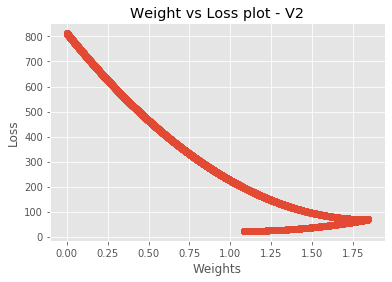

In [22]:
w_v2,b_v2 = train_v2(X,y,iteration = 200000, lr = 0.0001)

#### Note:
The number of iterations almost doubles for our regular code of fitting a straight line compared to gradient descent.